# 분류 : 크로스 엔트로피 cross entropy
### -(  y*log(h)  +  (1-y)*log(1-h)  ), h = sigmoid(WX+b)
### 예측 : 기존 MSE(Mean Square Error),  Mean(square(h-y))

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [21]:
np.set_printoptions(precision=4)
y = np.array([0, 0, 0, 1, 1, 1])
h = np.array([0.01, 0.1, 0.3, 0.99, 0.8, 0.7]) # 모델 예측

In [22]:
(h-y)**2

array([0.0001, 0.01  , 0.09  , 0.0001, 0.04  , 0.09  ])

In [23]:
-(y*np.log(h)) #왼쪽, y가 1인 샘플의 코스트

array([0.    , 0.    , 0.    , 0.0101, 0.2231, 0.3567])

In [24]:
-((1-y) * np.log(1-h)) #오른쪽, y가 0인 샘플의 코스트

array([0.0101, 0.1054, 0.3567, 0.    , 0.    , 0.    ])

In [26]:
-(y*np.log(h) + (1-y) * np.log(1-h))

array([0.0101, 0.1054, 0.3567, 0.0101, 0.2231, 0.3567])

In [27]:
# 에러 크기 비교, mes < 
np.mean((h - y)**2), np.mean(-(y * np.log(h) + (1-y)* np.log(1-h)))

(0.03836666666666667, 0.1769924377594173)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


Text(0.5, 1.0, 'log')

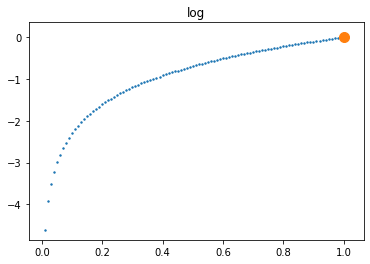

In [25]:
xx = np.arange(0, 1, 0.01)
yy = np.log(xx)
plt.scatter(xx, yy, s=2)
plt.scatter(1, np.log(1), s=100)
plt.title('log')

In [6]:
np.round(h)

array([0., 0., 0., 1., 1., 1.])

In [71]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2.]]
y_data = [[0], [0], [0], [1], [1], [1.]]
len(x_data), len(y_data)

(6, 6)

In [85]:
x = tf.constant(x_data)
y = tf.constant(y_data)
w = tf.Variable(tf.random_normal(shape=[2, 1], seed=99))
b = tf.Variable(tf.random_normal(shape=[1, 1], seed=99))

h = tf.sigmoid(tf.matmul(x, w)) + b
h = tf.maximum(0.0000001, h)
h = tf.minimum(0.9999999 - 1e-8, h)
cost = -(y * tf.log(h) + (1-y) * tf.log(1-h))
cost = tf.reduce_mean(cost)

train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)
predicted = tf.cast(h>0.5, tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(y, predicted), tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i  in range(10000):a
        _, c, acc =  sess.run([train, cost, accuracy])
        if(i%1000)==0:
            print(i, c, acc)
    print(np.round(sess.run(h)))

0 8.059048 0.5
1000 8.059048 0.5
2000 8.059048 0.5
3000 8.059048 0.5
4000 8.059048 0.5
5000 8.059048 0.5
6000 8.059048 0.5
7000 8.059048 0.5
8000 8.059048 0.5
9000 8.059048 0.5
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [92]:
import pandas as pd
url = 'https://raw.githubusercontent.com/hunkim/DeepLearningZeroToAll/master/data-03-diabetes.csv'
df = pd.read_csv(url, header=None)
data = np.array(df)
data.shape

(759, 9)

In [96]:
x_data = data[:, :-1]
y_data = data[:, -1]
x_data.shape

(759, 8)

In [101]:
x = tf.constant(x_data, dtype = tf.float32)
y = tf.constant(y_data, dtype = tf.float32)
se = 100
w = tf.Variable(tf.random_normal(shape=[8, 1], seed=se))
b = tf.Variable(tf.random_normal(shape=[1], seed=se))

h = tf.sigmoid(tf.matmul(x, w)) + b
h = tf.maximum(0.0000001, h)
h = tf.minimum(0.9999999 - 1e-8, h)
cost = -(y * tf.log(h) + (1-y) * tf.log(1-h))
cost = tf.reduce_mean(cost)

train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)
predicted = tf.cast(h>0.5, tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(y, predicted), tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i  in range(10000):
        _, c, acc =  sess.run([train, cost, accuracy])
        if(i%1000)==0:
            print(i, c, acc)
    print(np.round(sess.run(h)))

0 0.7025983 0.5503549
1000 0.6652912 0.63165075
2000 0.6554368 0.64863795
3000 0.6516116 0.6518736
4000 0.6497713 0.65349144
5000 0.648687 0.65349144
6000 0.647952 0.65349144
7000 0.64741117 0.65349144
8000 0.6469959 0.65349144
9000 0.64666885 0.65349144
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 

# 멀티 클래스 k=3 일때

- 2진 분류(k=2) 일때는, x1가 클래스 A일 확률만 구하면 끝

wx + b = 5

sigmoid(wx+b) = sigmoid(5) = 0.95


- 3진 분류에서는 x1이 A일 확률, X2가 B일 확률, X3이 C일 확률 모두 구해야 한다

wx + b = (5, 3, -4)

sigmoid(5, 3, -4) = (0.95, 0.3, 0.4) => 이 중에서 가장 큰 확률값은 어디있지?


In [155]:
score = np.array((0.95, 0.3, 0.4))
score

array([0.95, 0.3 , 0.4 ])

In [156]:
# 이 3개의 값을 확률로 바꿉니다.
np.exp(score)

array([2.5857, 1.3499, 1.4918])

In [157]:
# sigmoid는 하나의 점수를 확률로 바꾼다.
# softmax는 여러개의 점수를 확률로 바꾼다.
# 결과 값을 모두 더하면 1이 된다
np.exp(score) / np.sum(np.exp(score))

array([0.4764, 0.2487, 0.2749])

# 동물 분류하기

In [158]:
url = 'https://raw.githubusercontent.com/hunkim/DeepLearningZeroToAll/master/data-04-zoo.csv'
df = pd.read_csv(url, header=None)
df.shape

(120, 17)

In [159]:
zoo = df.iloc[19:]
zoo.shape

(101, 17)

In [160]:
x = zoo.drop(columns=16)
y = zoo[16]
set(y)

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0}

In [161]:
x = np.array(x)
y = np.array(y)
x.shape, y.shape, np.min(y), np.max(y)

((101, 16), (101,), 0.0, 6.0)

In [162]:
y = y.reshape([-1, 1])
y.shape

(101, 1)

In [169]:
xx = tf.constant(x, dtype=tf.float32) #100, 6
yy = tf.constant(y, dtype=tf.int64) # 원핫 인코딩을 위해, 정수로 변환 # 100
y_hot = tf.one_hot(yy, depth=7, axis=-1) # 원핫 인코딩 - 정수 # 100, 7
y_hot = tf.cast(y_hot, tf.float32) # 실수

In [170]:
w = tf.Variable(tf.random_normal(shape=[16,7]))
b = tf.Variable(tf.random_normal(shape=[7]))
h = tf.matmul(xx, w) + b # 100, 16 * 16 * 7 = 100 * 7 + 7
p = tf.nn.softmax(h)

In [171]:
cost = -tf.reduce_mean((y_hot * tf.log(p)) + (1-y_hot) * tf.log(1-p))
train = tf.train.GradientDescentOptimizer(0.1).minimize(cost)
predicted = tf.cast(tf.math.argmax(p, -1), tf.int64)
accuracy = tf.reduce_mean(tf.cast(tf.equal(yy, predicted), tf.float32))

In [172]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i  in range(100000):
        _, c, acc =  sess.run([train, cost, accuracy])
        if(i%10000)==0:
            print(i, c, acc)
    #print(np.round(sess.run(p)[0]))

0 1.707251 0.11802764
10000 0.36470345 0.40319577
20000 0.3618383 0.4059406
30000 0.36108628 0.4059406
40000 0.36077428 0.4059406
50000 0.36060336 0.4059406
60000 0.36049053 0.4059406
70000 0.3604081 0.4059406
80000 0.36034486 0.4059406
90000 0.36029512 0.4059406


# 숫자 분류하기

In [173]:
from sklearn.datasets import load_digits #mnist(28*28)가 아닙니다

In [174]:
digits = load_digits()

In [175]:
digits.data.shape, digits.target.shape

((1797, 64), (1797,))

In [176]:
x0 = digits.data[0]
x0.max(), x0.shape

(15.0, (64,))

In [178]:
x0.reshape(8, 8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

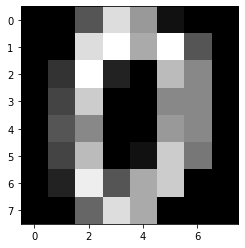

In [177]:
import matplotlib.pyplot as plt
plt.imshow(x0.reshape(8, 8), cmap='gray')

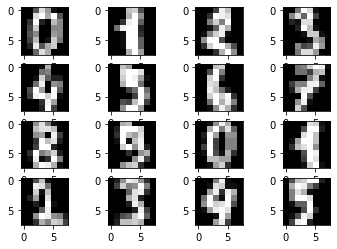

In [182]:
flg, ax = plt.subplots(nrows=4, ncols=4)
for i in range(4):
    for j in range(4):
        ax[i, j].imshow(digits.data[i*4+j].reshape(8, 8), cmap='gray')

In [ ]:
plt.boxplot

x : 64

w : 64 * 10 (w0의 역할 : x가 숫자 0인지 판별, w0의 역할 : x가 숫자 9인지 판별)

b : 10

- 행렬곱셈(x, W) = (1, 64) * (64, 10) = (1, 10) + b(10) = (1, 10) : 10개의 스코어
- 소프트맥스(스코어) = 확률(1, 10)
- 오차 : 크로스 엔트로피(1-10 확률), 정답(y의 원핫인코딩)
- 판정(어떤 클래스냐) : 가장 큰 값의 위치 = 스칼라 0-9
- 정확도 : equal(Y, 판정결과)

In [187]:
x = digits.data
y = digits.target
x.shape, y.shape, x.dtype, y.dtype # y는 원핫인코딩 때문에 int여도 된다.

((1797, 64), (1797,), dtype('float64'), dtype('int32'))

In [188]:
x = x.astype(np.float32)
x.dtype

dtype('float32')

In [205]:
# 최대값 15로 나누자
xn = x / tf.reduce_max(x)

In [222]:
#잠재 변수, 여기서는 score
z = tf.matmul(xn, w) + b

In [206]:
y_onehot = tf.one_hot(y, depth=10)
y_onehot

<tf.Tensor 'one_hot_9:0' shape=(1797, 10) dtype=float32>

In [207]:
w = tf.Variable(tf.random_normal(shape=[64, 10]))
b = tf.Variable(tf.random_normal(shape=[10]))

In [208]:
# 행렬곱셈
h = tf.nn.softmax(tf.matmul(xn, w) + b)

In [209]:
# 오차 (원핫이 0이면 h도 0이 나와야 하고, 원핫이 1이면 h도 1이 나와야 한다.)
cost = -tf.reduce_mean(y_onehot * tf.log(h) + (1-y_onehot) * tf.log(1-h))

In [210]:
# 판정 (가장 확률이 큰 위치)
predict_class = tf.math.argmax(h, axis=1, output_type=tf.int32) # 판정을 위해서는 int 타입이어야지 가능
predict_class

<tf.Tensor 'ArgMax_11:0' shape=(1797,) dtype=int32>

In [211]:
# 정확도 (mean은 실수 타입이어야지 가능)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predict_class, y), tf.float32))

In [212]:
train = tf.train.GradientDescentOptimizer(0.1).minimize(cost)

In [214]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [219]:
for i in range(100000):
    _, c, a = sess.run([train, cost, accuracy])
    if i%10000:
        print(c, a)

0.10794992 0.804118
0.10794698 0.804118
0.10794401 0.804118
0.10794106 0.804118
0.10793813 0.804118
0.107935175 0.804118
0.10793223 0.804118
0.10792928 0.804118
0.10792635 0.804118
0.1079234 0.804118
0.10792045 0.804118
0.1079175 0.804118
0.10791457 0.804118
0.10791161 0.804118
0.10790866 0.804118
0.10790572 0.804118
0.10790278 0.804118
0.107899845 0.804118
0.107896894 0.804118
0.10789395 0.804118
0.107890986 0.804118
0.10788804 0.804118
0.1078851 0.804118
0.107882164 0.804118
0.10787921 0.804118
0.10787626 0.804118
0.10787333 0.804118
0.10787039 0.804118
0.10786744 0.804118
0.107864484 0.804118
0.10786154 0.804118
0.10785861 0.804118
0.10785566 0.804118
0.10785272 0.804118
0.10784978 0.804118
0.10784685 0.804118
0.10784389 0.804118
0.10784095 0.804118
0.107838005 0.804118
0.10783507 0.804118
0.10783212 0.804118
0.10782918 0.804118
0.10782625 0.804118
0.1078233 0.804118
0.10782038 0.804118
0.107817434 0.804118
0.10781448 0.804118
0.107811555 0.804118
0.10780861 0.804118
0.10780566 0.80

0.106572725 0.8069004
0.10656986 0.8069004
0.106567 0.8069004
0.106564134 0.8069004
0.106561266 0.8069004
0.1065584 0.8069004
0.10655554 0.8069004
0.10655268 0.8069004
0.10654983 0.8069004
0.10654696 0.8069004
0.10654411 0.8069004
0.10654122 0.8069004
0.10653836 0.8069004
0.1065355 0.8069004
0.10653264 0.8069004
0.10652977 0.8069004
0.106526926 0.8069004
0.10652406 0.8069004
0.106521204 0.80745685
0.106518336 0.80745685
0.10651547 0.80745685
0.10651261 0.80745685
0.10650975 0.80745685
0.1065069 0.80745685
0.10650404 0.80745685
0.106501184 0.80745685
0.10649831 0.80745685
0.10649547 0.80745685
0.106492594 0.80745685
0.10648975 0.80745685
0.10648687 0.80745685
0.106484026 0.80745685
0.106481165 0.80745685
0.1064783 0.80745685
0.10647544 0.80745685
0.10647258 0.80745685
0.10646972 0.80745685
0.10646688 0.80745685
0.10646401 0.80745685
0.10646116 0.80745685
0.10645831 0.80745685
0.106455445 0.80745685
0.106452584 0.80745685
0.10644973 0.80745685
0.106446885 0.80745685
0.10644403 0.80745685

0.10519047 0.80745685
0.1051877 0.80745685
0.10518493 0.80745685
0.10518214 0.80745685
0.10517937 0.80745685
0.1051766 0.80745685
0.105173804 0.80745685
0.105171025 0.80745685
0.10516826 0.80745685
0.10516547 0.80745685
0.105162695 0.80745685
0.105159916 0.80745685
0.10515715 0.80745685
0.10515437 0.80745685
0.10515159 0.80745685
0.105148815 0.80745685
0.10514604 0.80745685
0.105143264 0.80745685
0.105140485 0.80745685
0.10513771 0.80745685
0.10513493 0.80745685
0.10513215 0.80745685
0.105129376 0.80745685
0.1051266 0.80745685
0.105123825 0.80745685
0.105121054 0.80745685
0.10511829 0.80745685
0.10511551 0.80745685
0.10511273 0.80745685
0.10510996 0.80745685
0.10510719 0.80745685
0.10510441 0.80745685
0.10510165 0.80745685
0.10509887 0.80745685
0.10509608 0.80745685
0.10509332 0.80745685
0.10509056 0.80745685
0.10508778 0.80745685
0.105085 0.80745685
0.10508223 0.80745685
0.10507944 0.80745685
0.105076686 0.80745685
0.1050739 0.80745685
0.10507115 0.80745685
0.10506838 0.80745685
0.105

0.103846066 0.8102393
0.10384337 0.8102393
0.10384068 0.8102393
0.10383798 0.8102393
0.103835285 0.8102393
0.10383258 0.8102393
0.10382988 0.8102393
0.10382719 0.8102393
0.10382449 0.8102393
0.103821784 0.8102393
0.103819095 0.8102393
0.103816405 0.8102393
0.1038137 0.8102393
0.103810996 0.8102393
0.103808306 0.8102393
0.10380562 0.8102393
0.10380291 0.8102393
0.103800215 0.8102393
0.10379753 0.8102393
0.10379483 0.8102393
0.10379214 0.8102393
0.10378945 0.8102393
0.103786744 0.8102393
0.10378405 0.8102393
0.103781365 0.8102393
0.10377866 0.8102393
0.10377597 0.8102393
0.10377328 0.8102393
0.10377058 0.8102393
0.10376789 0.8102393
0.1037652 0.8102393
0.1037625 0.8102393
0.10375982 0.8102393
0.10375711 0.8102393
0.10375442 0.8102393
0.103751734 0.8102393
0.103749044 0.8102393
0.10374635 0.8102393
0.103743665 0.8102393
0.103740975 0.8102393
0.10373827 0.8102393
0.10373559 0.8102393
0.10373289 0.8102393
0.1037302 0.8102393
0.10372753 0.8102393
0.10372483 0.8102393
0.10372213 0.8102393
0.1

0.10254837 0.8107958
0.102545746 0.8107958
0.10254312 0.8107958
0.102540515 0.8107958
0.102537885 0.8107958
0.10253527 0.8107958
0.10253265 0.8107958
0.10253003 0.8107958
0.10252741 0.8107958
0.102524795 0.8107958
0.102522165 0.8107958
0.10251955 0.8107958
0.102516934 0.8107958
0.10251432 0.8107958
0.10251171 0.8107958
0.10250909 0.8107958
0.102506466 0.8107958
0.10250385 0.8107958
0.102501236 0.8107958
0.10249861 0.8107958
0.102496 0.8107958
0.10249338 0.8107958
0.10249077 0.8107958
0.10248815 0.8107958
0.10248553 0.8107958
0.102482915 0.8107958
0.1024803 0.8107958
0.10247769 0.8107958
0.10247508 0.8107958
0.10247245 0.8107958
0.10246984 0.8107958
0.102467224 0.8107958
0.10246461 0.8107958
0.102462 0.8107958
0.10245937 0.8107958
0.10245677 0.8107958
0.10245415 0.8107958
0.10245154 0.8107958
0.10244892 0.8107958
0.10244631 0.8107958
0.10244369 0.8107958
0.10244108 0.8107958
0.10243845 0.8107958
0.10243585 0.8107958
0.10243323 0.8107958
0.10243064 0.8107958
0.102428004 0.8107958
0.10242

0.10127253 0.8107958
0.10126999 0.8107958
0.10126744 0.8107958
0.101264894 0.8107958
0.101262346 0.8107958
0.101259805 0.8107958
0.10125725 0.8107958
0.10125471 0.8107958
0.10125217 0.8107958
0.10124963 0.8107958
0.101247065 0.8107958
0.10124453 0.8107958
0.10124199 0.8107958
0.101239435 0.8107958
0.10123692 0.8107958
0.10123436 0.8107958
0.10123182 0.8107958
0.10122927 0.8107958
0.10122673 0.8107958
0.1012242 0.8107958
0.10122165 0.8107958
0.10121911 0.8107958
0.10121657 0.8107958
0.10121402 0.8107958
0.10121148 0.8107958
0.101208925 0.8107958
0.10120639 0.8107958
0.10120386 0.8107958
0.10120131 0.8107958
0.10119877 0.8107958
0.10119623 0.8107958
0.10119369 0.8107958
0.10119114 0.8107958
0.1011886 0.8107958
0.10118606 0.8107958
0.10118352 0.8107958
0.101180986 0.8107958
0.10117845 0.8107958
0.1011759 0.8107958
0.10117338 0.8107958
0.10117082 0.8107958
0.10116829 0.8107958
0.10116575 0.8107958
0.10116321 0.8107958
0.10116067 0.8107958
0.10115813 0.8107958
0.101155594 0.8107958
0.101153

0.1000575 0.8135782
0.10005501 0.8135782
0.10005255 0.8135782
0.100050084 0.8135782
0.100047596 0.8135782
0.10004513 0.8135782
0.10004265 0.8135782
0.10004019 0.8135782
0.10003771 0.8135782
0.100035235 0.8135782
0.10003275 0.8135782
0.10003028 0.8135782
0.10002781 0.8135782
0.10002534 0.8135782
0.10002287 0.8135782
0.1000204 0.8135782
0.10001792 0.8135782
0.10001544 0.8135782
0.10001297 0.8135782
0.10001049 0.8135782
0.100008026 0.8135782
0.10000556 0.8135782
0.100003086 0.8135782
0.10000061 0.8135782
0.09999815 0.8135782
0.09999567 0.8135782
0.0999932 0.8135782
0.09999073 0.8135782
0.09998826 0.8135782
0.099985786 0.8135782
0.099983305 0.8135782
0.099980846 0.8135782
0.09997838 0.8135782
0.099975914 0.81413466
0.09997345 0.81413466
0.099970974 0.81413466
0.0999685 0.81413466
0.099966034 0.81413466
0.09996356 0.81413466
0.09996111 0.81413466
0.09995861 0.81413466
0.099956155 0.81413466
0.09995369 0.81413466
0.09995122 0.81413466
0.09994876 0.81413466
0.09994628 0.81413466
0.09994381 0.

0.09889758 0.8158041
0.09889518 0.8158041
0.09889277 0.8158041
0.09889037 0.8158041
0.09888796 0.8158041
0.09888555 0.8158041
0.09888314 0.8158041
0.098880745 0.8158041
0.098878324 0.8158041
0.09887592 0.8158041
0.09887352 0.8158041
0.0988711 0.8158041
0.098868705 0.8158041
0.09886629 0.8158041
0.098863885 0.8158041
0.09886146 0.8158041
0.09885907 0.8158041
0.09885665 0.8158041
0.09885425 0.8158041
0.09885183 0.8158041
0.09884944 0.8158041
0.098847024 0.8158041
0.09884461 0.8158041
0.09884221 0.8158041
0.09883982 0.8158041
0.098837405 0.8158041
0.098835 0.8158041
0.09883259 0.8158041
0.09883019 0.8158041
0.09882778 0.8158041
0.09882537 0.8158041
0.098822966 0.8158041
0.098820575 0.8158041
0.09881815 0.8158041
0.09881576 0.8158041
0.098813355 0.8158041
0.09881095 0.8158041
0.09880854 0.8158041
0.09880615 0.8158041
0.098803736 0.8158041
0.09880134 0.8158041
0.09879894 0.8158041
0.098796524 0.8158041
0.09879413 0.8158041
0.09879171 0.8158041
0.09878931 0.8158041
0.09878692 0.8158041
0.098

0.09771708 0.81691706
0.09771472 0.81691706
0.09771239 0.81691706
0.097710036 0.81691706
0.0977077 0.81691706
0.097705364 0.81691706
0.097703025 0.81691706
0.09770068 0.81691706
0.09769834 0.81691706
0.097696 0.81691706
0.09769365 0.81691706
0.09769131 0.81691706
0.09768898 0.81691706
0.09768664 0.81691706
0.0976843 0.81691706
0.097681955 0.81691706
0.097679615 0.81691706
0.09767728 0.81691706
0.09767494 0.81691706
0.097672604 0.81691706
0.097670265 0.81691706
0.09766792 0.81691706
0.097665586 0.81691706
0.09766323 0.81691706
0.09766091 0.81691706
0.097658575 0.81691706
0.09765622 0.81691706
0.09765389 0.81691706
0.09765155 0.81691706
0.09764921 0.81691706
0.09764688 0.81691706
0.09764452 0.81691706
0.0976422 0.81691706
0.09763985 0.81691706
0.09763753 0.81691706
0.09763517 0.81691706
0.097632855 0.81691706
0.0976305 0.81691706
0.097628176 0.81691706
0.097625844 0.81691706
0.0976235 0.81691706
0.09762117 0.81691706
0.09761882 0.81691706
0.097616486 0.81691706
0.09761415 0.81691706
0.09

0.096578255 0.819143
0.096575975 0.819143
0.0965737 0.819143
0.09657143 0.819143
0.096569136 0.819143
0.09656687 0.819143
0.09656458 0.819143
0.09656232 0.819143
0.09656004 0.819143
0.09655775 0.819143
0.09655548 0.819143
0.09655319 0.819143
0.09655092 0.819143
0.09654864 0.8196995
0.09654635 0.8196995
0.09654408 0.8196995
0.0965418 0.8196995
0.096539535 0.8196995
0.096537255 0.8196995
0.096534975 0.8196995
0.0965327 0.8196995
0.09653042 0.8196995
0.09652815 0.8196995
0.09652587 0.8196995
0.09652359 0.8196995
0.096521325 0.8196995
0.096519046 0.8196995
0.09651678 0.8196995
0.096514486 0.8196995
0.09651222 0.8196995
0.09650994 0.8196995
0.09650767 0.8196995
0.096505396 0.8196995
0.09650312 0.8196995
0.096500844 0.8196995
0.096498586 0.8196995
0.09649631 0.8196995
0.096494034 0.8196995
0.09649176 0.8196995
0.09648947 0.8196995
0.096487194 0.8196995
0.09648492 0.8196995
0.09648265 0.8196995
0.09648037 0.8196995
0.096478105 0.8196995
0.09647583 0.8196995
0.09647355 0.8196995
0.096471295 0.

0.09545901 0.82081246
0.095456794 0.82081246
0.09545457 0.82081246
0.09545235 0.82081246
0.09545015 0.82081246
0.09544793 0.82081246
0.09544571 0.82081246
0.095443495 0.82081246
0.09544128 0.82081246
0.095439084 0.82081246
0.095436856 0.82081246
0.095434636 0.82081246
0.09543242 0.82081246
0.0954302 0.82081246
0.095428 0.82081246
0.09542577 0.82081246
0.09542354 0.82081246
0.095421344 0.82081246
0.095419124 0.82081246
0.09541691 0.82081246
0.095414706 0.82081246
0.095412485 0.82081246
0.09541027 0.82081246
0.09540807 0.82081246
0.09540585 0.82081246
0.095403634 0.82081246
0.09540142 0.82081246
0.09539919 0.82081246
0.09539699 0.82081246
0.095394775 0.82081246
0.09539256 0.82081246
0.09539035 0.82081246
0.09538814 0.82081246
0.09538593 0.82081246
0.0953837 0.82081246
0.09538151 0.82081246
0.09537929 0.82081246
0.09537709 0.82081246
0.09537486 0.82081246
0.095372654 0.82081246
0.095370434 0.82081246
0.09536823 0.82081246
0.09536602 0.82081246
0.09536381 0.82081246
0.0953616 0.82081246
0.

0.09437641 0.8230384
0.09437425 0.8230384
0.094372086 0.8230384
0.09436993 0.8230384
0.09436778 0.8230384
0.09436563 0.8230384
0.094363466 0.8230384
0.094361305 0.8230384
0.09435915 0.8230384
0.09435699 0.8230384
0.094354846 0.8230384
0.09435269 0.8230384
0.09435053 0.8230384
0.09434837 0.8230384
0.09434621 0.8230384
0.094344065 0.8230384
0.094341904 0.8230384
0.094339736 0.8230384
0.09433758 0.8230384
0.09433544 0.8230384
0.09433329 0.8230384
0.09433113 0.8230384
0.09432898 0.8230384
0.09432681 0.8230384
0.09432466 0.8230384
0.0943225 0.8230384
0.09432034 0.8230384
0.094318196 0.8230384
0.09431603 0.8230384
0.09431389 0.8230384
0.09431173 0.8230384
0.094309576 0.8230384
0.09430742 0.8230384
0.09430527 0.8230384
0.09430311 0.8230384
0.09430097 0.8230384
0.09429881 0.8230384
0.094296664 0.8230384
0.0942945 0.8230384
0.094292335 0.8230384
0.0942902 0.8230384
0.09428804 0.8230384
0.09428588 0.8230384
0.09428374 0.8230384
0.09428158 0.8230384
0.09427943 0.8230384
0.09427727 0.8230384
0.094

0.09332035 0.82470787
0.093318254 0.82470787
0.09331615 0.82470787
0.09331405 0.82470787
0.09331194 0.82470787
0.09330986 0.82470787
0.09330775 0.82470787
0.09330565 0.82470787
0.09330355 0.82470787
0.093301445 0.82470787
0.093299344 0.82470787
0.093297236 0.82470787
0.09329514 0.82470787
0.093293056 0.82470787
0.09329095 0.82470787
0.09328885 0.82470787
0.09328675 0.82470787
0.09328464 0.82470787
0.09328254 0.82470787
0.09328046 0.82470787
0.093278356 0.82470787
0.09327624 0.82470787
0.09327415 0.82470787
0.09327205 0.82470787
0.09326995 0.82470787
0.09326787 0.82470787
0.09326576 0.82470787
0.09326366 0.82470787
0.09326156 0.82470787
0.09325946 0.82470787
0.09325737 0.82470787
0.09325527 0.82470787
0.09325317 0.82470787
0.09325108 0.82470787
0.09324898 0.82470787
0.093246885 0.82470787
0.093244776 0.82470787
0.09324268 0.82470787
0.09324059 0.82470787
0.09323849 0.82470787
0.093236394 0.82470787
0.0932343 0.82526433
0.09323221 0.82526433
0.093230106 0.82526433
0.09322801 0.82526433
0

0.09228786 0.82749027
0.09228582 0.82749027
0.09228378 0.82749027
0.09228173 0.82749027
0.09227968 0.82749027
0.09227763 0.82749027
0.09227559 0.82749027
0.092273556 0.82749027
0.09227149 0.82749027
0.09226945 0.82749027
0.09226742 0.82749027
0.09226536 0.82749027
0.092263326 0.82749027
0.09226128 0.82749027
0.092259236 0.82749027
0.09225718 0.82749027
0.092255145 0.82749027
0.0922531 0.82749027
0.092251055 0.82749027
0.092249006 0.82749027
0.092246965 0.82749027
0.092244916 0.82749027
0.09224287 0.82749027
0.092240825 0.82749027
0.092238784 0.82749027
0.09223675 0.82749027
0.0922347 0.82749027
0.09223267 0.82749027
0.092230625 0.82749027
0.09222857 0.82749027
0.09222653 0.82749027
0.09222448 0.82749027
0.09222244 0.82749027
0.0922204 0.82749027
0.092218354 0.82749027
0.09221632 0.82749027
0.09221428 0.82749027
0.09221224 0.82749027
0.09221019 0.82749027
0.09220814 0.82749027
0.09220611 0.82749027
0.09220407 0.82749027
0.09220204 0.82749027
0.09219999 0.82749027
0.09219795 0.82749027
0

0.09128025 0.8302727
0.09127826 0.8302727
0.091276266 0.8302727
0.09127427 0.8302727
0.09127227 0.8302727
0.09127027 0.8302727
0.091268286 0.8302727
0.09126629 0.8302727
0.0912643 0.8302727
0.091262296 0.8302727
0.09126031 0.8302727
0.09125831 0.8302727
0.09125633 0.8302727
0.09125433 0.8302727
0.09125234 0.8302727
0.091250345 0.8302727
0.091248356 0.8302727
0.09124636 0.8302727
0.09124437 0.8302727
0.09124239 0.8302727
0.09124039 0.8302727
0.09123841 0.8302727
0.09123641 0.8302727
0.091234416 0.8302727
0.09123243 0.8302727
0.09123043 0.8302727
0.09122844 0.8302727
0.09122646 0.8302727
0.09122448 0.8302727
0.09122249 0.8302727
0.091220476 0.8302727
0.091218494 0.8302727
0.091216505 0.8302727
0.091214515 0.8302727
0.091212526 0.8302727
0.091210544 0.8302727
0.09120855 0.8302727
0.09120655 0.8302727
0.09120457 0.8302727
0.09120258 0.8302727
0.0912006 0.8302727
0.0911986 0.8302727
0.09119662 0.8302727
0.09119464 0.8302727
0.09119264 0.8302727
0.09119064 0.8302727
0.09118865 0.8302727
0.09

0.090292625 0.8341681
0.09029067 0.8341681
0.09028874 0.8341681
0.090286806 0.8341681
0.09028486 0.8341681
0.09028292 0.8341681
0.09028097 0.8341681
0.09027903 0.8341681
0.09027709 0.8341681
0.090275146 0.8341681
0.0902732 0.8341681
0.090271264 0.8341681
0.09026932 0.8341681
0.09026739 0.8341681
0.09026543 0.8341681
0.09026349 0.8341681
0.09026156 0.8341681
0.09025962 0.8341681
0.09025769 0.8341681
0.09025574 0.8341681
0.0902538 0.83472455
0.09025186 0.83472455
0.09024992 0.83472455
0.090247974 0.83472455
0.09024603 0.83472455
0.0902441 0.83472455
0.09024216 0.83472455
0.09024021 0.83472455
0.09023828 0.83472455
0.090236336 0.83472455
0.0902344 0.83472455
0.09023246 0.83472455
0.09023052 0.83472455
0.09022859 0.83472455
0.09022666 0.83472455
0.09022471 0.83472455
0.09022278 0.83472455
0.090220846 0.83472455
0.09021891 0.83472455
0.09021696 0.83472455
0.09021503 0.83472455
0.09021308 0.83472455
0.090211146 0.83472455
0.090209216 0.83472455
0.09020727 0.83472455
0.090205334 0.83472455
0.

0.08933615 0.836394
0.089334264 0.836394
0.089332364 0.836394
0.08933047 0.836394
0.08932857 0.836394
0.08932668 0.836394
0.08932479 0.836394
0.08932291 0.836394
0.08932101 0.836394
0.08931911 0.836394
0.089317225 0.836394
0.08931533 0.836394
0.08931344 0.836394
0.08931156 0.836394
0.089309655 0.836394
0.08930777 0.836394
0.089305885 0.836394
0.08930399 0.836394
0.0893021 0.836394
0.08930021 0.836394
0.08929831 0.836394
0.08929641 0.836394
0.08929453 0.836394
0.08929263 0.836394
0.08929076 0.836394
0.08928887 0.836394
0.089286976 0.836394
0.08928508 0.836394
0.08928319 0.836394
0.089281306 0.836394
0.089279406 0.836394
0.08927751 0.836394
0.08927562 0.836394
0.089273736 0.836394
0.08927184 0.836394
0.08926996 0.836394
0.08926807 0.836394
0.08926618 0.836394
0.089264296 0.836394
0.0892624 0.836394
0.08926052 0.836394
0.08925863 0.836394
0.08925674 0.836394
0.08925485 0.836394
0.08925295 0.836394
0.089251064 0.836394
0.0892492 0.836394
0.089247294 0.836394
0.0892454 0.836394
0.08924352 0

0.08840173 0.83861995
0.08839989 0.83861995
0.08839805 0.83861995
0.0883962 0.83861995
0.088394344 0.83861995
0.0883925 0.83861995
0.08839066 0.83861995
0.08838881 0.83861995
0.08838697 0.83861995
0.08838513 0.83861995
0.08838328 0.83861995
0.08838143 0.83861995
0.0883796 0.83861995
0.08837775 0.83861995
0.0883759 0.83861995
0.08837406 0.83861995
0.08837222 0.83861995
0.088370375 0.83861995
0.088368535 0.83861995
0.08836669 0.83861995
0.08836484 0.83861995
0.088363 0.83861995
0.08836115 0.83861995
0.088359304 0.83861995
0.08835747 0.83861995
0.08835562 0.83861995
0.08835378 0.83861995
0.08835195 0.83861995
0.0883501 0.83861995
0.088348255 0.83861995
0.08834641 0.83861995
0.088344574 0.83861995
0.088342726 0.83861995
0.08834089 0.83861995
0.088339046 0.83861995
0.0883372 0.83861995
0.08833535 0.83861995
0.08833352 0.83861995
0.08833166 0.83861995
0.08832983 0.83861995
0.088328 0.83861995
0.08832614 0.83861995
0.08832429 0.83861995
0.08832245 0.83861995
0.08832061 0.83861995
0.08831877 0

0.08749606 0.84140235
0.08749427 0.84140235
0.087492466 0.84140235
0.08749066 0.84140235
0.087488875 0.84140235
0.087487064 0.84140235
0.08748527 0.84140235
0.087483466 0.84140235
0.08748166 0.84140235
0.08747986 0.84140235
0.087478064 0.84140235
0.08747627 0.84140235
0.08747447 0.84140235
0.08747266 0.84140235
0.087470874 0.84140235
0.08746908 0.84140235
0.08746727 0.84140235
0.087465465 0.84140235
0.087463684 0.8419588
0.08746188 0.8419588
0.08746008 0.8419588
0.08745829 0.8419588
0.08745649 0.8419588
0.08745469 0.8419588
0.08745289 0.8419588
0.087451085 0.8419588
0.0874493 0.8419588
0.08744749 0.8419588
0.0874457 0.8419588
0.08744389 0.8419588
0.0874421 0.8419588
0.0874403 0.8419588
0.0874385 0.8419588
0.087436706 0.8419588
0.08743492 0.8419588
0.087433115 0.8419588
0.08743132 0.8419588
0.087429516 0.8425153
0.08742772 0.8425153
0.08742593 0.8425153
0.08742412 0.8425153
0.08742234 0.8425153
0.087420546 0.8425153
0.08741874 0.8425153
0.087416954 0.8425153
0.08741515 0.8425153
0.08741

0.08660724 0.84418476
0.086605474 0.84418476
0.086603716 0.84418476
0.08660197 0.84418476
0.086600214 0.84418476
0.086598456 0.84418476
0.086596705 0.84418476
0.08659494 0.84418476
0.08659318 0.84418476
0.08659144 0.84418476
0.08658969 0.84418476
0.08658791 0.84418476
0.08658616 0.84418476
0.08658441 0.84418476
0.08658266 0.84418476
0.086580895 0.84418476
0.08657915 0.84418476
0.0865774 0.84418476
0.08657565 0.84418476
0.0865739 0.84418476
0.08657213 0.84418476
0.086570375 0.84418476
0.086568624 0.84418476
0.08656687 0.84418476
0.08656513 0.84418476
0.08656336 0.84418476
0.08656163 0.84418476
0.08655988 0.8447412
0.086558126 0.8447412
0.08655636 0.8447412
0.0865546 0.8447412
0.086552836 0.8447412
0.0865511 0.8447412
0.08654935 0.8447412
0.08654759 0.8447412
0.08654583 0.8447412
0.08654409 0.8447412
0.08654234 0.8447412
0.08654058 0.8447412
0.08653883 0.8447412
0.08653707 0.8447412
0.08653532 0.8447412
0.08653357 0.8447412
0.08653182 0.8447412
0.08653007 0.8447412
0.08652831 0.8452977
0

0.085740164 0.84696716
0.085738465 0.84696716
0.08573675 0.84696716
0.08573503 0.84696716
0.08573332 0.84696716
0.0857316 0.84696716
0.08572989 0.84696716
0.085728176 0.84696716
0.085726455 0.84696716
0.08572475 0.84696716
0.08572304 0.84696716
0.08572133 0.84696716
0.08571961 0.84696716
0.0857179 0.84696716
0.085716195 0.84696716
0.08571449 0.84696716
0.08571276 0.84696716
0.08571106 0.84696716
0.08570934 0.84696716
0.08570763 0.84696716
0.08570593 0.84696716
0.085704215 0.84696716
0.0857025 0.84696716
0.08570079 0.84696716
0.08569907 0.84696716
0.08569735 0.84696716
0.08569565 0.84696716
0.08569394 0.84696716
0.08569222 0.84696716
0.08569052 0.84696716
0.0856888 0.84696716
0.08568709 0.84696716
0.08568538 0.84696716
0.08568367 0.84696716
0.08568196 0.84696716
0.08568024 0.84696716
0.08567854 0.84696716
0.08567683 0.84696716
0.08567513 0.84696716
0.0856734 0.84696716
0.08567169 0.84696716
0.08566999 0.84696716
0.08566828 0.84696716
0.08566657 0.84696716
0.08566485 0.84696716
0.0856631

0.0848923 0.84808016
0.08489062 0.8486366
0.08488894 0.8486366
0.08488727 0.8486366
0.084885605 0.8486366
0.08488394 0.8486366
0.08488226 0.8486366
0.0848806 0.8486366
0.08487893 0.8486366
0.084877245 0.8486366
0.084875576 0.8486366
0.08487391 0.8486366
0.084872246 0.8486366
0.08487057 0.8486366
0.08486889 0.8486366
0.084867224 0.8486366
0.08486555 0.8486366
0.08486388 0.8486366
0.08486221 0.8486366
0.08486053 0.8486366
0.084858865 0.8486366
0.08485721 0.8486366
0.08485553 0.8486366
0.084853865 0.8486366
0.0848522 0.8486366
0.08485052 0.8486366
0.084848836 0.8486366
0.08484718 0.8486366
0.08484551 0.8486366
0.08484384 0.8486366
0.08484217 0.8486366
0.084840514 0.8486366
0.08483883 0.8486366
0.08483715 0.8486366
0.084835485 0.8486366
0.08483382 0.8486366
0.08483214 0.8486366
0.08483047 0.8486366
0.08482882 0.8486366
0.08482714 0.8486366
0.08482547 0.8486366
0.0848238 0.8486366
0.08482213 0.8486366
0.08482046 0.8486366
0.0848188 0.8486366
0.08481713 0.8486366
0.08481546 0.8486366
0.08481

0.08405961 0.8503061
0.08405799 0.8503061
0.084056355 0.8503061
0.08405472 0.8503061
0.08405309 0.8503061
0.08405145 0.8503061
0.08404983 0.8503061
0.0840482 0.8503061
0.08404656 0.8503061
0.084044926 0.8503061
0.084043294 0.8503061
0.084041655 0.8503061
0.08404004 0.8503061
0.08403841 0.8503061
0.084036775 0.8503061
0.084035136 0.8503061
0.08403351 0.8503061
0.08403187 0.8503061
0.08403024 0.8503061
0.08402861 0.8503061
0.08402698 0.8503061
0.08402535 0.8503061
0.08402372 0.8503061
0.0840221 0.8503061
0.08402046 0.8503061
0.084018834 0.8503061
0.0840172 0.8503061
0.08401557 0.8503061
0.08401394 0.8503061
0.0840123 0.8503061
0.084010676 0.8503061
0.08400906 0.8503061
0.08400743 0.8503061
0.0840058 0.8503061
0.08400416 0.8503061
0.08400254 0.8503061
0.08400089 0.8503061
0.083999276 0.8503061
0.083997644 0.8503061
0.08399602 0.8503061
0.08399439 0.8503061
0.08399275 0.85086256
0.08399112 0.85086256
0.08398949 0.85086256
0.083987854 0.85086256
0.08398623 0.85086256
0.083984606 0.85086256


0.08325946 0.8519755
0.08325787 0.8519755
0.083256274 0.8519755
0.08325469 0.8519755
0.083253086 0.8519755
0.0832515 0.8519755
0.08324991 0.8519755
0.083248295 0.8519755
0.08324671 0.8519755
0.08324512 0.8519755
0.08324353 0.8519755
0.08324193 0.8519755
0.08324033 0.8519755
0.08323875 0.8519755
0.08323714 0.8519755
0.083235554 0.8519755
0.08323397 0.8519755
0.083232366 0.8519755
0.0832308 0.8519755
0.083229184 0.8519755
0.08322759 0.8519755
0.083226 0.8519755
0.083224416 0.8519755
0.08322282 0.85253197
0.083221234 0.85253197
0.08321964 0.85253197
0.08321805 0.85253197
0.08321645 0.85253197
0.08321486 0.85253197
0.08321326 0.85253197
0.083211675 0.85253197
0.08321008 0.85253197
0.083208494 0.85253197
0.08320689 0.85253197
0.083205305 0.85253197
0.08320371 0.85253197
0.083202116 0.85253197
0.08320052 0.85253197
0.08319894 0.85253197
0.08319735 0.85253197
0.08319575 0.85253197
0.08319416 0.85253197
0.08319257 0.85253197
0.08319098 0.85253197
0.08318939 0.85253197
0.0831878 0.85253197
0.08

0.082468465 0.85420144
0.0824669 0.85420144
0.082465336 0.85420144
0.08246377 0.85420144
0.08246222 0.85420144
0.082460664 0.85420144
0.082459114 0.85420144
0.08245755 0.85420144
0.08245599 0.85420144
0.08245443 0.85420144
0.08245288 0.85420144
0.08245133 0.85420144
0.082449764 0.85420144
0.082448214 0.85420144
0.08244666 0.85420144
0.08244511 0.85420144
0.08244356 0.85420144
0.08244199 0.85420144
0.082440436 0.85420144
0.08243888 0.85420144
0.082437314 0.85420144
0.08243577 0.85420144
0.0824342 0.85420144
0.082432665 0.85420144
0.08243109 0.85420144
0.082429536 0.85420144
0.082427986 0.85420144
0.08242643 0.85420144
0.08242487 0.85420144
0.08242332 0.85420144
0.08242176 0.85420144
0.08242021 0.85420144
0.08241866 0.85420144
0.08241711 0.85420144
0.08241555 0.85420144
0.082413994 0.85420144
0.082412444 0.85420144
0.08241089 0.85420144
0.08240934 0.85420144
0.08240778 0.85420144
0.08240622 0.85420144
0.082404666 0.85420144
0.082403116 0.85420144
0.08240156 0.85420144
0.0824 0.8547579
0.

0.08169743 0.85698384
0.08169591 0.85698384
0.08169439 0.85698384
0.08169286 0.85698384
0.08169135 0.85698384
0.08168982 0.85698384
0.0816883 0.85698384
0.08168678 0.85698384
0.08168525 0.85698384
0.08168373 0.85698384
0.08168222 0.85698384
0.0816807 0.85698384
0.08167918 0.85698384
0.08167766 0.85698384
0.08167614 0.85698384
0.081674606 0.85698384
0.08167309 0.85698384
0.08167157 0.85698384
0.08167006 0.85698384
0.08166853 0.85698384
0.08166702 0.85698384
0.08166549 0.85698384
0.08166397 0.85698384
0.08166245 0.85698384
0.08166094 0.85698384
0.08165943 0.85698384
0.08165791 0.85698384
0.08165638 0.85698384
0.08165485 0.85698384
0.08165334 0.85698384
0.08165183 0.85698384
0.08165031 0.85698384
0.08164879 0.85698384
0.08164726 0.85698384
0.081645735 0.85698384
0.08164422 0.85698384
0.08164271 0.85698384
0.08164119 0.85698384
0.08163968 0.85698384
0.081638165 0.85698384
0.08163664 0.85698384
0.081635125 0.85698384
0.0816336 0.85698384
0.08163208 0.85698384
0.08163056 0.85698384
0.0816290

0.08094105 0.8597663
0.08093955 0.8597663
0.08093806 0.8597663
0.08093658 0.8597663
0.0809351 0.8597663
0.08093361 0.8597663
0.08093212 0.8597663
0.08093063 0.8597663
0.08092915 0.8597663
0.080927655 0.8597663
0.08092617 0.8597663
0.0809247 0.8597663
0.0809232 0.8597663
0.080921724 0.8597663
0.080920234 0.8597663
0.08091876 0.8597663
0.08091727 0.8597663
0.080915794 0.8597663
0.0809143 0.8603228
0.08091281 0.8603228
0.08091134 0.8603228
0.08090984 0.8603228
0.08090835 0.8603228
0.080906875 0.8603228
0.080905385 0.8603228
0.0809039 0.8603228
0.08090241 0.8603228
0.08090094 0.8603228
0.080899455 0.8603228
0.080897965 0.8603228
0.08089649 0.8603228
0.080895 0.8603228
0.080893524 0.8603228
0.08089204 0.8603228
0.08089055 0.8603228
0.080889076 0.8603228
0.08088758 0.8603228
0.08088609 0.8603228
0.08088462 0.8603228
0.08088312 0.8603228
0.08088163 0.8603228
0.08088016 0.8603228
0.08087867 0.8603228
0.080877185 0.8603228
0.0808757 0.8603228
0.08087423 0.8603228
0.080872744 0.8603228
0.0808712

0.08020749 0.8619922
0.08020603 0.8619922
0.080204576 0.8619922
0.08020313 0.8619922
0.08020168 0.8619922
0.08020023 0.8619922
0.08019877 0.8619922
0.08019733 0.8619922
0.08019586 0.8619922
0.0801944 0.8619922
0.08019295 0.8619922
0.08019151 0.8619922
0.080190055 0.8619922
0.080188595 0.8619922
0.08018715 0.8619922
0.08018569 0.8619922
0.08018424 0.8619922
0.08018279 0.8619922
0.08018134 0.8619922
0.080179885 0.8619922
0.08017843 0.8619922
0.08017698 0.8619922
0.080175534 0.8619922
0.08017408 0.8619922
0.08017263 0.8619922
0.080171175 0.8619922
0.08016972 0.8619922
0.08016827 0.8619922
0.08016683 0.8619922
0.08016537 0.8619922
0.08016393 0.8619922
0.08016249 0.8619922
0.08016103 0.8619922
0.08015959 0.8619922
0.08015813 0.8619922
0.08015667 0.8619922
0.080155216 0.8619922
0.08015377 0.8619922
0.08015232 0.8619922
0.08015088 0.8619922
0.08014942 0.8619922
0.080147974 0.8619922
0.080146514 0.8619922
0.08014507 0.8619922
0.08014362 0.8619922
0.08014217 0.8619922
0.08014073 0.8619922
0.080

0.07948768 0.8619922
0.079486266 0.8619922
0.079484835 0.8619922
0.07948342 0.8619922
0.079482 0.8619922
0.07948059 0.8619922
0.07947915 0.8619922
0.07947774 0.8619922
0.07947632 0.8619922
0.079474896 0.8619922
0.079473466 0.8619922
0.07947204 0.8619922
0.07947063 0.8619922
0.079469204 0.8619922
0.07946778 0.8619922
0.07946635 0.8619922
0.079464935 0.8619922
0.07946352 0.8619922
0.07946211 0.8619922
0.07946068 0.8619922
0.079459265 0.8619922
0.07945784 0.8619922
0.079456426 0.8619922
0.079455 0.8619922
0.07945358 0.8619922
0.079452164 0.8619922
0.079450734 0.8619922
0.079449326 0.8619922
0.0794479 0.8619922
0.079446495 0.8619922
0.07944507 0.8619922
0.07944364 0.8619922
0.079442225 0.8619922
0.0794408 0.8619922
0.07943939 0.8619922
0.07943796 0.8619922
0.07943654 0.8619922
0.079435125 0.8619922
0.07943372 0.8619922
0.07943229 0.8619922
0.07943087 0.8619922
0.079429455 0.8619922
0.07942803 0.8619922
0.07942662 0.8619922
0.0794252 0.8619922
0.07942378 0.8619922
0.079422355 0.8619922
0.07

0.07878922 0.8625487
0.078787826 0.8625487
0.07878644 0.8625487
0.07878505 0.8625487
0.078783646 0.8625487
0.07878226 0.8625487
0.078780875 0.8625487
0.07877949 0.8625487
0.07877811 0.8625487
0.07877671 0.8625487
0.078775324 0.8625487
0.07877394 0.8625487
0.07877255 0.8625487
0.07877116 0.8625487
0.07876976 0.8625487
0.07876838 0.8625487
0.07876698 0.8625487
0.07876561 0.8625487
0.07876421 0.8625487
0.07876282 0.8625487
0.078761436 0.8625487
0.07876004 0.8625487
0.078758664 0.8625487
0.07875727 0.8625487
0.078755885 0.8625487
0.07875449 0.8625487
0.07875311 0.8625487
0.07875172 0.8625487
0.078750335 0.8625487
0.078748934 0.8625487
0.07874755 0.8625487
0.07874616 0.8625487
0.07874477 0.8625487
0.07874338 0.8625487
0.07874199 0.8625487
0.078740604 0.8625487
0.078739226 0.8625487
0.078737825 0.8625487
0.07873643 0.8625487
0.07873505 0.8625487
0.07873367 0.8625487
0.07873227 0.8625487
0.078730896 0.8625487
0.078729495 0.8625487
0.07872812 0.8625487
0.078726724 0.8625487
0.07872534 0.862548

0.078100406 0.86366165
0.07809904 0.86366165
0.078097686 0.86366165
0.07809633 0.86366165
0.07809497 0.86366165
0.0780936 0.86366165
0.07809225 0.86366165
0.078090884 0.86366165
0.07808951 0.86366165
0.07808816 0.86366165
0.07808679 0.86366165
0.07808544 0.86366165
0.07808408 0.86366165
0.078082725 0.86366165
0.07808136 0.86366165
0.07808 0.86366165
0.07807864 0.86366165
0.07807728 0.86366165
0.07807593 0.86366165
0.07807456 0.86366165
0.0780732 0.86366165
0.078071855 0.86366165
0.07807048 0.86366165
0.078069136 0.86366165
0.07806777 0.86366165
0.078066416 0.86366165
0.07806506 0.86366165
0.0780637 0.86366165
0.07806234 0.86366165
0.078060985 0.86366165
0.07805961 0.86366165
0.078058265 0.86366165
0.07805691 0.86366165
0.07805554 0.86366165
0.07805419 0.86366165
0.07805283 0.86366165
0.07805147 0.86366165
0.078050114 0.86366165
0.07804875 0.86366165
0.078047395 0.86366165
0.07804603 0.86366165
0.07804468 0.86366165
0.078043334 0.86366165
0.07804196 0.86366165
0.07804061 0.86366165
0.07

0.077422604 0.86477464
0.077421285 0.86477464
0.07741995 0.86477464
0.077418625 0.86477464
0.07741729 0.86477464
0.077415965 0.86477464
0.07741463 0.86477464
0.0774133 0.86477464
0.07741198 0.86477464
0.077410646 0.86477464
0.07740932 0.86477464
0.077407986 0.86477464
0.07740667 0.86477464
0.07740533 0.86477464
0.07740401 0.86477464
0.07740268 0.86477464
0.07740134 0.86477464
0.07740002 0.86477464
0.077398695 0.86477464
0.077397354 0.86477464
0.07739603 0.86477464
0.0773947 0.86477464
0.07739337 0.86477464
0.07739204 0.86477464
0.0773907 0.86477464
0.077389374 0.86477464
0.077388056 0.86477464
0.07738674 0.86477464
0.0773854 0.86477464
0.07738407 0.86477464
0.07738274 0.86477464
0.0773814 0.86477464
0.077380076 0.86477464
0.07737876 0.86477464
0.07737743 0.86477464
0.07737608 0.86477464
0.07737477 0.86477464
0.07737345 0.86477464
0.07737212 0.86477464
0.077370785 0.86477464
0.07736945 0.86477464
0.07736814 0.86477464
0.0773668 0.86477464
0.07736547 0.86477464
0.07736414 0.86477464
0.07

0.07676331 0.8658876
0.076762006 0.8658876
0.07676071 0.8658876
0.076759405 0.8658876
0.07675811 0.8658876
0.076756805 0.8658876
0.0767555 0.8658876
0.0767542 0.8658876
0.07675291 0.8658876
0.076751605 0.8658876
0.07675029 0.8658876
0.076749004 0.8658876
0.07674771 0.8658876
0.0767464 0.8658876
0.07674509 0.8658876
0.076743804 0.8658876
0.0767425 0.8658876
0.076741196 0.8658876
0.07673989 0.8658876
0.07673859 0.8658876
0.0767373 0.8658876
0.076735996 0.8658876
0.07673469 0.8658876
0.076733395 0.8658876
0.07673209 0.8658876
0.076730795 0.8658876
0.0767295 0.8658876
0.076728195 0.8658876
0.076726906 0.8658876
0.076725595 0.8658876
0.076724306 0.8658876
0.076723 0.8658876
0.0767217 0.8658876
0.076720394 0.8658876
0.0767191 0.8658876
0.0767178 0.8658876
0.0767165 0.8658876
0.0767152 0.8658876
0.076713905 0.8658876
0.07671261 0.8658876
0.076711304 0.8658876
0.07671001 0.8658876
0.07670871 0.8658876
0.07670741 0.8658876
0.07670612 0.8658876
0.076704815 0.8658876
0.076703526 0.8658876
0.07670

0.07611681 0.86755705
0.07611553 0.86755705
0.07611427 0.86755705
0.076112986 0.86755705
0.076111704 0.86755705
0.07611043 0.86755705
0.07610916 0.86755705
0.07610788 0.86755705
0.07610661 0.86755705
0.076105334 0.86755705
0.07610407 0.86755705
0.076102786 0.86755705
0.07610151 0.86755705
0.07610024 0.86755705
0.07609897 0.86755705
0.07609769 0.86755705
0.076096416 0.86755705
0.07609514 0.86755705
0.07609387 0.86755705
0.0760926 0.86755705
0.07609133 0.86755705
0.076090045 0.86755705
0.07608877 0.86755705
0.07608749 0.86755705
0.076086216 0.86755705
0.07608495 0.86755705
0.07608367 0.86755705
0.0760824 0.86755705
0.076081134 0.86755705
0.07607986 0.86755705
0.076078594 0.86755705
0.07607732 0.86755705
0.076076046 0.86755705
0.07607477 0.86755705
0.0760735 0.86755705
0.07607222 0.86755705
0.07607096 0.86755705
0.07606968 0.86755705
0.07606841 0.86755705
0.07606715 0.86755705
0.076065876 0.86755705
0.07606461 0.86755705
0.07606333 0.86755705
0.076062046 0.86755705
0.07606078 0.86755705
0

0.075490125 0.8692265
0.07548887 0.8692265
0.07548763 0.8692265
0.07548638 0.8692265
0.07548513 0.8692265
0.07548387 0.8692265
0.07548263 0.8692265
0.07548138 0.8692265
0.07548013 0.8692265
0.0754789 0.8692265
0.075477645 0.8692265
0.07547641 0.8692265
0.07547516 0.8692265
0.0754739 0.8692265
0.07547265 0.8692265
0.07547141 0.8692265
0.07547016 0.8692265
0.075468905 0.8692265
0.07546766 0.8692265
0.075466424 0.8692265
0.07546516 0.8692265
0.07546392 0.8692265
0.07546267 0.8692265
0.075461425 0.8692265
0.07546019 0.8692265
0.07545894 0.8692265
0.07545769 0.8692265
0.07545644 0.8692265
0.075455196 0.8692265
0.07545396 0.8692265
0.0754527 0.8692265
0.07545146 0.8692265
0.07545021 0.8692265
0.07544896 0.8692265
0.075447716 0.8692265
0.07544648 0.8692265
0.07544523 0.8692265
0.075443976 0.8692265
0.075442724 0.8692265
0.075441495 0.869783
0.07544024 0.869783
0.075439006 0.869783
0.07543775 0.869783
0.0754365 0.869783
0.075435266 0.869783
0.07543401 0.869783
0.075432785 0.869783
0.07543152 0

0.0748727 0.87033945
0.07487148 0.87033945
0.07487025 0.87033945
0.07486903 0.87033945
0.07486781 0.87033945
0.074866585 0.87033945
0.07486537 0.87033945
0.07486414 0.87033945
0.07486293 0.87033945
0.074861705 0.87033945
0.074860476 0.87033945
0.07485926 0.87033945
0.074858055 0.87033945
0.07485682 0.87033945
0.07485561 0.87033945
0.074854374 0.87033945
0.07485315 0.87033945
0.07485192 0.87033945
0.0748507 0.87033945
0.07484948 0.87033945
0.074848264 0.87033945
0.07484705 0.87033945
0.07484583 0.87033945
0.0748446 0.87033945
0.07484338 0.87033945
0.07484217 0.87033945
0.07484094 0.87033945
0.07483972 0.87033945
0.0748385 0.87033945
0.07483728 0.87033945
0.07483606 0.87033945
0.07483484 0.87033945
0.07483361 0.87033945
0.0748324 0.87033945
0.07483118 0.87033945
0.07482996 0.87033945
0.07482873 0.87033945
0.074827515 0.87033945
0.07482629 0.87033945
0.07482506 0.87033945
0.07482384 0.87033945
0.07482263 0.87033945
0.074821405 0.87033945
0.07482019 0.87033945
0.07481897 0.87033945
0.07481

0.07426675 0.8725654
0.07426557 0.8725654
0.07426436 0.8725654
0.07426316 0.8725654
0.07426197 0.8725654
0.07426078 0.8725654
0.07425959 0.8725654
0.07425838 0.8725654
0.07425719 0.8725654
0.07425599 0.8725654
0.074254796 0.8725654
0.0742536 0.8725654
0.074252404 0.8725654
0.074251205 0.8725654
0.07425001 0.8725654
0.07424881 0.8725654
0.07424763 0.8725654
0.07424642 0.8725654
0.07424523 0.8725654
0.07424404 0.8725654
0.074242845 0.8725654
0.074241646 0.8725654
0.074240446 0.8725654
0.074239254 0.8725654
0.07423806 0.8725654
0.07423686 0.8725654
0.07423567 0.8725654
0.07423448 0.8725654
0.07423327 0.8725654
0.07423208 0.8725654
0.07423089 0.8725654
0.074229695 0.87312186
0.074228495 0.87312186
0.074227296 0.87312186
0.0742261 0.87312186
0.07422492 0.87312186
0.07422372 0.87312186
0.07422252 0.87312186
0.07422133 0.87312186
0.07422012 0.87312186
0.074218936 0.87312186
0.074217744 0.87312186
0.07421654 0.87312186
0.07421535 0.87312186
0.07421415 0.87312186
0.07421295 0.87312186
0.0742117

0.07367315 0.8747913
0.07367198 0.8747913
0.073670805 0.8747913
0.07366964 0.8747913
0.073668465 0.8747913
0.073667295 0.8747913
0.073666126 0.8747913
0.07366494 0.8747913
0.07366378 0.8747913
0.07366261 0.8747913
0.07366143 0.8747913
0.07366026 0.8747913
0.073659085 0.8747913
0.07365792 0.8747913
0.07365674 0.8747913
0.073655576 0.8747913
0.0736544 0.8747913
0.07365322 0.8747913
0.07365205 0.8747913
0.07365088 0.8747913
0.07364971 0.8747913
0.073648535 0.8747913
0.07364737 0.8747913
0.073646195 0.8747913
0.073645025 0.8747913
0.07364384 0.8747913
0.07364268 0.8747913
0.07364151 0.8747913
0.073640324 0.8747913
0.073639154 0.8747913
0.07363799 0.8747913
0.07363682 0.8747913
0.07363565 0.8747913
0.07363447 0.8747913
0.0736333 0.8747913
0.07363214 0.8747913
0.073630966 0.8747913
0.0736298 0.8747913
0.07362863 0.8747913
0.07362745 0.8747913
0.07362629 0.8747913
0.07362511 0.8747913
0.07362395 0.8747913
0.07362277 0.8747913
0.0736216 0.8747913
0.07362043 0.8747913
0.07361926 0.8747913
0.073

0.07309171 0.8764608
0.07309056 0.8764608
0.073089406 0.8764608
0.073088266 0.8764608
0.07308712 0.8764608
0.073085964 0.8764608
0.07308481 0.8764608
0.07308367 0.8764608
0.07308252 0.8764608
0.07308137 0.8764608
0.07308021 0.8764608
0.07307907 0.8764608
0.07307793 0.8764608
0.07307676 0.8764608
0.07307562 0.8764608
0.073074475 0.8764608
0.07307333 0.8764608
0.07307218 0.8764608
0.07307103 0.8764608
0.07306988 0.8764608
0.07306874 0.8764608
0.07306759 0.8764608
0.073066436 0.8764608
0.07306529 0.8764608
0.07306414 0.8764608
0.07306299 0.8764608
0.073061846 0.8764608
0.0730607 0.8764608
0.07305955 0.8764608
0.0730584 0.8764608
0.07305726 0.8764608
0.07305611 0.8764608
0.07305496 0.8764608
0.07305381 0.8764608
0.07305266 0.8764608
0.07305152 0.8764608
0.07305037 0.8764608
0.073049225 0.8764608
0.07304808 0.8764608
0.07304692 0.8764608
0.073045775 0.8764608
0.073044635 0.8764608
0.073043495 0.8764608
0.07304234 0.8764608
0.07304119 0.8764608
0.07304004 0.8764608
0.07303889 0.8764608
0.073

0.072528474 0.8764608
0.07252735 0.8764608
0.07252622 0.8764608
0.07252511 0.8764608
0.072523974 0.8764608
0.07252285 0.8764608
0.07252172 0.8764608
0.07252058 0.8764608
0.07251946 0.8764608
0.07251834 0.8764608
0.07251721 0.8764608
0.07251608 0.8764608
0.07251496 0.8764608
0.07251383 0.8764608
0.072512716 0.8764608
0.072511576 0.8764608
0.07251045 0.8764608
0.07250933 0.8764608
0.0725082 0.8764608
0.072507076 0.8764608
0.07250595 0.8764608
0.07250482 0.8764608
0.072503686 0.8764608
0.07250257 0.8764608
0.07250145 0.8764608
0.072500326 0.8764608
0.07249919 0.8764608
0.07249808 0.8764608
0.07249694 0.8764608
0.072495826 0.8764608
0.0724947 0.8764608
0.072493576 0.8764608
0.07249244 0.8764608
0.07249132 0.8764608
0.07249019 0.8764608
0.07248907 0.8764608
0.07248794 0.8764608
0.0724868 0.8764608
0.07248569 0.8764608
0.07248457 0.8764608
0.07248345 0.8764608
0.07248232 0.8764608
0.072481185 0.8764608
0.072480075 0.8764608
0.07247895 0.8764608
0.072477825 0.8764608
0.0724767 0.8764608
0.072

0.07196967 0.8786867
0.07196857 0.8786867
0.07196748 0.8786867
0.071966365 0.8786867
0.07196526 0.8786867
0.07196417 0.8786867
0.071963064 0.8786867
0.07196195 0.8786867
0.07196086 0.8786867
0.07195974 0.8786867
0.07195864 0.8786867
0.071957536 0.8786867
0.07195643 0.8786867
0.07195533 0.8786867
0.071954235 0.8786867
0.07195312 0.8786867
0.07195202 0.8786867
0.07195092 0.8786867
0.07194982 0.8786867
0.071948715 0.8786867
0.071947604 0.8786867
0.07194651 0.8786867
0.0719454 0.8786867
0.071944304 0.8786867
0.0719432 0.8786867
0.0719421 0.8786867
0.07194099 0.8786867
0.0719399 0.8786867
0.07193878 0.8786867
0.07193769 0.8786867
0.07193659 0.8786867
0.07193548 0.8786867
0.07193438 0.8786867
0.071933284 0.8786867
0.07193217 0.8786867
0.07193107 0.8786867
0.07192996 0.8786867
0.071928866 0.8786867
0.07192777 0.8786867
0.07192667 0.8786867
0.07192555 0.8786867
0.07192445 0.8786867
0.07192335 0.8786867
0.07192225 0.8786867
0.071921155 0.8786867
0.07192005 0.8786867
0.07191895 0.8786867
0.07191

0.071420796 0.88091266
0.071419716 0.88091266
0.071418636 0.88091266
0.07141755 0.88091266
0.071416475 0.88091266
0.07141538 0.88091266
0.07141431 0.88091266
0.07141321 0.88091266
0.07141214 0.88091266
0.07141105 0.88091266
0.07140997 0.88091266
0.07140889 0.88091266
0.07140781 0.88091266
0.071406715 0.88091266
0.071405634 0.88091266
0.071404554 0.88091266
0.07140348 0.88091266
0.07140239 0.88091266
0.07140131 0.88091266
0.071400225 0.88091266
0.071399145 0.88091266
0.071398064 0.88091266
0.071396984 0.88091266
0.07139591 0.88091266
0.07139483 0.88091266
0.07139374 0.88091266
0.071392655 0.88091266
0.07139158 0.88091266
0.071390495 0.88091266
0.071389414 0.88091266
0.071388334 0.88091266
0.07138725 0.88091266
0.07138618 0.88091266
0.07138509 0.88091266
0.07138402 0.88091266
0.07138293 0.88091266
0.07138185 0.88091266
0.07138077 0.88091266
0.07137969 0.88091266
0.07137861 0.88091266
0.07137754 0.88091266
0.07137645 0.88091266
0.07137538 0.88091266
0.07137429 0.88091266
0.07137322 0.8809

0.07089231 0.88146913
0.070891246 0.88146913
0.07089019 0.88146913
0.070889115 0.88146913
0.07088805 0.88146913
0.07088699 0.88146913
0.07088594 0.88146913
0.07088487 0.88146913
0.07088382 0.88146913
0.070882745 0.88146913
0.070881695 0.88146913
0.07088063 0.88146913
0.07087956 0.88146913
0.07087849 0.88146913
0.07087743 0.88146913
0.070876375 0.88146913
0.07087532 0.88146913
0.07087425 0.88146913
0.07087319 0.88146913
0.07087213 0.88146913
0.07087107 0.88146913
0.07087001 0.88146913
0.07086895 0.88146913
0.07086788 0.88146913
0.07086683 0.88146913
0.070865765 0.88146913
0.0708647 0.88146913
0.07086363 0.88146913
0.07086258 0.88146913
0.07086152 0.88146913
0.07086046 0.88146913
0.070859395 0.88146913
0.070858344 0.88146913
0.07085728 0.88146913
0.07085622 0.88146913
0.070855156 0.88146913
0.07085409 0.88146913
0.07085303 0.88146913
0.07085197 0.88146913
0.070850916 0.88146913
0.07084985 0.88146913
0.07084879 0.88146913
0.07084773 0.88146913
0.07084666 0.88146913
0.07084561 0.88146913
0

0.07038622 0.88369507
0.07038518 0.88369507
0.07038414 0.88369507
0.0703831 0.88369507
0.07038206 0.88369507
0.070381016 0.88369507
0.070379965 0.88369507
0.07037893 0.88369507
0.07037789 0.88369507
0.07037685 0.88369507
0.07037581 0.88369507
0.07037478 0.88369507
0.07037373 0.88369507
0.070372686 0.88369507
0.07037165 0.88369507
0.0703706 0.88369507
0.070369564 0.88369507
0.070368506 0.88369507
0.07036747 0.88369507
0.07036642 0.88369507
0.07036539 0.88369507
0.07036434 0.88369507
0.070363306 0.88369507
0.07036226 0.88369507
0.07036122 0.88369507
0.07036018 0.88369507
0.07035914 0.88369507
0.0703581 0.88369507
0.070357054 0.88369507
0.07035602 0.88369507
0.07035497 0.88369507
0.07035394 0.88369507
0.0703529 0.88369507
0.07035186 0.88369507
0.07035081 0.88369507
0.07034978 0.88369507
0.07034873 0.88369507
0.070347704 0.88369507
0.070346646 0.88369507
0.07034562 0.88369507
0.070344575 0.88369507
0.07034353 0.88369507
0.07034248 0.88369507
0.070341446 0.88369507
0.0703404 0.88369507
0.07

0.069885306 0.88425153
0.06988429 0.88425153
0.06988326 0.88425153
0.06988223 0.88425153
0.069881216 0.88425153
0.069880195 0.88425153
0.06987916 0.88425153
0.06987814 0.88425153
0.06987712 0.88425153
0.06987609 0.88425153
0.06987507 0.88425153
0.069874056 0.88425153
0.06987303 0.88425153
0.06987201 0.88425153
0.06987098 0.88425153
0.069869965 0.88425153
0.06986893 0.88425153
0.06986791 0.88425153
0.06986688 0.88425153
0.06986586 0.88425153
0.06986484 0.88425153
0.06986382 0.88425153
0.0698628 0.88425153
0.06986177 0.88425153
0.06986075 0.88425153
0.06985973 0.88425153
0.0698587 0.88425153
0.06985769 0.88425153
0.069856666 0.88425153
0.069855645 0.88425153
0.069854625 0.88425153
0.0698536 0.88425153
0.069852576 0.88425153
0.069851555 0.88425153
0.06985053 0.88425153
0.069849506 0.88425153
0.069848485 0.88425153
0.06984747 0.88425153
0.069846444 0.88425153
0.06984542 0.88425153
0.069844395 0.88425153
0.069843374 0.88425153
0.06984235 0.88425153
0.06984134 0.88425153
0.069840305 0.884251

0.069398515 0.88425153
0.06939752 0.88425153
0.0693965 0.88425153
0.0693955 0.88425153
0.06939449 0.88425153
0.0693935 0.88425153
0.069392495 0.88425153
0.069391474 0.88425153
0.06939048 0.88425153
0.06938947 0.88425153
0.06938847 0.88425153
0.069387466 0.88425153
0.06938646 0.88425153
0.06938546 0.88425153
0.06938446 0.88425153
0.06938346 0.88425153
0.069382444 0.88425153
0.06938144 0.88425153
0.06938043 0.88425153
0.069379434 0.88425153
0.069378436 0.88425153
0.06937742 0.88425153
0.069376424 0.88425153
0.06937542 0.88425153
0.06937441 0.88425153
0.06937341 0.88425153
0.0693724 0.88425153
0.069371395 0.88425153
0.06937039 0.88425153
0.06936939 0.88425153
0.069368385 0.88425153
0.06936739 0.88425153
0.06936638 0.88425153
0.069365375 0.88425153
0.06936438 0.88425153
0.06936337 0.88425153
0.069362365 0.88425153
0.06936136 0.88425153
0.06936037 0.88425153
0.06935936 0.88425153
0.06935836 0.88425153
0.06935735 0.88425153
0.06935636 0.88425153
0.06935535 0.88425153
0.06935435 0.88425153
0.

0.0689363 0.884808
0.06893533 0.884808
0.06893433 0.884808
0.06893335 0.884808
0.06893236 0.884808
0.06893137 0.884808
0.068930395 0.884808
0.068929404 0.884808
0.06892841 0.884808
0.06892743 0.884808
0.06892644 0.884808
0.06892545 0.884808
0.06892446 0.884808
0.06892348 0.884808
0.0689225 0.884808
0.06892151 0.884808
0.06892052 0.884808
0.06891954 0.884808
0.06891855 0.884808
0.06891756 0.884808
0.06891658 0.884808
0.06891558 0.884808
0.06891459 0.884808
0.06891361 0.884808
0.068912625 0.884808
0.068911634 0.884808
0.06891065 0.884808
0.06890966 0.884808
0.068908684 0.884808
0.06890769 0.884808
0.06890672 0.884808
0.068905726 0.884808
0.06890474 0.884808
0.06890374 0.884808
0.06890277 0.884808
0.068901785 0.884808
0.068900794 0.884808
0.0688998 0.884808
0.06889881 0.884808
0.068897836 0.884808
0.06889685 0.884808
0.06889586 0.884808
0.06889487 0.884808
0.06889389 0.884808
0.0688929 0.884808
0.06889192 0.884808
0.06889094 0.884808
0.06888995 0.884808
0.068888955 0.884808
0.06888798 0.8

0.06844907 0.884808
0.06844809 0.884808
0.06844713 0.884808
0.06844616 0.884808
0.0684452 0.884808
0.06844422 0.884808
0.06844325 0.884808
0.068442285 0.884808
0.06844132 0.884808
0.06844035 0.884808
0.06843938 0.884808
0.0684384 0.884808
0.06843743 0.884808
0.06843646 0.884808
0.06843549 0.884808
0.06843453 0.884808
0.06843356 0.884808
0.06843259 0.884808
0.06843161 0.884808
0.06843063 0.884808
0.06842968 0.884808
0.0684287 0.884808
0.068427734 0.884808
0.068426766 0.884808
0.0684258 0.884808
0.068424836 0.884808
0.06842386 0.884808
0.06842289 0.884808
0.068421915 0.884808
0.06842095 0.884808
0.068419985 0.884808
0.06841902 0.884808
0.068418056 0.884808
0.06841708 0.884808
0.06841611 0.884808
0.068415135 0.884808
0.06841417 0.884808
0.06841321 0.884808
0.06841224 0.884808
0.068411276 0.884808
0.0684103 0.884808
0.06840934 0.884808
0.06840836 0.884808
0.068407394 0.884808
0.06840643 0.884808
0.06840546 0.884808
0.068404496 0.884808
0.06840352 0.884808
0.06840255 0.884808
0.06840159 0.8

0.06797154 0.88703394
0.06797058 0.88703394
0.067969635 0.88703394
0.0679687 0.88703394
0.06796773 0.88703394
0.06796678 0.88703394
0.06796583 0.88703394
0.06796488 0.88703394
0.06796393 0.88703394
0.067962974 0.88703394
0.06796203 0.88703394
0.06796108 0.88703394
0.06796013 0.88703394
0.06795917 0.88703394
0.06795822 0.88703394
0.06795727 0.88703394
0.06795631 0.88703394
0.06795536 0.88703394
0.06795441 0.88703394
0.06795347 0.88703394
0.067952506 0.88703394
0.06795156 0.88703394
0.06795061 0.88703394
0.06794966 0.88703394
0.067948714 0.88703394
0.06794776 0.88703394
0.06794681 0.88703394
0.06794587 0.88703394
0.06794491 0.88703394
0.06794395 0.88703394
0.067943014 0.88703394
0.067942046 0.88703394
0.0679411 0.88703394
0.06794015 0.88703394
0.0679392 0.88703394
0.067938246 0.88703394
0.0679373 0.88703394
0.06793636 0.88703394
0.0679354 0.88703394
0.06793445 0.88703394
0.06793351 0.88703394
0.06793255 0.88703394
0.06793161 0.88703394
0.06793065 0.88703394
0.06792971 0.88703394
0.067928

0.067503616 0.8875904
0.06750269 0.8875904
0.067501746 0.8875904
0.06750081 0.8875904
0.06749988 0.8875904
0.067498945 0.8875904
0.06749802 0.8875904
0.067497075 0.8875904
0.06749615 0.8875904
0.06749521 0.8875904
0.067494266 0.8875904
0.067493334 0.8875904
0.0674924 0.8875904
0.067491464 0.8875904
0.06749055 0.8875904
0.0674896 0.8875904
0.06748866 0.8875904
0.06748774 0.8875904
0.06748679 0.8875904
0.06748586 0.8875904
0.06748492 0.8875904
0.067483984 0.8875904
0.06748306 0.8875904
0.067482136 0.8875904
0.0674812 0.8875904
0.06748026 0.8875904
0.067479335 0.8875904
0.06747839 0.8875904
0.06747746 0.8875904
0.067476526 0.8875904
0.067475595 0.8875904
0.06747467 0.8875904
0.06747373 0.8875904
0.06747279 0.8875904
0.067471854 0.8875904
0.06747093 0.8875904
0.06746999 0.8875904
0.06746905 0.8875904
0.06746813 0.8875904
0.0674672 0.8875904
0.06746626 0.8875904
0.06746532 0.8875904
0.06746439 0.8875904
0.067463465 0.8875904
0.067462526 0.8875904
0.067461595 0.8875904
0.06746066 0.8875904
0

0.06705327 0.8887034
0.06705236 0.8887034
0.06705143 0.8887034
0.067050524 0.8887034
0.06704959 0.8887034
0.067048684 0.8887034
0.06704777 0.8887034
0.06704684 0.8887034
0.06704593 0.8887034
0.06704502 0.8887034
0.0670441 0.8887034
0.06704318 0.8887034
0.06704227 0.8887034
0.067041345 0.8887034
0.06704043 0.8887034
0.0670395 0.8887034
0.06703858 0.8887034
0.067037664 0.8887034
0.06703675 0.8887034
0.067035824 0.8887034
0.067034915 0.8887034
0.067034006 0.8887034
0.06703309 0.8887034
0.06703217 0.8887034
0.06703125 0.8887034
0.06703034 0.8887034
0.06702942 0.8887034
0.06702849 0.8887034
0.067027576 0.8887034
0.06702667 0.8887034
0.06702574 0.8887034
0.06702483 0.8887034
0.06702391 0.8887034
0.067023 0.8887034
0.06702208 0.8887034
0.06702117 0.8887034
0.067020245 0.8887034
0.06701932 0.8887034
0.0670184 0.8887034
0.06701748 0.8887034
0.06701657 0.8887034
0.06701566 0.8887034
0.06701474 0.8887034
0.067013815 0.8887034
0.06701289 0.8887034
0.06701198 0.8887034
0.06701107 0.8887034
0.067010

0.066600025 0.8887034
0.066599116 0.8887034
0.06659821 0.8887034
0.06659731 0.8887034
0.066596396 0.8887034
0.06659552 0.8887034
0.06659462 0.8887034
0.06659371 0.8887034
0.0665928 0.8887034
0.0665919 0.8887034
0.06659101 0.8887034
0.06659009 0.8887034
0.06658919 0.8887034
0.0665883 0.8887034
0.066587396 0.8887034
0.066586494 0.8887034
0.06658559 0.8887034
0.06658469 0.8887034
0.06658378 0.8887034
0.06658289 0.8887034
0.06658199 0.8887034
0.06658108 0.8887034
0.06658018 0.8887034
0.06657927 0.8887034
0.06657837 0.8887034
0.066577464 0.8887034
0.06657658 0.8887034
0.06657567 0.8887034
0.06657477 0.8887034
0.06657387 0.8887034
0.06657297 0.8887034
0.06657206 0.8887034
0.06657115 0.8887034
0.06657026 0.8887034
0.066569366 0.8887034
0.066568464 0.8887034
0.066567555 0.8887034
0.06656665 0.8887034
0.06656575 0.8887034
0.06656485 0.8887034
0.06656395 0.8887034
0.06656305 0.8887034
0.066562146 0.8887034
0.06656125 0.8887034
0.06656035 0.8887034
0.06655945 0.8887034
0.06655855 0.8887034
0.0665

0.06615726 0.8887034
0.06615637 0.8887034
0.0661555 0.8887034
0.06615461 0.8887034
0.06615373 0.8887034
0.06615284 0.8887034
0.06615196 0.8887034
0.06615107 0.8887034
0.06615018 0.8887034
0.066149294 0.8887034
0.0661484 0.8887034
0.06614752 0.8887034
0.066146635 0.8887034
0.066145755 0.8887034
0.06614486 0.8887034
0.06614398 0.8887034
0.066143095 0.8887034
0.06614221 0.8887034
0.06614132 0.8887034
0.066140436 0.8887034
0.06613954 0.8887034
0.06613866 0.8887034
0.066137776 0.8887034
0.06613689 0.8887034
0.066136 0.8887034
0.066135116 0.8887034
0.06613423 0.8887034
0.06613335 0.8887034
0.066132456 0.8887034
0.066131584 0.8887034
0.06613069 0.8887034
0.0661298 0.8887034
0.06612892 0.8887034
0.06612804 0.8887034
0.06612715 0.8887034
0.06612626 0.8887034
0.06612537 0.8887034
0.06612449 0.8887034
0.066123605 0.8887034
0.066122726 0.8887034
0.06612183 0.8887034
0.06612096 0.8887034
0.06612006 0.8887034
0.06611918 0.8887034
0.0661183 0.8887034
0.06611741 0.8887034
0.06611652 0.8887034
0.066115

0.06572154 0.88981634
0.06572066 0.8903729
0.0657198 0.8903729
0.06571893 0.8903729
0.065718055 0.8903729
0.0657172 0.8903729
0.06571631 0.8903729
0.06571544 0.8903729
0.065714575 0.8903729
0.0657137 0.8903729
0.065712824 0.8903729
0.06571197 0.8903729
0.06571109 0.8903729
0.06571021 0.8903729
0.065709345 0.8903729
0.06570848 0.8903729
0.0657076 0.8903729
0.06570673 0.8903729
0.065705866 0.8903729
0.065704994 0.8903729
0.06570412 0.8903729
0.06570326 0.8903729
0.065702386 0.8903729
0.06570151 0.8903729
0.06570065 0.8903729
0.06569977 0.8903729
0.06569889 0.8903729
0.06569803 0.8903729
0.065697156 0.8903729
0.06569627 0.8903729
0.06569541 0.8903729
0.06569455 0.8903729
0.06569367 0.8903729
0.065692805 0.8903729
0.06569193 0.8903729
0.06569107 0.8903729
0.0656902 0.8903729
0.06568933 0.8903729
0.06568846 0.8903729
0.06568758 0.8903729
0.06568672 0.8903729
0.06568585 0.8903729
0.06568498 0.8903729
0.06568411 0.8903729
0.065683246 0.8903729
0.065682374 0.8903729
0.0656815 0.8903729
0.06568

0.0652939 0.8914858
0.06529305 0.8914858
0.06529219 0.8914858
0.06529133 0.8914858
0.06529047 0.8914858
0.06528962 0.8914858
0.06528876 0.8914858
0.065287896 0.8914858
0.06528703 0.8914858
0.06528618 0.8914858
0.06528533 0.8914858
0.065284476 0.8914858
0.06528362 0.8914858
0.06528276 0.8914858
0.065281905 0.8914858
0.06528105 0.8914858
0.06528019 0.8914858
0.065279335 0.8914858
0.06527848 0.8914858
0.06527762 0.8914858
0.065276764 0.8914858
0.06527591 0.8914858
0.06527505 0.8914858
0.065274194 0.8914858
0.06527334 0.8914858
0.06527248 0.8914858
0.06527163 0.8914858
0.065270774 0.8914858
0.06526992 0.8914858
0.06526906 0.8914858
0.0652682 0.8914858
0.06526735 0.8914858
0.06526648 0.8914858
0.06526563 0.8914858
0.06526477 0.8914858
0.06526391 0.8914858
0.06526307 0.8914858
0.06526221 0.8914858
0.06526136 0.8914858
0.0652605 0.8914858
0.06525964 0.8914858
0.065258786 0.8914858
0.06525794 0.8914858
0.06525708 0.8914858
0.06525622 0.8914858
0.06525536 0.8914858
0.06525451 0.8914858
0.065253

0.064867646 0.8931553
0.06486681 0.8931553
0.06486596 0.8931553
0.06486513 0.8931553
0.064864285 0.8931553
0.06486345 0.8931553
0.06486261 0.8931553
0.06486177 0.8931553
0.06486092 0.8931553
0.064860076 0.8931553
0.064859234 0.8931553
0.0648584 0.8931553
0.06485755 0.8931553
0.06485671 0.8931553
0.064855866 0.8931553
0.064855024 0.8931553
0.06485419 0.8931553
0.06485335 0.8931553
0.06485251 0.8931553
0.06485167 0.8931553
0.06485083 0.8931553
0.06484999 0.8931553
0.06484915 0.8931553
0.06484831 0.89371175
0.06484746 0.89371175
0.06484662 0.89371175
0.064845785 0.89371175
0.06484494 0.89371175
0.0648441 0.89371175
0.06484326 0.89371175
0.06484242 0.89371175
0.064841576 0.89371175
0.06484074 0.89371175
0.06483991 0.89371175
0.064839065 0.89371175
0.06483823 0.89371175
0.06483738 0.89371175
0.06483654 0.89371175
0.0648357 0.89371175
0.06483486 0.89371175
0.06483402 0.89371175
0.06483319 0.89371175
0.064832345 0.89371175
0.0648315 0.89371175
0.06483065 0.89371175
0.06482983 0.89371175
0.064

0.06446305 0.8948247
0.06446223 0.8948247
0.0644614 0.8948247
0.064460576 0.8948247
0.06445975 0.8948247
0.064458914 0.8948247
0.06445809 0.8948247
0.06445727 0.8948247
0.06445644 0.8948247
0.064455606 0.8948247
0.06445478 0.8948247
0.06445395 0.8948247
0.06445314 0.8948247
0.0644523 0.8948247
0.06445148 0.8948247
0.06445065 0.8948247
0.064449824 0.8948247
0.064449005 0.8948247
0.06444816 0.8948247
0.06444734 0.8948247
0.064446524 0.8948247
0.0644457 0.8948247
0.06444487 0.8948247
0.06444405 0.8948247
0.06444321 0.8948247
0.06444239 0.8948247
0.064441554 0.8948247
0.064440735 0.8948247
0.0644399 0.8948247
0.06443908 0.8948247
0.06443825 0.8948247
0.06443743 0.8948247
0.06443659 0.8948247
0.06443577 0.8948247
0.06443495 0.8948247
0.064434126 0.8948247
0.0644333 0.8948247
0.06443247 0.8948247
0.064431645 0.8948247
0.06443082 0.8948247
0.06442999 0.8948247
0.06442916 0.8948247
0.06442834 0.8948247
0.06442751 0.8948247
0.06442669 0.8948247
0.064425856 0.8948247
0.06442503 0.8948247
0.06442

0.06406737 0.8959377
0.06406655 0.8959377
0.06406574 0.8959377
0.06406492 0.8959377
0.06406411 0.8959377
0.0640633 0.8959377
0.064062476 0.8959377
0.06406167 0.8959377
0.06406086 0.8959377
0.06406003 0.8959377
0.06405922 0.8959377
0.0640584 0.8959377
0.064057596 0.8959377
0.064056784 0.8959377
0.064055964 0.8959377
0.06405515 0.8959377
0.06405434 0.8959377
0.06405352 0.8959377
0.06405271 0.8959377
0.06405189 0.8959377
0.064051084 0.8959377
0.064050265 0.8959377
0.06404946 0.8959377
0.06404864 0.8959377
0.06404782 0.8959377
0.06404701 0.8959377
0.06404619 0.8959377
0.064045385 0.8959377
0.06404457 0.8959377
0.06404375 0.8959377
0.06404293 0.8959377
0.06404212 0.8959377
0.06404131 0.8959377
0.06404049 0.8959377
0.064039685 0.8959377
0.064038865 0.8959377
0.06403806 0.8959377
0.06403724 0.8959377
0.06403644 0.8959377
0.06403562 0.8959377
0.064034805 0.8959377
0.064033985 0.8959377
0.064033166 0.8959377
0.06403237 0.8959377
0.06403155 0.8959377
0.064030744 0.8959377
0.06402992 0.8959377
0.

0.063677944 0.8959377
0.06367714 0.8959377
0.063676335 0.8959377
0.063675545 0.8959377
0.06367475 0.8959377
0.06367394 0.8959377
0.06367314 0.8959377
0.063672334 0.8959377
0.063671544 0.8959377
0.06367073 0.8959377
0.063669935 0.8959377
0.06366913 0.8959377
0.063668326 0.8959377
0.063667536 0.8959377
0.06366672 0.8959377
0.06366593 0.8959377
0.06366512 0.8959377
0.063664325 0.8959377
0.06366353 0.8959377
0.06366273 0.8959377
0.06366193 0.8959377
0.06366113 0.8959377
0.06366032 0.8959377
0.06365953 0.8959377
0.063658714 0.8959377
0.06365792 0.8959377
0.06365712 0.8959377
0.06365632 0.8959377
0.063655525 0.8959377
0.06365471 0.8959377
0.063653916 0.8959377
0.06365311 0.8959377
0.063652314 0.8959377
0.063651524 0.8959377
0.06365071 0.8959377
0.06364992 0.8959377
0.0636491 0.8959377
0.063648306 0.8959377
0.063647516 0.8959377
0.06364671 0.8959377
0.063645914 0.8959377
0.06364511 0.8959377
0.063644305 0.8959377
0.06364351 0.8959377
0.0636427 0.8959377
0.063641906 0.8959377
0.0636411 0.89593

0.06329238 0.89649415
0.063291594 0.89649415
0.063290805 0.89649415
0.06329002 0.89649415
0.063289225 0.89649415
0.06328844 0.89649415
0.063287646 0.89649415
0.06328687 0.89649415
0.06328607 0.89649415
0.063285284 0.89649415
0.063284494 0.89649415
0.06328371 0.89649415
0.06328292 0.89649415
0.06328213 0.89649415
0.06328134 0.89649415
0.06328056 0.89649415
0.06327977 0.89649415
0.06327898 0.89649415
0.06327819 0.89649415
0.06327741 0.89649415
0.06327661 0.89649415
0.063275814 0.89649415
0.063275024 0.89649415
0.06327424 0.89649415
0.06327345 0.89649415
0.06327266 0.89649415
0.06327187 0.89649415
0.0632711 0.89649415
0.0632703 0.89649415
0.06326952 0.89649415
0.06326872 0.89649415
0.06326794 0.89649415
0.06326715 0.89649415
0.06326637 0.89649415
0.06326557 0.89649415
0.06326479 0.89649415
0.063264 0.89649415
0.063263215 0.89649415
0.06326242 0.89649415
0.06326163 0.89649415
0.063260846 0.89649415
0.063260056 0.89649415
0.06325927 0.89649415
0.06325848 0.89649415
0.063257694 0.89649415
0.

0.06291 0.8970506
0.062909216 0.8970506
0.06290845 0.8970506
0.06290767 0.8970506
0.0629069 0.8970506
0.062906116 0.8970506
0.06290534 0.8970506
0.06290457 0.8970506
0.06290379 0.8970506
0.06290302 0.8970506
0.06290224 0.8970506
0.06290147 0.8970506
0.06290069 0.8970506
0.06289992 0.8970506
0.06289914 0.8970506
0.06289837 0.8970506
0.06289759 0.8970506
0.06289682 0.8970506
0.062896036 0.8970506
0.06289527 0.8970506
0.06289449 0.8970506
0.062893726 0.8970506
0.062892936 0.8970506
0.06289218 0.8970506
0.06289139 0.8970506
0.06289062 0.8970506
0.06288985 0.8970506
0.06288907 0.8970506
0.06288829 0.8970506
0.06288751 0.8970506
0.06288674 0.8970506
0.06288596 0.8970506
0.06288519 0.8970506
0.06288441 0.8970506
0.062883645 0.8970506
0.06288286 0.8970506
0.062882096 0.8970506
0.06288132 0.8970506
0.06288054 0.8970506
0.06287977 0.8970506
0.062878996 0.8970506
0.06287822 0.8970506
0.06287743 0.8970506
0.062876664 0.8970506
0.06287588 0.8970506
0.06287511 0.8970506
0.06287434 0.8970506
0.062873

0.06253455 0.89760715
0.06253377 0.89760715
0.06253302 0.89760715
0.06253226 0.89760715
0.06253149 0.89760715
0.062530726 0.89760715
0.06252997 0.89760715
0.06252921 0.89760715
0.06252844 0.89760715
0.06252768 0.89760715
0.06252691 0.89760715
0.06252615 0.89760715
0.06252539 0.89760715
0.06252463 0.89760715
0.06252387 0.89760715
0.0625231 0.89760715
0.06252234 0.89760715
0.06252156 0.89760715
0.0625208 0.89760715
0.06252004 0.89760715
0.062519275 0.89760715
0.062518515 0.89760715
0.062517755 0.89760715
0.062516995 0.89760715
0.062516235 0.89760715
0.062515475 0.89760715
0.06251471 0.89760715
0.06251394 0.89760715
0.06251319 0.89760715
0.06251242 0.89760715
0.06251166 0.89760715
0.06251089 0.89760715
0.06251012 0.89760715
0.06250936 0.89760715
0.0625086 0.89760715
0.06250784 0.89760715
0.06250708 0.89760715
0.06250632 0.89760715
0.06250555 0.89760715
0.06250478 0.89760715
0.06250403 0.89760715
0.06250327 0.89760715
0.0625025 0.89760715
0.06250174 0.89760715
0.062500976 0.89760715
0.0625

0.06215894 0.8981636
0.062158182 0.8981636
0.06215743 0.8981636
0.06215668 0.8981636
0.06215593 0.8981636
0.062155187 0.8981636
0.062154435 0.8981636
0.06215368 0.8981636
0.062152933 0.8981636
0.062152185 0.8981636
0.062151432 0.8981636
0.062150676 0.8981636
0.06214993 0.8981636
0.062149167 0.8981636
0.062148422 0.8981636
0.062147666 0.8981636
0.062146913 0.8981636
0.062146164 0.8981636
0.06214542 0.8981636
0.062144663 0.8981636
0.06214391 0.8981636
0.062143162 0.8981636
0.06214241 0.8981636
0.062141657 0.8981636
0.062140908 0.8981636
0.06214016 0.8981636
0.0621394 0.8981636
0.062138654 0.8981636
0.062137906 0.8981636
0.062137157 0.8981636
0.062136404 0.8981636
0.06213565 0.8981636
0.062134888 0.8981636
0.06213415 0.8981636
0.0621334 0.8981636
0.062132653 0.8981636
0.0621319 0.8981636
0.06213115 0.8981636
0.0621304 0.8981636
0.062129647 0.8981636
0.062128898 0.8981636
0.062128153 0.8981636
0.062127396 0.8981636
0.06212665 0.8981636
0.062125903 0.8981636
0.06212515 0.8981636
0.0621244 0

0.06180168 0.89927655
0.061800946 0.89927655
0.061800204 0.89927655
0.06179947 0.89927655
0.06179873 0.89927655
0.061797984 0.89927655
0.061797243 0.89927655
0.0617965 0.89927655
0.061795767 0.89927655
0.061795037 0.89927655
0.06179429 0.89927655
0.061793547 0.89927655
0.061792806 0.89927655
0.061792072 0.89927655
0.061791327 0.89927655
0.061790586 0.89927655
0.061789844 0.89927655
0.06178911 0.89927655
0.061788373 0.89927655
0.06178763 0.89927655
0.061786883 0.89927655
0.061786138 0.89927655
0.061785404 0.89927655
0.06178467 0.89927655
0.06178393 0.89927655
0.061783195 0.89927655
0.061782453 0.89927655
0.06178171 0.89927655
0.061780974 0.89927655
0.061780233 0.89927655
0.0617795 0.89927655
0.061778758 0.89927655
0.061778013 0.89927655
0.06177728 0.89927655
0.061776545 0.89927655
0.061775804 0.89927655
0.06177505 0.89927655
0.061774317 0.89927655
0.061773583 0.89927655
0.061772842 0.89927655
0.0617721 0.89927655
0.061771374 0.89927655
0.061770637 0.89927655
0.061769895 0.89927655
0.061

0.061436955 0.89927655
0.06143623 0.89927655
0.061435495 0.89927655
0.061434776 0.89927655
0.061434034 0.89927655
0.061433308 0.89927655
0.06143258 0.89927655
0.061431848 0.89927655
0.06143112 0.89927655
0.061430402 0.89927655
0.06142967 0.89927655
0.06142894 0.89927655
0.06142821 0.89927655
0.061427478 0.89927655
0.061426748 0.89927655
0.061426017 0.89927655
0.061425284 0.89927655
0.061424565 0.89927655
0.06142384 0.89927655
0.06142312 0.89927655
0.061422385 0.89927655
0.061421666 0.89927655
0.061420932 0.89927655
0.0614202 0.89927655
0.061419472 0.89927655
0.061418742 0.89927655
0.06141801 0.89927655
0.06141729 0.89927655
0.061416563 0.89927655
0.061415836 0.89927655
0.061415117 0.89927655
0.061414383 0.89927655
0.06141365 0.89927655
0.06141293 0.89927655
0.0614122 0.89927655
0.061411474 0.89927655
0.061410747 0.89927655
0.06141002 0.89927655
0.061409287 0.89927655
0.06140856 0.89927655
0.06140784 0.89927655
0.061407115 0.89927655
0.06140639 0.89927655
0.061405655 0.89927655
0.061404

0.061075043 0.89927655
0.061074324 0.89927655
0.06107362 0.89927655
0.061072897 0.89927655
0.06107218 0.89927655
0.061071467 0.89927655
0.061070744 0.89927655
0.061070032 0.89927655
0.06106931 0.89927655
0.06106859 0.89927655
0.06106788 0.89927655
0.061067156 0.89927655
0.061066445 0.89927655
0.061065737 0.89927655
0.06106502 0.89927655
0.0610643 0.89927655
0.061063576 0.89927655
0.061062872 0.89927655
0.061062153 0.89927655
0.06106144 0.89927655
0.06106072 0.8998331
0.061059996 0.8998331
0.061059285 0.8998331
0.061058566 0.8998331
0.06105785 0.8998331
0.06105713 0.8998331
0.061056424 0.8998331
0.061055698 0.8998331
0.061054986 0.8998331
0.061054263 0.8998331
0.06105355 0.8998331
0.061052844 0.8998331
0.061052132 0.90038955
0.061051413 0.90038955
0.06105069 0.90038955
0.06104997 0.90038955
0.06104926 0.90038955
0.061048537 0.90038955
0.06104782 0.90038955
0.06104711 0.90038955
0.06104639 0.90038955
0.061045673 0.90038955
0.061044957 0.90038955
0.061044246 0.90038955
0.061043527 0.90038

0.060719494 0.900946
0.06071878 0.900946
0.06071807 0.900946
0.060717367 0.900946
0.06071666 0.900946
0.060715955 0.900946
0.060715247 0.900946
0.06071454 0.900946
0.060713835 0.900946
0.060713127 0.900946
0.060712427 0.900946
0.06071172 0.900946
0.060711015 0.900946
0.060710307 0.900946
0.060709607 0.900946
0.060708903 0.900946
0.060708195 0.900946
0.060707487 0.900946
0.060706776 0.900946
0.060706075 0.900946
0.06070537 0.900946
0.060704663 0.900946
0.06070395 0.900946
0.06070325 0.900946
0.06070255 0.900946
0.060701836 0.900946
0.060701136 0.900946
0.06070043 0.900946
0.06069973 0.900946
0.060699023 0.900946
0.06069832 0.900946
0.06069761 0.900946
0.06069692 0.900946
0.06069621 0.900946
0.06069549 0.900946
0.0606948 0.900946
0.060694095 0.900946
0.060693387 0.900946
0.06069268 0.900946
0.060691975 0.900946
0.060691267 0.900946
0.06069056 0.900946
0.060689855 0.900946
0.060689155 0.900946
0.060688447 0.900946
0.060687747 0.900946
0.060687043 0.900946
0.060686335 0.900946
0.060685627 

0.060374238 0.90205896
0.060373545 0.90205896
0.06037285 0.90205896
0.06037216 0.90205896
0.060371466 0.90205896
0.06037076 0.90205896
0.060370073 0.90205896
0.060369372 0.90205896
0.06036868 0.90205896
0.060367983 0.90205896
0.060367294 0.90205896
0.060366597 0.90205896
0.060365908 0.90205896
0.060365204 0.90205896
0.06036451 0.90205896
0.060363818 0.90205896
0.060363125 0.90205896
0.060362425 0.90205896
0.06036173 0.90205896
0.060361046 0.90205896
0.060360353 0.90205896
0.060359653 0.90205896
0.060358953 0.90205896
0.06035826 0.90205896
0.060357567 0.90205896
0.060356874 0.90205896
0.06035618 0.90205896
0.06035549 0.90205896
0.060354795 0.90205896
0.060354102 0.90205896
0.060353402 0.90205896
0.06035271 0.90205896
0.060352013 0.90205896
0.06035132 0.90205896
0.060350627 0.90205896
0.060349934 0.90205896
0.060349233 0.90205896
0.060348548 0.90205896
0.060347855 0.90205896
0.060347162 0.90205896
0.06034647 0.90205896
0.06034577 0.90205896
0.060345083 0.90205896
0.060344383 0.90205896
0

0.06003039 0.90205896
0.060029697 0.90205896
0.06002902 0.90205896
0.06002833 0.90205896
0.060027644 0.90205896
0.06002696 0.90205896
0.060026288 0.90205896
0.060025595 0.90205896
0.060024913 0.90205896
0.060024228 0.90205896
0.060023542 0.90205896
0.06002286 0.90205896
0.060022183 0.90205896
0.06002149 0.90205896
0.06002081 0.90205896
0.06002013 0.90205896
0.060019452 0.90205896
0.060018767 0.90205896
0.06001808 0.90205896
0.060017396 0.90205896
0.060016707 0.90205896
0.06001602 0.90205896
0.060015336 0.90205896
0.060014658 0.90205896
0.060013972 0.90205896
0.06001329 0.90205896
0.060012605 0.90205896
0.060011927 0.90205896
0.060011234 0.90205896
0.060010552 0.90205896
0.060009874 0.90205896
0.06000918 0.90205896
0.060008507 0.90205896
0.06000783 0.90205896
0.060007144 0.90205896
0.060006466 0.90205896
0.060005773 0.90205896
0.060005084 0.90205896
0.0600044 0.90205896
0.06000372 0.90205896
0.060003042 0.90205896
0.06000236 0.90205896
0.060001675 0.90205896
0.06000099 0.90205896
0.0600

0.05969217 0.90205896
0.059691485 0.90205896
0.059690822 0.90205896
0.059690148 0.90205896
0.059689477 0.90205896
0.059688795 0.90205896
0.05968813 0.90205896
0.059687443 0.90205896
0.059686773 0.90205896
0.05968609 0.90205896
0.059685428 0.90205896
0.059684746 0.90205896
0.059684075 0.90205896
0.0596834 0.90205896
0.059682738 0.90205896
0.059682056 0.90205896
0.05968138 0.90205896
0.059680704 0.90205896
0.059680033 0.90205896
0.05967936 0.90205896
0.05967869 0.90205896
0.059678014 0.90205896
0.059677336 0.90205896
0.059676662 0.90205896
0.05967599 0.90205896
0.059675317 0.90205896
0.05967464 0.90205896
0.059673972 0.90205896
0.059673294 0.90205896
0.05967262 0.90205896
0.05967195 0.90205896
0.05967127 0.90205896
0.059670597 0.90205896
0.059669927 0.90205896
0.059669245 0.90205896
0.059668582 0.90205896
0.059667908 0.90205896
0.059667233 0.90205896
0.059666563 0.90205896
0.059665877 0.90205896
0.05966521 0.90205896
0.059664544 0.90205896
0.059663866 0.90205896
0.059663188 0.90205896
0.

0.059363104 0.9042849
0.059362445 0.9042849
0.059361782 0.9042849
0.059361115 0.9042849
0.05936045 0.9042849
0.059359785 0.9042849
0.059359126 0.9042849
0.059358466 0.9042849
0.0593578 0.9042849
0.059357133 0.9042849
0.05935647 0.9042849
0.05935581 0.9042849
0.059355143 0.9042849
0.059354484 0.9042849
0.05935382 0.9042849
0.059353147 0.9042849
0.059352487 0.9042849
0.05935182 0.9042849
0.059351157 0.9042849
0.059350505 0.9042849
0.05934983 0.9042849
0.05934917 0.9042849
0.05934851 0.9042849
0.059347857 0.9042849
0.05934719 0.9042849
0.059346516 0.9042849
0.059345856 0.9042849
0.059345193 0.9042849
0.059344526 0.9042849
0.05934386 0.9042849
0.059343208 0.9042849
0.059342537 0.9042849
0.059341878 0.9042849
0.05934121 0.9042849
0.05934055 0.9042849
0.059339892 0.9042849
0.05933923 0.9042849
0.059338555 0.9042849
0.059337895 0.9042849
0.059337236 0.9042849
0.059336573 0.9042849
0.059335914 0.9042849
0.059335247 0.9042849
0.059334576 0.9042849
0.059333917 0.9042849
0.059333257 0.9042849
0.0

0.05903705 0.9053979
0.05903639 0.9053979
0.05903573 0.9053979
0.059035078 0.9053979
0.059034426 0.9053979
0.059033774 0.9053979
0.05903313 0.9053979
0.05903247 0.9053979
0.059031818 0.9053979
0.05903116 0.9053979
0.059030507 0.9053979
0.059029847 0.9053979
0.059029195 0.9053979
0.059028544 0.9053979
0.059027884 0.9053979
0.059027232 0.9053979
0.05902658 0.9053979
0.059025936 0.9053979
0.05902527 0.9053979
0.059024617 0.9053979
0.059023965 0.9053979
0.059023313 0.9053979
0.059022654 0.9053979
0.059022002 0.9053979
0.059021357 0.9053979
0.059020698 0.9053979
0.059020054 0.9053979
0.059019398 0.9053979
0.059018742 0.9053979
0.059018094 0.9053979
0.059017442 0.9053979
0.059016783 0.9053979
0.059016127 0.9053979
0.059015475 0.9053979
0.05901482 0.9053979
0.059014164 0.9053979
0.059013516 0.9053979
0.059012864 0.9053979
0.059012204 0.9053979
0.05901156 0.9053979
0.0590109 0.9053979
0.05901025 0.9053979
0.059009597 0.9053979
0.059008945 0.9053979
0.059008285 0.9053979
0.059007633 0.9053979
0

0.05871635 0.90651083
0.058715705 0.90651083
0.05871506 0.90651083
0.058714416 0.90651083
0.058713768 0.90651083
0.05871313 0.90651083
0.05871248 0.90651083
0.058711838 0.90651083
0.058711186 0.90651083
0.05871055 0.90651083
0.058709905 0.90651083
0.05870926 0.90651083
0.058708612 0.90651083
0.058707975 0.90651083
0.05870733 0.90651083
0.058706682 0.90651083
0.05870603 0.90651083
0.0587054 0.90651083
0.05870475 0.90651083
0.058704097 0.90651083
0.058703456 0.90651083
0.05870281 0.90651083
0.058702167 0.90651083
0.058701526 0.90651083
0.058700882 0.90651083
0.058700237 0.90651083
0.0586996 0.90651083
0.058698945 0.90651083
0.0586983 0.90651083
0.058697656 0.90651083
0.05869702 0.90651083
0.05869637 0.90651083
0.058695726 0.90651083
0.05869509 0.90651083
0.05869444 0.90651083
0.058693796 0.90651083
0.058693152 0.90651083
0.058692515 0.90651083
0.058691867 0.90651083
0.05869123 0.90651083
0.058690578 0.90651083
0.05868994 0.90651083
0.058689293 0.90651083
0.058688655 0.90651083
0.05868801

0.058408458 0.90651083
0.058407817 0.90651083
0.05840718 0.90651083
0.058406554 0.90651083
0.058405917 0.90651083
0.058405276 0.90651083
0.05840464 0.90651083
0.058404006 0.90651083
0.058403384 0.90651083
0.058402743 0.90651083
0.058402106 0.90651083
0.058401465 0.90651083
0.05840083 0.90651083
0.058400203 0.90651083
0.058399566 0.90651083
0.058398925 0.90651083
0.058398288 0.90651083
0.058397662 0.90651083
0.058397025 0.90651083
0.058396388 0.90651083
0.058395747 0.90651083
0.05839512 0.90651083
0.058394484 0.90651083
0.058393847 0.90651083
0.058393214 0.90651083
0.05839258 0.90651083
0.058391944 0.90651083
0.058391307 0.90651083
0.058390666 0.90651083
0.058390036 0.90651083
0.058389395 0.90651083
0.05838876 0.90651083
0.058388125 0.90651083
0.058387488 0.90651083
0.058386847 0.90651083
0.058386225 0.90651083
0.058385585 0.90651083
0.058384947 0.90651083
0.05838432 0.90651083
0.058383677 0.90651083
0.058383044 0.90651083
0.058382414 0.90651083
0.058381774 0.90651083
0.058381144 0.9065

0.058108702 0.90651083
0.058108076 0.90651083
0.05810745 0.90651083
0.05810683 0.90651083
0.058106203 0.90651083
0.05810557 0.90651083
0.058104947 0.90651083
0.05810433 0.90651083
0.058103696 0.90651083
0.058103077 0.90651083
0.05810245 0.90651083
0.05810183 0.90651083
0.058101196 0.90651083
0.05810057 0.90651083
0.05809994 0.90651083
0.058099315 0.90651083
0.058098696 0.90651083
0.05809807 0.90651083
0.058097452 0.90651083
0.058096815 0.90651083
0.05809619 0.90651083
0.05809556 0.90651083
0.05809494 0.90651083
0.058094308 0.90651083
0.05809369 0.90651083
0.058093056 0.90651083
0.058092434 0.90651083
0.058091808 0.90651083
0.058091182 0.90651083
0.058090553 0.90651083
0.05808994 0.90651083
0.0580893 0.90651083
0.058088683 0.90651083
0.058088057 0.90651083
0.058087435 0.90651083
0.05808681 0.90651083
0.058086175 0.90651083
0.058085553 0.90651083
0.058084935 0.90651083
0.05808431 0.90651083
0.05808369 0.90651083
0.058083057 0.90651083
0.058082435 0.90651083
0.05808181 0.90651083
0.058081

0.057802215 0.90706736
0.05780159 0.90706736
0.05780098 0.90706736
0.05780036 0.90706736
0.05779974 0.90706736
0.05779913 0.90706736
0.057798512 0.90706736
0.0577979 0.90706736
0.057797283 0.90706736
0.057796657 0.90706736
0.057796046 0.90706736
0.057795424 0.90706736
0.05779481 0.90706736
0.057794195 0.90706736
0.057793576 0.90706736
0.05779296 0.90706736
0.05779234 0.90706736
0.05779173 0.90706736
0.057791114 0.90706736
0.05779049 0.90706736
0.05778988 0.90706736
0.057789262 0.90706736
0.057788637 0.90706736
0.057788033 0.90706736
0.057787407 0.90706736
0.05778679 0.90706736
0.05778617 0.90706736
0.05778556 0.90706736
0.05778494 0.90706736
0.057784323 0.90706736
0.057783704 0.90706736
0.057783093 0.90706736
0.05778246 0.90706736
0.05778185 0.90706736
0.057781238 0.90706736
0.05778062 0.90706736
0.05778 0.90706736
0.05777939 0.90706736
0.057778772 0.90706736
0.057778154 0.90706736
0.057777543 0.90706736
0.057776917 0.90706736
0.0577763 0.90706736
0.057775687 0.90706736
0.05777507 0.90

0.05749751 0.90706736
0.057496898 0.90706736
0.057496298 0.90706736
0.057495687 0.90706736
0.057495084 0.90706736
0.057494473 0.90706736
0.05749386 0.90706736
0.05749325 0.90706736
0.057492644 0.90706736
0.05749204 0.90706736
0.05749142 0.90706736
0.05749081 0.90706736
0.057490207 0.90706736
0.0574896 0.90706736
0.05748898 0.90706736
0.057488378 0.90706736
0.057487767 0.90706736
0.057487156 0.90706736
0.057486556 0.90706736
0.057485938 0.90706736
0.057485335 0.90706736
0.057484724 0.90706736
0.057484113 0.90706736
0.0574835 0.90706736
0.057482902 0.90706736
0.05748229 0.90706736
0.05748168 0.90706736
0.057481077 0.90706736
0.057480473 0.90706736
0.05747986 0.90706736
0.057479255 0.90706736
0.057478637 0.90706736
0.057478026 0.90706736
0.057477422 0.90706736
0.05747682 0.90706736
0.057476204 0.90706736
0.057475593 0.90706736
0.05747499 0.90706736
0.057474386 0.90706736
0.057473775 0.90706736
0.057473164 0.90706736
0.05747255 0.90706736
0.05747194 0.90706736
0.057471335 0.90706736
0.0574

0.05720132 0.9076238
0.057200715 0.9076238
0.057200123 0.9076238
0.057199527 0.9076238
0.057198916 0.9076238
0.057198323 0.9076238
0.05719772 0.9076238
0.05719712 0.9076238
0.057196524 0.9076238
0.057195924 0.9076238
0.05719532 0.9076238
0.057194725 0.9076238
0.057194125 0.9076238
0.05719352 0.9076238
0.057192925 0.9076238
0.057192326 0.9076238
0.057191722 0.9076238
0.057191122 0.9076238
0.05719052 0.9076238
0.057189923 0.9076238
0.057189323 0.9076238
0.057188712 0.9076238
0.057188112 0.9076238
0.057187516 0.9076238
0.05718692 0.9076238
0.05718632 0.9076238
0.057185724 0.9076238
0.057185125 0.9076238
0.05718452 0.9076238
0.05718392 0.9076238
0.057183318 0.9076238
0.05718272 0.9076238
0.057182122 0.9076238
0.057181526 0.9076238
0.05718092 0.9076238
0.05718033 0.9076238
0.057179723 0.9076238
0.057179134 0.9076238
0.057178523 0.9076238
0.057177924 0.9076238
0.057177328 0.9076238
0.057176728 0.9076238
0.057176124 0.9076238
0.057175532 0.9076238
0.05717493 0.9076238
0.057174325 0.9076238
0.

0.056902815 0.9081803
0.056902222 0.9081803
0.05690163 0.9081803
0.05690104 0.9081803
0.05690045 0.9081803
0.056899853 0.9081803
0.056899257 0.9081803
0.056898665 0.9081803
0.056898076 0.9081803
0.056897484 0.9081803
0.05689689 0.9081803
0.05689631 0.9081803
0.05689571 0.9081803
0.05689512 0.9081803
0.056894522 0.9081803
0.056893945 0.9081803
0.056893352 0.9081803
0.056892756 0.9081803
0.05689216 0.9081803
0.056891568 0.9081803
0.05689098 0.9081803
0.05689039 0.9081803
0.056889806 0.90873677
0.05688921 0.90873677
0.05688861 0.90873677
0.056888025 0.90873677
0.056887425 0.90873677
0.056886837 0.90873677
0.05688625 0.90873677
0.05688566 0.90873677
0.05688506 0.90873677
0.05688448 0.90873677
0.056883883 0.90873677
0.05688329 0.90873677
0.056882706 0.90873677
0.056882117 0.90873677
0.056881525 0.90873677
0.056880932 0.90873677
0.056880336 0.90873677
0.05687974 0.90873677
0.056879155 0.90873677
0.056878567 0.90873677
0.056877974 0.90873677
0.05687739 0.90873677
0.056876794 0.90873677
0.0568

0.056611802 0.9092933
0.056611218 0.9092933
0.05661063 0.9092933
0.05661005 0.9092933
0.056609474 0.9092933
0.056608886 0.9092933
0.056608304 0.9092933
0.05660772 0.9092933
0.056607135 0.9092933
0.05660655 0.9092933
0.05660597 0.9092933
0.056605384 0.9092933
0.056604803 0.9092933
0.056604214 0.9092933
0.05660363 0.9092933
0.056603044 0.9092933
0.05660247 0.9092933
0.056601886 0.9092933
0.0566013 0.9092933
0.05660071 0.9092933
0.05660013 0.9092933
0.056599546 0.9092933
0.056598965 0.9092933
0.056598376 0.9092933
0.056597795 0.9092933
0.056597214 0.9092933
0.05659663 0.9092933
0.05659605 0.9092933
0.05659546 0.9092933
0.056594875 0.9092933
0.056594297 0.9092933
0.056593705 0.9092933
0.056593128 0.9092933
0.056592543 0.9092933
0.05659197 0.9092933
0.056591384 0.9092933
0.056590796 0.9092933
0.05659022 0.9092933
0.05658963 0.9092933
0.056589045 0.9092933
0.056588463 0.9092933
0.056587882 0.9092933
0.056587286 0.9092933
0.05658671 0.9092933
0.056586128 0.9092933
0.056585547 0.9092933
0.0565

0.05632301 0.9092933
0.056322433 0.9092933
0.05632186 0.9092933
0.05632128 0.9092933
0.05632071 0.9092933
0.056320127 0.9092933
0.056319553 0.9092933
0.056318976 0.9092933
0.056318406 0.9092933
0.05631783 0.9092933
0.05631725 0.9092933
0.056316677 0.9092933
0.056316104 0.9092933
0.056315526 0.9092933
0.05631495 0.9092933
0.056314364 0.9092933
0.05631379 0.9092933
0.056313224 0.9092933
0.05631264 0.9092933
0.05631207 0.9092933
0.056311492 0.9092933
0.056310914 0.9092933
0.056310337 0.9092933
0.05630976 0.9092933
0.056309186 0.9092933
0.05630861 0.9092933
0.056308046 0.9092933
0.05630746 0.9092933
0.05630689 0.9092933
0.056306306 0.9092933
0.056305736 0.9092933
0.056305163 0.9092933
0.05630459 0.9092933
0.05630401 0.9092933
0.05630344 0.9092933
0.056302864 0.9092933
0.056302287 0.9092933
0.05630171 0.9092933
0.05630114 0.9092933
0.056300562 0.9092933
0.056299984 0.9092933
0.05629941 0.9092933
0.056298833 0.9092933
0.056298256 0.9092933
0.056297686 0.9092933
0.056297112 0.9092933
0.056296

0.05604001 0.9092933
0.056039445 0.9092933
0.056038875 0.9092933
0.056038313 0.9092933
0.056037743 0.9092933
0.05603717 0.9092933
0.056036603 0.9092933
0.056036033 0.9092933
0.056035463 0.9092933
0.0560349 0.9092933
0.056034334 0.9092933
0.05603376 0.9092933
0.056033194 0.9092933
0.056032624 0.9092933
0.056032054 0.9092933
0.056031488 0.9092933
0.056030918 0.9092933
0.056030348 0.9092933
0.05602979 0.9092933
0.056029215 0.9092933
0.05602865 0.9092933
0.056028087 0.9092933
0.05602752 0.9092933
0.05602695 0.9092933
0.056026384 0.9092933
0.056025818 0.9092933
0.05602525 0.9092933
0.05602468 0.9092933
0.05602412 0.9092933
0.056023546 0.9092933
0.056022983 0.9092933
0.056022413 0.9092933
0.056021847 0.9092933
0.05602128 0.9092933
0.056020714 0.9092933
0.056020144 0.9092933
0.05601957 0.9092933
0.056019016 0.9092933
0.05601844 0.9092933
0.056017876 0.9092933
0.056017306 0.9092933
0.056016743 0.9092933
0.05601617 0.9092933
0.056015614 0.9092933
0.05601504 0.9092933
0.05601447 0.9092933
0.0560

0.055759396 0.9092933
0.055758834 0.9092933
0.055758275 0.9092933
0.055757713 0.9092933
0.05575716 0.9092933
0.0557566 0.9092933
0.05575604 0.9092933
0.055755477 0.9092933
0.05575491 0.9092933
0.055754356 0.9092933
0.05575379 0.9092933
0.055753235 0.9092933
0.055752676 0.9092933
0.05575212 0.9092933
0.055751555 0.9092933
0.055750996 0.9092933
0.05575044 0.9092933
0.05574988 0.9092933
0.055749316 0.9092933
0.055748757 0.9092933
0.055748202 0.9092933
0.055747636 0.9092933
0.055747084 0.9092933
0.055746526 0.9092933
0.055745967 0.9092933
0.055745404 0.9092933
0.05574484 0.9092933
0.055744287 0.9092933
0.055743728 0.9092933
0.055743165 0.9092933
0.055742607 0.9092933
0.055742048 0.9092933
0.05574149 0.9092933
0.055740934 0.9092933
0.055740368 0.9092933
0.055739816 0.9092933
0.05573925 0.9092933
0.05573869 0.9092933
0.055738132 0.9092933
0.055737574 0.9092933
0.055737015 0.9092933
0.055736456 0.9092933
0.055735897 0.9092933
0.05573534 0.9092933
0.055734783 0.9092933
0.05573422 0.9092933
0.0

0.055483475 0.90984976
0.055482917 0.90984976
0.05548237 0.90984976
0.055481818 0.90984976
0.055481263 0.90984976
0.055480707 0.90984976
0.055480152 0.90984976
0.055479597 0.90984976
0.05547905 0.90984976
0.0554785 0.90984976
0.055477943 0.90984976
0.055477392 0.90984976
0.055476837 0.90984976
0.05547628 0.90984976
0.055475734 0.90984976
0.055475183 0.90984976
0.055474624 0.90984976
0.055474073 0.90984976
0.055473518 0.90984976
0.055472974 0.90984976
0.05547241 0.90984976
0.05547186 0.90984976
0.05547131 0.90984976
0.055470753 0.90984976
0.055470202 0.90984976
0.05546965 0.90984976
0.055469096 0.90984976
0.055468544 0.90984976
0.055467997 0.90984976
0.055467445 0.90984976
0.055466883 0.90984976
0.05546633 0.90984976
0.05546578 0.90984976
0.05546523 0.90984976
0.055464678 0.90984976
0.055464122 0.90984976
0.055463575 0.90984976
0.055463016 0.90984976
0.055462465 0.90984976
0.055461913 0.90984976
0.055461366 0.90984976
0.05546081 0.90984976
0.05546026 0.90984976
0.055459708 0.90984976
0.

0.055212837 0.90984976
0.05521229 0.90984976
0.055211745 0.90984976
0.0552112 0.90984976
0.055210654 0.90984976
0.055210106 0.90984976
0.055209562 0.90984976
0.055209026 0.90984976
0.055208478 0.90984976
0.055207934 0.90984976
0.055207394 0.90984976
0.055206843 0.90984976
0.055206295 0.90984976
0.05520576 0.90984976
0.055205207 0.90984976
0.055204663 0.90984976
0.055204123 0.90984976
0.055203572 0.90984976
0.055203028 0.90984976
0.055202488 0.90984976
0.055201948 0.90984976
0.055201396 0.90984976
0.055200852 0.90984976
0.055200312 0.90984976
0.055199757 0.90984976
0.055199217 0.90984976
0.05519867 0.90984976
0.055198137 0.90984976
0.055197585 0.90984976
0.05519704 0.90984976
0.0551965 0.90984976
0.055195946 0.90984976
0.055195406 0.90984976
0.055194855 0.90984976
0.05519432 0.90984976
0.05519377 0.90984976
0.055193234 0.90984976
0.055192694 0.90984976
0.05519214 0.90984976
0.055191603 0.90984976
0.05519106 0.90984976
0.055190507 0.90984976
0.055189963 0.90984976
0.055189423 0.90984976


0.054944392 0.90984976
0.05494386 0.90984976
0.054943327 0.90984976
0.054942787 0.90984976
0.054942243 0.90984976
0.054941714 0.90984976
0.05494117 0.90984976
0.05494063 0.90984976
0.0549401 0.90984976
0.054939553 0.90984976
0.054939024 0.90984976
0.05493848 0.90984976
0.054937936 0.90984976
0.054937404 0.90984976
0.054936863 0.90984976
0.05493632 0.90984976
0.054935787 0.90984976
0.05493525 0.90984976
0.054934718 0.90984976
0.054934174 0.90984976
0.054933634 0.90984976
0.05493311 0.90984976
0.054932564 0.90984976
0.054932017 0.90984976
0.054931484 0.90984976
0.054930955 0.90984976
0.054930408 0.90984976
0.05492988 0.90984976
0.05492934 0.90984976
0.054928806 0.90984976
0.05492827 0.90984976
0.05492772 0.90984976
0.054927193 0.90984976
0.05492665 0.90984976
0.054926105 0.90984976
0.054925572 0.90984976
0.054925032 0.90984976
0.054924496 0.90984976
0.054923963 0.90984976
0.054923426 0.90984976
0.054922886 0.90984976
0.054922346 0.90984976
0.054921817 0.90984976
0.054921284 0.90984976
0.

0.05467577 0.90984976
0.054675244 0.90984976
0.054674707 0.90984976
0.054674186 0.90984976
0.05467365 0.90984976
0.054673117 0.90984976
0.054672588 0.90984976
0.054672055 0.90984976
0.054671522 0.90984976
0.054671 0.90984976
0.054670464 0.90984976
0.054669935 0.90984976
0.05466941 0.90984976
0.054668874 0.90984976
0.05466835 0.90984976
0.054667816 0.90984976
0.05466728 0.90984976
0.05466675 0.90984976
0.054666217 0.90984976
0.054665696 0.90984976
0.05466516 0.90984976
0.054664634 0.90984976
0.054664105 0.90984976
0.054663572 0.90984976
0.05466304 0.90984976
0.054662507 0.90984976
0.054661985 0.90984976
0.054661456 0.90984976
0.05466092 0.90984976
0.054660387 0.90984976
0.054659855 0.90984976
0.05465933 0.90984976
0.054658804 0.90984976
0.054658264 0.90984976
0.05465774 0.90984976
0.054657206 0.90984976
0.054656673 0.90984976
0.054656144 0.90984976
0.05465561 0.90984976
0.054655083 0.90984976
0.054654557 0.90984976
0.054654025 0.90984976
0.0546535 0.90984976
0.054652963 0.90984976
0.054

0.05441532 0.9120757
0.054414794 0.9120757
0.05441428 0.9120757
0.05441375 0.9120757
0.054413226 0.9120757
0.054412704 0.9120757
0.05441218 0.9120757
0.05441166 0.9120757
0.054411132 0.9120757
0.054410614 0.9120757
0.05441009 0.9120757
0.054409564 0.9120757
0.054409042 0.9120757
0.054408524 0.9120757
0.054408003 0.9120757
0.05440747 0.9120757
0.05440695 0.9120757
0.054406427 0.9120757
0.0544059 0.9120757
0.05440537 0.9120757
0.054404847 0.9120757
0.054404326 0.9120757
0.054403804 0.9120757
0.05440328 0.9120757
0.054402757 0.9120757
0.05440224 0.9120757
0.05440171 0.9120757
0.05440119 0.9120757
0.05440067 0.9120757
0.054400146 0.9120757
0.05439962 0.9120757
0.054399103 0.9120757
0.054398574 0.9120757
0.054398056 0.9120757
0.05439753 0.9120757
0.054397006 0.9120757
0.054396484 0.9120757
0.054395963 0.9120757
0.054395445 0.9120757
0.054394912 0.9120757
0.05439439 0.9120757
0.054393865 0.9120757
0.054393347 0.9120757
0.054392826 0.9120757
0.054392304 0.9120757
0.05439177 0.9120757
0.054391

0.054160908 0.9120757
0.054160383 0.9120757
0.05415987 0.9120757
0.054159354 0.9120757
0.054158833 0.9120757
0.05415832 0.9120757
0.0541578 0.9120757
0.05415729 0.9120757
0.05415677 0.9120757
0.05415625 0.9120757
0.05415573 0.9120757
0.054155216 0.9120757
0.0541547 0.9120757
0.054154176 0.9120757
0.054153666 0.9120757
0.054153148 0.9120757
0.054152638 0.9120757
0.054152116 0.9120757
0.0541516 0.9120757
0.054151084 0.9120757
0.054150566 0.9120757
0.054150052 0.9120757
0.054149535 0.9120757
0.054149013 0.9120757
0.0541485 0.9120757
0.054147985 0.9120757
0.05414747 0.9120757
0.05414696 0.9120757
0.054146435 0.9120757
0.05414592 0.9120757
0.054145407 0.9120757
0.05414489 0.9120757
0.05414437 0.9120757
0.05414385 0.9120757
0.054143332 0.9120757
0.054142818 0.9120757
0.0541423 0.9120757
0.054141786 0.9120757
0.05414127 0.9120757
0.05414075 0.9120757
0.054140244 0.9120757
0.05413972 0.9120757
0.054139208 0.9120757
0.05413869 0.9120757
0.05413817 0.9120757
0.054137655 0.9120757
0.054137137 0.9

0.05390721 0.9120757
0.0539067 0.9120757
0.053906187 0.9120757
0.053905673 0.9120757
0.053905167 0.9120757
0.053904653 0.9120757
0.053904146 0.9120757
0.053903636 0.9120757
0.05390312 0.9120757
0.05390261 0.9120757
0.053902104 0.9120757
0.053901594 0.9120757
0.05390108 0.9120757
0.053900573 0.9120757
0.053900067 0.9120757
0.053899553 0.9120757
0.053899042 0.9120757
0.053898536 0.9120757
0.053898025 0.9120757
0.053897515 0.9120757
0.053897005 0.9120757
0.05389649 0.9120757
0.05389598 0.9120757
0.053895473 0.9120757
0.05389496 0.9120757
0.05389445 0.9120757
0.053893942 0.9120757
0.053893432 0.9120757
0.053892918 0.9120757
0.05389241 0.9120757
0.053891905 0.9120757
0.053891394 0.9120757
0.05389088 0.9120757
0.05389037 0.9120757
0.053889867 0.9120757
0.053889357 0.9120757
0.053888846 0.9120757
0.053888336 0.9120757
0.05388782 0.9120757
0.05388731 0.9120757
0.0538868 0.9120757
0.053886298 0.9120757
0.053885788 0.9120757
0.053885277 0.9120757
0.053884763 0.9120757
0.053884253 0.9120757
0.053

0.053653654 0.9120757
0.053653155 0.9120757
0.05365264 0.9120757
0.053652138 0.9120757
0.053651635 0.9120757
0.05365113 0.9120757
0.05365063 0.9120757
0.05365012 0.9120757
0.053649615 0.9120757
0.053649113 0.9120757
0.053648613 0.9120757
0.05364811 0.9120757
0.0536476 0.9120757
0.053647105 0.9120757
0.0536466 0.9120757
0.0536461 0.9120757
0.053645592 0.9120757
0.053645086 0.9120757
0.053644583 0.9120757
0.053644072 0.9120757
0.053643573 0.9120757
0.05364307 0.9120757
0.05364257 0.9120757
0.053642068 0.9120757
0.053641558 0.9120757
0.053641055 0.9120757
0.05364055 0.9120757
0.05364005 0.9120757
0.053639542 0.9120757
0.053639043 0.9120757
0.05363854 0.9120757
0.053638034 0.9120757
0.05363753 0.9120757
0.053637028 0.9120757
0.05363652 0.9120757
0.053636022 0.9120757
0.05363552 0.9120757
0.053635012 0.9120757
0.05363451 0.9120757
0.053634 0.9120757
0.053633492 0.9120757
0.05363299 0.9120757
0.053632498 0.9120757
0.053631987 0.9120757
0.05363149 0.9120757
0.05363099 0.9120757
0.053630482 0.

0.053404853 0.91151917
0.053404357 0.91151917
0.053403858 0.91151917
0.053403363 0.91151917
0.053402867 0.91151917
0.05340237 0.91151917
0.05340187 0.91151917
0.05340137 0.91151917
0.053400878 0.91151917
0.05340038 0.91151917
0.05339988 0.91151917
0.05339938 0.91151917
0.05339888 0.91151917
0.053398386 0.91151917
0.05339789 0.91151917
0.05339739 0.91151917
0.053396896 0.91151917
0.053396396 0.91151917
0.0533959 0.91151917
0.0533954 0.91151917
0.053394906 0.91151917
0.05339441 0.91151917
0.053393915 0.91151917
0.05339342 0.91151917
0.05339292 0.91151917
0.05339243 0.91151917
0.053391926 0.91151917
0.05339143 0.91151917
0.05339093 0.91151917
0.053390436 0.91151917
0.053389944 0.91151917
0.053389445 0.91151917
0.05338895 0.91151917
0.053388454 0.91151917
0.05338795 0.91151917
0.053387456 0.91151917
0.053386964 0.91151917
0.05338646 0.91151917
0.05338596 0.91151917
0.05338547 0.91151917
0.053384975 0.91151917
0.05338447 0.91151917
0.053383976 0.91151917
0.05338348 0.91151917
0.05338298 0.9

0.05315969 0.9120757
0.053159196 0.9120757
0.053158708 0.9120757
0.053158216 0.9120757
0.05315773 0.9120757
0.05315724 0.9120757
0.053156745 0.9120757
0.053156253 0.9120757
0.053155757 0.9120757
0.05315527 0.9120757
0.05315478 0.9120757
0.053154293 0.9120757
0.053153798 0.9120757
0.053153306 0.9120757
0.05315282 0.9120757
0.053152326 0.9120757
0.05315183 0.9120757
0.053151343 0.9120757
0.053150848 0.9120757
0.05315036 0.9120757
0.05314987 0.9120757
0.053149376 0.9120757
0.053148884 0.9120757
0.053148396 0.9120757
0.05314791 0.9120757
0.053147413 0.9120757
0.05314693 0.9120757
0.05314644 0.9120757
0.05314594 0.9120757
0.053145446 0.9120757
0.053144965 0.9120757
0.053144477 0.9120757
0.05314398 0.9120757
0.053143486 0.9120757
0.053143002 0.9120757
0.053142514 0.9120757
0.053142015 0.9120757
0.053141527 0.9120757
0.053141035 0.9120757
0.053140543 0.9120757
0.05314005 0.9120757
0.053139556 0.9120757
0.05313907 0.9120757
0.05313858 0.9120757
0.053138085 0.9120757
0.0531376 0.9120757
0.05313

0.052918676 0.9120757
0.05291819 0.9120757
0.052917704 0.9120757
0.052917223 0.9120757
0.05291673 0.9120757
0.05291625 0.9120757
0.052915767 0.9120757
0.052915286 0.9120757
0.0529148 0.9120757
0.05291431 0.9120757
0.05291383 0.9120757
0.05291334 0.9120757
0.052912857 0.9120757
0.052912373 0.9120757
0.052911885 0.9120757
0.052911405 0.9120757
0.052910917 0.9120757
0.052910436 0.9120757
0.052909948 0.9120757
0.052909464 0.9120757
0.05290898 0.9120757
0.052908495 0.9120757
0.05290801 0.9120757
0.05290753 0.9120757
0.052907046 0.9120757
0.05290655 0.9120757
0.052906074 0.9120757
0.052905586 0.9120757
0.052905105 0.9120757
0.05290462 0.9120757
0.052904133 0.9120757
0.052903645 0.9120757
0.05290316 0.9120757
0.052902676 0.9120757
0.05290219 0.9120757
0.052901708 0.9120757
0.052901223 0.9120757
0.052900743 0.9120757
0.05290026 0.9120757
0.052899778 0.9120757
0.052899294 0.9120757
0.052898806 0.9120757
0.052898325 0.9120757
0.052897837 0.9120757
0.05289736 0.9120757
0.052896872 0.9120757
0.052

0.05268054 0.9120757
0.052680064 0.9120757
0.05267958 0.9120757
0.052679103 0.9120757
0.052678622 0.9120757
0.05267814 0.9120757
0.05267766 0.9120757
0.052677177 0.9120757
0.052676704 0.9120757
0.052676223 0.9120757
0.052675746 0.9120757
0.052675273 0.9120757
0.052674785 0.9120757
0.052674312 0.9120757
0.05267383 0.9120757
0.05267336 0.9120757
0.052672878 0.9120757
0.052672397 0.9120757
0.05267191 0.9120757
0.052671432 0.9120757
0.052670956 0.9120757
0.05267047 0.9120757
0.05267 0.9120757
0.052669518 0.9120757
0.052669037 0.9120757
0.05266856 0.9120757
0.05266808 0.9120757
0.052667603 0.9120757
0.05266713 0.9120757
0.05266665 0.9120757
0.05266616 0.9120757
0.05266569 0.9120757
0.052665208 0.9120757
0.05266474 0.9120757
0.052664254 0.9120757
0.05266377 0.9120757
0.052663293 0.9120757
0.05266281 0.9120757
0.05266233 0.9120757
0.05266186 0.9120757
0.052661378 0.9120757
0.0526609 0.9120757
0.05266042 0.9120757
0.052659944 0.9120757
0.052659467 0.9120757
0.052658986 0.9120757
0.052658506 0.

0.05244474 0.91263217
0.05244427 0.91263217
0.0524438 0.91263217
0.05244332 0.91263217
0.052442852 0.91263217
0.05244238 0.91263217
0.05244191 0.91263217
0.05244143 0.91263217
0.05244096 0.91263217
0.05244049 0.91263217
0.052440014 0.91263217
0.052439537 0.91263217
0.052439064 0.91263217
0.052438594 0.91263217
0.052438118 0.91263217
0.052437644 0.91263217
0.052437175 0.91263217
0.052436706 0.91263217
0.052436236 0.91263217
0.05243576 0.91263217
0.052435286 0.91263217
0.052434817 0.91263217
0.05243434 0.91263217
0.052433863 0.91263217
0.05243339 0.91263217
0.05243292 0.91263217
0.05243245 0.91263217
0.05243197 0.91263217
0.0524315 0.91263217
0.052431025 0.91263217
0.05243056 0.91263217
0.052430082 0.91263217
0.052429605 0.91263217
0.05242914 0.91263217
0.052428663 0.91263217
0.05242819 0.91263217
0.052427717 0.91263217
0.052427243 0.91263217
0.052426774 0.91263217
0.052426297 0.91263217
0.05242583 0.91263217
0.05242536 0.91263217
0.052424885 0.91318864
0.05242441 0.91318864
0.052423943 

0.052221313 0.91318864
0.052220844 0.91318864
0.052220378 0.91318864
0.052219905 0.91318864
0.052219443 0.91318864
0.052218974 0.91318864
0.052218508 0.91318864
0.052218042 0.91318864
0.052217577 0.91318864
0.052217107 0.91318864
0.052216638 0.91318864
0.052216172 0.91318864
0.052215703 0.91318864
0.05221523 0.91318864
0.052214768 0.91318864
0.052214302 0.91318864
0.052213833 0.91318864
0.052213363 0.91318864
0.0522129 0.91318864
0.052212432 0.91318864
0.052211966 0.91318864
0.05221149 0.91318864
0.052211028 0.91318864
0.052210562 0.91318864
0.052210096 0.91318864
0.052209623 0.91318864
0.05220916 0.91318864
0.05220869 0.91318864
0.052208222 0.91318864
0.052207753 0.91318864
0.05220729 0.91318864
0.05220682 0.91318864
0.052206356 0.91318864
0.052205887 0.91318864
0.052205417 0.91318864
0.05220494 0.91318864
0.05220448 0.91318864
0.052204024 0.91318864
0.05220355 0.91318864
0.05220309 0.91318864
0.05220262 0.91318864
0.052202158 0.91318864
0.05220169 0.91318864
0.052201223 0.91318864
0.

0.051993117 0.9137451
0.051992655 0.9137451
0.051992197 0.9137451
0.051991735 0.9137451
0.051991273 0.9137451
0.05199081 0.9137451
0.05199035 0.9137451
0.051989887 0.9137451
0.051989425 0.9137451
0.051988963 0.9137451
0.051988505 0.9137451
0.051988043 0.9137451
0.051987577 0.9137451
0.05198712 0.9137451
0.051986653 0.9137451
0.051986195 0.9137451
0.051985733 0.9137451
0.051985275 0.9137451
0.05198481 0.9137451
0.051984347 0.9137451
0.051983885 0.9137451
0.051983424 0.9137451
0.051982965 0.9137451
0.051982503 0.9137451
0.051982038 0.9137451
0.051981576 0.9137451
0.051981118 0.9137451
0.051980656 0.9137451
0.051980194 0.9137451
0.05197973 0.9137451
0.051979266 0.9137451
0.051978808 0.9137451
0.051978346 0.9137451
0.051977884 0.9137451
0.051977422 0.9137451
0.051976964 0.9137451
0.0519765 0.9137451
0.051976044 0.9137451
0.051975578 0.9137451
0.051975112 0.9137451
0.05197465 0.9137451
0.05197419 0.9137451
0.051973727 0.9137451
0.05197327 0.9137451
0.05197281 0.9137451
0.05197235 0.9137451


0.051765352 0.91430163
0.051764898 0.91430163
0.051764436 0.91430163
0.05176399 0.91430163
0.05176353 0.91430163
0.05176307 0.91430163
0.051762607 0.91430163
0.05176216 0.91430163
0.0517617 0.91430163
0.051761243 0.91430163
0.05176079 0.91430163
0.05176033 0.91430163
0.051759876 0.91430163
0.05175942 0.91430163
0.051758967 0.91430163
0.051758513 0.91430163
0.051758055 0.91430163
0.051757596 0.91430163
0.05175714 0.91430163
0.051756676 0.91430163
0.051756226 0.91430163
0.051755767 0.91430163
0.051755313 0.91430163
0.05175486 0.91430163
0.0517544 0.91430163
0.051753942 0.91430163
0.051753487 0.91430163
0.05175303 0.91430163
0.05175258 0.91430163
0.051752117 0.91430163
0.051751666 0.91430163
0.051751208 0.91430163
0.05175075 0.91430163
0.05175029 0.91430163
0.051749833 0.91430163
0.051749382 0.91430163
0.05174893 0.91430163
0.051748473 0.91430163
0.05174801 0.91430163
0.051747557 0.91430163
0.0517471 0.91430163
0.051746644 0.91430163
0.05174619 0.91430163
0.05174573 0.91430163
0.051745273

0.051542092 0.9148581
0.051541645 0.9148581
0.051541198 0.9148581
0.051540744 0.9148581
0.051540293 0.9148581
0.051539846 0.9148581
0.05153939 0.9148581
0.05153894 0.9148581
0.051538493 0.9148581
0.05153804 0.9148581
0.05153759 0.9148581
0.051537137 0.9148581
0.051536687 0.9148581
0.051536232 0.9148581
0.05153578 0.9148581
0.051535327 0.9148581
0.05153488 0.9148581
0.051534433 0.9148581
0.051533982 0.9148581
0.05153353 0.9148581
0.05153308 0.9148581
0.05153263 0.9148581
0.051532175 0.9148581
0.051531736 0.9148581
0.051531278 0.9148581
0.051530823 0.9148581
0.051530376 0.9148581
0.051529933 0.9148581
0.05152948 0.9148581
0.051529024 0.9148581
0.05152858 0.9148581
0.051528122 0.9148581
0.05152767 0.9148581
0.051527224 0.9148581
0.05152677 0.9148581
0.05152632 0.9148581
0.051525865 0.9148581
0.05152541 0.9148581
0.051524967 0.9148581
0.051524512 0.9148581
0.051524065 0.9148581
0.05152362 0.9148581
0.051523164 0.9148581
0.051522713 0.9148581
0.051522266 0.9148581
0.05152182 0.9148581
0.051

0.05131833 0.9154146
0.051317886 0.9154146
0.051317435 0.9154146
0.05131699 0.9154146
0.05131654 0.9154146
0.051316097 0.9154146
0.051315654 0.9154146
0.0513152 0.9154146
0.05131476 0.9154146
0.051314317 0.9154146
0.05131387 0.9154146
0.051313423 0.9154146
0.051312976 0.9154146
0.051312532 0.9154146
0.05131209 0.9154146
0.051311642 0.9154146
0.051311195 0.9154146
0.05131075 0.9154146
0.051310305 0.9154146
0.051309854 0.9154146
0.051309414 0.9154146
0.05130896 0.9154146
0.05130852 0.9154146
0.051308073 0.9154146
0.051307622 0.9154146
0.05130718 0.9154146
0.05130673 0.9154146
0.051306296 0.9154146
0.051305845 0.9154146
0.0513054 0.9154146
0.051304955 0.9154146
0.05130451 0.9154146
0.05130407 0.9154146
0.051303618 0.9154146
0.05130317 0.9154146
0.051302724 0.9154146
0.05130228 0.9154146
0.051301837 0.9154146
0.051301386 0.9154146
0.051300943 0.9154146
0.051300492 0.9154146
0.05130005 0.9154146
0.05129961 0.9154146
0.051299162 0.9154146
0.051298715 0.9154146
0.051298264 0.9154146
0.0512978

0.051097564 0.91708404
0.051097125 0.91708404
0.05109668 0.91708404
0.05109624 0.91708404
0.051095806 0.91708404
0.05109537 0.91708404
0.051094927 0.91708404
0.051094487 0.91708404
0.051094044 0.91708404
0.051093604 0.91708404
0.051093165 0.91708404
0.05109272 0.91708404
0.051092282 0.91708404
0.051091835 0.91708404
0.051091406 0.91708404
0.051090956 0.91708404
0.051090524 0.91708404
0.051090084 0.91708404
0.05108964 0.91708404
0.051089197 0.91708404
0.051088754 0.91708404
0.051088315 0.91708404
0.05108788 0.91708404
0.05108744 0.91708404
0.051086992 0.91708404
0.051086556 0.91708404
0.051086113 0.91708404
0.051085673 0.91708404
0.051085237 0.91708404
0.051084794 0.91708404
0.051084355 0.91708404
0.051083915 0.91708404
0.051083475 0.91708404
0.051083032 0.91708404
0.051082596 0.91708404
0.051082153 0.91708404
0.051081717 0.91708404
0.051081277 0.91708404
0.051080834 0.91708404
0.05108039 0.91708404
0.051079955 0.91708404
0.051079515 0.91708404
0.051079076 0.91708404
0.051078632 0.91708

0.050879497 0.918197
0.05087906 0.918197
0.05087862 0.918197
0.05087819 0.918197
0.050877757 0.918197
0.05087733 0.918197
0.050876886 0.918197
0.05087645 0.918197
0.050876014 0.918197
0.050875578 0.918197
0.050875142 0.918197
0.050874706 0.918197
0.05087427 0.918197
0.05087384 0.918197
0.050873406 0.918197
0.05087297 0.918197
0.05087254 0.918197
0.0508721 0.918197
0.050871667 0.918197
0.05087123 0.918197
0.050870795 0.918197
0.050870366 0.918197
0.050869927 0.918197
0.05086949 0.918197
0.05086906 0.918197
0.050868623 0.918197
0.05086819 0.918197
0.05086776 0.918197
0.05086732 0.918197
0.050866887 0.918197
0.050866447 0.918197
0.05086601 0.918197
0.05086558 0.918197
0.05086515 0.918197
0.050864708 0.918197
0.050864276 0.918197
0.050863843 0.918197
0.05086341 0.918197
0.05086297 0.918197
0.050862536 0.918197
0.0508621 0.918197
0.050861664 0.918197
0.05086124 0.918197
0.0508608 0.918197
0.050860368 0.918197
0.05085993 0.918197
0.0508595 0.918197
0.050859064 0.918197
0.05085862 0.9187535
0

0.05066496 0.9187535
0.050664533 0.9187535
0.050664105 0.9187535
0.050663676 0.9187535
0.05066324 0.9187535
0.050662816 0.9187535
0.050662383 0.9187535
0.05066195 0.9187535
0.05066152 0.9187535
0.050661094 0.9187535
0.050660662 0.9187535
0.050660238 0.9187535
0.050659806 0.9187535
0.050659377 0.9187535
0.050658945 0.9187535
0.050658517 0.9187535
0.050658084 0.9187535
0.05065766 0.9187535
0.050657224 0.9187535
0.05065679 0.9187535
0.050656367 0.9187535
0.05065594 0.9187535
0.050655503 0.9187535
0.05065507 0.9187535
0.050654642 0.9187535
0.050654218 0.9187535
0.050653785 0.9187535
0.05065335 0.9187535
0.050652925 0.9187535
0.050652497 0.9187535
0.05065207 0.9187535
0.05065164 0.9187535
0.05065121 0.9187535
0.05065078 0.9187535
0.050650347 0.9187535
0.050649915 0.9187535
0.050649483 0.9187535
0.050649054 0.9187535
0.050648626 0.9187535
0.050648198 0.9187535
0.050647773 0.9187535
0.050647344 0.9187535
0.050646912 0.9187535
0.050646484 0.9187535
0.050646055 0.9187535
0.05064562 0.9187535
0.

0.050453767 0.91931
0.05045334 0.91931
0.05045291 0.91931
0.05045249 0.91931
0.05045206 0.91931
0.050451633 0.91931
0.05045121 0.91931
0.050450787 0.91931
0.050450355 0.91931
0.050449934 0.91931
0.050449513 0.91931
0.050449084 0.91931
0.05044866 0.91931
0.050448235 0.91931
0.050447814 0.91931
0.050447386 0.91931
0.05044696 0.91931
0.050446536 0.91931
0.050446108 0.91931
0.050445687 0.91931
0.050445266 0.91931
0.05044484 0.91931
0.050444413 0.91931
0.05044399 0.91931
0.050443556 0.91931
0.050443135 0.91931
0.050442707 0.91931
0.050442282 0.91931
0.050441857 0.91931
0.05044143 0.91931
0.050441004 0.91931
0.05044058 0.91931
0.05044016 0.91931
0.050439734 0.91931
0.05043931 0.91931
0.05043889 0.91931
0.050438464 0.91931
0.050438043 0.91931
0.050437618 0.91931
0.05043719 0.91931
0.05043677 0.91931
0.050436348 0.91931
0.050435923 0.91931
0.0504355 0.91931
0.05043507 0.91931
0.050434645 0.91931
0.050434224 0.91931
0.050433796 0.91931
0.050433375 0.91931
0.050432947 0.91931
0.050432518 0.91931

0.05024712 0.91931
0.0502467 0.91931
0.050246283 0.91931
0.050245862 0.91931
0.050245445 0.91931
0.05024502 0.91931
0.050244603 0.91931
0.050244175 0.91931
0.05024376 0.91931
0.05024334 0.91931
0.050242916 0.91931
0.05024249 0.91931
0.050242074 0.91931
0.050241653 0.91931
0.050241232 0.91931
0.05024082 0.91931
0.050240397 0.91931
0.05023998 0.91931
0.050239563 0.91931
0.05023914 0.91931
0.05023872 0.91931
0.0502383 0.91931
0.05023788 0.91931
0.050237454 0.91931
0.050237034 0.91931
0.05023662 0.91931
0.0502362 0.91931
0.050235778 0.91931
0.050235357 0.91931
0.050234936 0.91931
0.050234508 0.91931
0.05023409 0.91931
0.050233673 0.91931
0.050233252 0.91931
0.05023283 0.91931
0.050232414 0.91931
0.05023199 0.91931
0.050231576 0.91931
0.050231155 0.91931
0.050230734 0.91931
0.05023031 0.91931
0.050229896 0.91931
0.050229475 0.91931
0.050229054 0.91931
0.050228633 0.91931
0.050228212 0.91931
0.050227795 0.91931
0.050227374 0.91931
0.05022695 0.91931
0.05022653 0.91931
0.05022611 0.91931
0.05

0.050049387 0.91931
0.05004897 0.91931
0.050048556 0.91931
0.050048143 0.91931
0.050047725 0.91931
0.05004731 0.91931
0.05004689 0.91931
0.050046474 0.91931
0.05004606 0.91931
0.050045643 0.91931
0.05004523 0.91931
0.05004481 0.91931
0.05004439 0.91931
0.050043978 0.91931
0.05004356 0.91931
0.050043147 0.91931
0.05004273 0.91931
0.05004231 0.91931
0.0500419 0.91931
0.050041486 0.91931
0.050041065 0.91931
0.05004065 0.91931
0.05004024 0.91931
0.05003982 0.91931
0.05003941 0.91931
0.050038993 0.91931
0.05003858 0.91931
0.050038163 0.91931
0.05003775 0.91931
0.050037336 0.91931
0.050036915 0.91931
0.0500365 0.91931
0.050036084 0.91931
0.050035674 0.91931
0.050035257 0.91931
0.050034836 0.91931
0.050034422 0.91931
0.050034005 0.91931
0.05003359 0.91931
0.05003317 0.91931
0.05003276 0.91931
0.050032344 0.91931
0.050031926 0.91931
0.05003151 0.91931
0.0500311 0.91931
0.05003069 0.91931
0.05003027 0.91931
0.05002985 0.91931
0.050029434 0.91931
0.05002902 0.91931
0.050028607 0.91931
0.05002818

0.04984317 0.91931
0.04984276 0.91931
0.049842346 0.91931
0.049841926 0.91931
0.04984152 0.91931
0.049841113 0.91931
0.049840696 0.91931
0.049840294 0.91931
0.04983988 0.91931
0.049839467 0.91931
0.04983906 0.91931
0.049838647 0.91931
0.04983823 0.91931
0.049837824 0.91931
0.049837418 0.91931
0.049837004 0.91931
0.049836595 0.91931
0.049836185 0.91931
0.04983577 0.91931
0.049835354 0.91931
0.049834948 0.91931
0.049834535 0.91931
0.04983412 0.91931
0.049833715 0.91931
0.049833305 0.91931
0.04983289 0.91931
0.04983248 0.91931
0.04983207 0.91931
0.04983166 0.91931
0.049831256 0.91931
0.049830843 0.91931
0.04983044 0.91931
0.04983002 0.91931
0.04982961 0.91931
0.049829196 0.91931
0.049828786 0.91931
0.04982838 0.91931
0.04982797 0.91931
0.04982756 0.91931
0.04982715 0.91931
0.04982674 0.91931
0.04982633 0.91931
0.049825918 0.91931
0.04982551 0.91931
0.0498251 0.91931
0.049824685 0.91931
0.04982427 0.91931
0.049823873 0.91931
0.049823456 0.91931
0.04982305 0.91931
0.049822636 0.91931
0.0498

0.049642116 0.91931
0.049641717 0.91931
0.049641307 0.91931
0.049640905 0.91931
0.049640495 0.91931
0.049640093 0.91931
0.049639683 0.91931
0.049639277 0.91931
0.04963887 0.91931
0.04963846 0.91931
0.049638063 0.91931
0.049637653 0.91931
0.049637247 0.91931
0.049636845 0.91931
0.04963643 0.91931
0.049636025 0.91931
0.04963562 0.91931
0.049635213 0.91931
0.049634803 0.91931
0.049634393 0.91931
0.049633995 0.91931
0.04963359 0.91931
0.049633186 0.91931
0.049632777 0.91931
0.04963237 0.91931
0.04963196 0.91931
0.049631555 0.91931
0.049631152 0.91931
0.04963075 0.91931
0.049630344 0.91931
0.04962994 0.91931
0.049629536 0.91931
0.049629126 0.91931
0.049628712 0.91931
0.049628306 0.91931
0.0496279 0.91931
0.04962749 0.91931
0.04962709 0.91931
0.049626682 0.91931
0.049626276 0.91931
0.04962587 0.91931
0.049625468 0.91931
0.04962506 0.91931
0.04962466 0.91931
0.049624246 0.91931
0.049623843 0.91931
0.049623437 0.91931
0.049623027 0.91931
0.04962262 0.91931
0.049622215 0.91931
0.049621817 0.919

0.049446538 0.91931
0.04944614 0.91931
0.049445733 0.91931
0.04944534 0.91931
0.049444936 0.91931
0.049444538 0.91931
0.049444128 0.91931
0.04944373 0.91931
0.049443327 0.91931
0.049442925 0.91931
0.049442522 0.91931
0.049442124 0.91931
0.049441718 0.91931
0.04944132 0.91931
0.049440917 0.91931
0.049440514 0.91931
0.049440112 0.91931
0.04943971 0.91931
0.049439304 0.91931
0.0494389 0.91931
0.049438503 0.91931
0.0494381 0.91931
0.049437698 0.91931
0.0494373 0.91931
0.049436897 0.91931
0.049436495 0.91931
0.049436085 0.91931
0.04943569 0.91931
0.04943529 0.91931
0.04943489 0.91931
0.04943449 0.91931
0.04943409 0.91931
0.049433686 0.91931
0.049433287 0.91931
0.049432877 0.91931
0.049432483 0.91931
0.049432077 0.91931
0.049431678 0.91931
0.04943128 0.91931
0.049430877 0.91931
0.049430475 0.91931
0.04943007 0.91931
0.049429666 0.91931
0.04942926 0.91931
0.049428873 0.91931
0.04942847 0.91931
0.049428068 0.91931
0.049427662 0.91931
0.04942726 0.91931
0.04942686 0.91931
0.04942646 0.91931
0.0

0.049252294 0.91931
0.04925189 0.91931
0.049251497 0.91931
0.0492511 0.91931
0.049250696 0.91931
0.0492503 0.91931
0.049249902 0.91931
0.049249504 0.91931
0.04924911 0.91931
0.049248714 0.91931
0.04924831 0.91931
0.049247913 0.91931
0.04924752 0.91931
0.049247127 0.91931
0.049246725 0.91931
0.04924633 0.91931
0.049245924 0.91931
0.049245533 0.91931
0.04924513 0.91931
0.049244735 0.91931
0.049244333 0.91931
0.049243946 0.91931
0.049243543 0.91931
0.049243152 0.91931
0.049242757 0.91931
0.049242347 0.91931
0.049241956 0.91931
0.049241558 0.91931
0.04924116 0.91931
0.04924076 0.91931
0.049240366 0.91931
0.049239963 0.91931
0.049239572 0.91931
0.049239174 0.91931
0.049238775 0.91931
0.049238376 0.91931
0.04923798 0.91931
0.049237583 0.91931
0.049237188 0.91931
0.049236793 0.91931
0.049236383 0.91931
0.049235992 0.91931
0.049235597 0.91931
0.049235195 0.91931
0.0492348 0.91931
0.0492344 0.91931
0.049234007 0.91931
0.049233608 0.91931
0.049233213 0.91931
0.04923281 0.91931
0.049232412 0.9193

0.049060836 0.9209794
0.049060434 0.9209794
0.049060047 0.9209794
0.04905965 0.9209794
0.049059253 0.9209794
0.049058862 0.9209794
0.04905847 0.9209794
0.049058076 0.9209794
0.04905768 0.9209794
0.049057294 0.9209794
0.049056903 0.9209794
0.049056504 0.9209794
0.049056113 0.9209794
0.04905572 0.9209794
0.049055327 0.9209794
0.049054936 0.9209794
0.049054544 0.9209794
0.049054146 0.9209794
0.049053755 0.9209794
0.049053356 0.9209794
0.049052965 0.9209794
0.049052574 0.9209794
0.049052175 0.9209794
0.049051784 0.9209794
0.04905139 0.9209794
0.049050998 0.9209794
0.049050607 0.9209794
0.04905021 0.9209794
0.049049813 0.9209794
0.049049422 0.9209794
0.049049027 0.9209794
0.049048632 0.9209794
0.049048245 0.9209794
0.049047846 0.9209794
0.04904746 0.9209794
0.049047068 0.9209794
0.04904667 0.9209794
0.049046278 0.9209794
0.049045887 0.9209794
0.04904549 0.9209794
0.049045097 0.9209794
0.049044706 0.9209794
0.04904431 0.9209794
0.04904392 0.9209794
0.049043525 0.9209794
0.049043134 0.9209794

0.048868652 0.9215359
0.048868265 0.9215359
0.04886787 0.9215359
0.048867483 0.9215359
0.048867095 0.9215359
0.048866704 0.9215359
0.04886632 0.9215359
0.048865937 0.9215359
0.04886554 0.9215359
0.048865154 0.9215359
0.04886476 0.9215359
0.048864372 0.9215359
0.048863977 0.9215359
0.04886359 0.9215359
0.048863202 0.9215359
0.048862815 0.9215359
0.048862424 0.9215359
0.048862036 0.9215359
0.04886164 0.9215359
0.048861254 0.9215359
0.048860867 0.9215359
0.04886048 0.9215359
0.048860084 0.9215359
0.0488597 0.9215359
0.048859306 0.9215359
0.04885892 0.9215359
0.04885854 0.9215359
0.048858147 0.9215359
0.04885776 0.9215359
0.04885737 0.9215359
0.048856977 0.9215359
0.04885659 0.9215359
0.0488562 0.9215359
0.04885581 0.9215359
0.048855424 0.9215359
0.048855033 0.9215359
0.048854645 0.9215359
0.04885425 0.9215359
0.048853863 0.9215359
0.048853476 0.9215359
0.04885309 0.9215359
0.048852693 0.9215359
0.048852313 0.9215359
0.04885192 0.9215359
0.048851527 0.9215359
0.04885114 0.9215359
0.0488507

0.0486786 0.9215359
0.048678216 0.9215359
0.04867783 0.9215359
0.04867744 0.9215359
0.04867706 0.9215359
0.048676677 0.9215359
0.048676293 0.9215359
0.048675906 0.9215359
0.04867552 0.9215359
0.04867514 0.9215359
0.04867475 0.9215359
0.04867437 0.9215359
0.048673987 0.9215359
0.048673604 0.9215359
0.04867322 0.9215359
0.048672836 0.9215359
0.04867245 0.9215359
0.04867206 0.9215359
0.048671678 0.9215359
0.048671294 0.9215359
0.04867091 0.9215359
0.048670527 0.9215359
0.04867014 0.9215359
0.04866976 0.9215359
0.04866937 0.9215359
0.048668984 0.9215359
0.0486686 0.9215359
0.048668217 0.9215359
0.04866783 0.9215359
0.048667446 0.9215359
0.048667062 0.9215359
0.048666682 0.9215359
0.048666295 0.9215359
0.048665907 0.9215359
0.048665527 0.9215359
0.04866514 0.9215359
0.04866476 0.9215359
0.048664372 0.9215359
0.04866399 0.9215359
0.048663605 0.9215359
0.048663225 0.9215359
0.048662834 0.9215359
0.048662443 0.9215359
0.048662063 0.9215359
0.04866168 0.9215359
0.04866129 0.9215359
0.04866091 0

0.048503365 0.9220924
0.048502985 0.9220924
0.0485026 0.9220924
0.048502218 0.9220924
0.04850184 0.9220924
0.04850146 0.9220924
0.04850108 0.9220924
0.0485007 0.9220924
0.048500318 0.9220924
0.048499934 0.9220924
0.048499554 0.9220924
0.048499174 0.9220924
0.0484988 0.9220924
0.04849842 0.9220924
0.04849804 0.9220924
0.048497654 0.9220924
0.048497275 0.9220924
0.04849689 0.9220924
0.04849651 0.9220924
0.04849613 0.9220924
0.04849575 0.9220924
0.048495367 0.9220924
0.04849499 0.9220924
0.048494607 0.9220924
0.048494227 0.9220924
0.048493844 0.9220924
0.048493467 0.9220924
0.048493087 0.9220924
0.048492704 0.9220924
0.048492324 0.9220924
0.048491947 0.9220924
0.048491567 0.9220924
0.048491184 0.9220924
0.048490804 0.9220924
0.048490416 0.9220924
0.04849004 0.9220924
0.04848966 0.9220924
0.048489276 0.9220924
0.048488904 0.9220924
0.048488516 0.9220924
0.04848814 0.9220924
0.048487756 0.9220924
0.04848738 0.9220924
0.048486993 0.9220924
0.048486616 0.9220924
0.048486233 0.9220924
0.048485

0.048320428 0.92264885
0.048320062 0.92264885
0.048319682 0.92264885
0.04831931 0.92264885
0.04831893 0.92264885
0.048318554 0.92264885
0.048318177 0.92264885
0.048317805 0.92264885
0.048317425 0.92264885
0.04831705 0.92264885
0.048316672 0.92264885
0.048316292 0.92264885
0.048315912 0.92264885
0.04831554 0.92264885
0.048315156 0.92264885
0.048314784 0.92264885
0.048314407 0.92264885
0.048314035 0.92264885
0.048313655 0.92264885
0.04831327 0.92264885
0.048312902 0.92264885
0.048312522 0.92264885
0.04831215 0.92264885
0.04831177 0.92264885
0.048311394 0.92264885
0.048311017 0.92264885
0.04831064 0.92264885
0.048310254 0.92264885
0.04830988 0.92264885
0.048309505 0.92264885
0.048309125 0.92264885
0.04830876 0.92264885
0.04830838 0.92264885
0.048308 0.92264885
0.048307624 0.92264885
0.04830725 0.92264885
0.04830687 0.92264885
0.0483065 0.92264885
0.048306122 0.92264885
0.048305746 0.92264885
0.04830537 0.92264885
0.048304997 0.92264885
0.048304614 0.92264885
0.04830424 0.92264885
0.048303

0.04813488 0.92264885
0.048134506 0.92264885
0.048134137 0.92264885
0.048133764 0.92264885
0.048133396 0.92264885
0.048133012 0.92264885
0.048132643 0.92264885
0.048132274 0.92264885
0.048131898 0.92264885
0.048131526 0.92264885
0.048131157 0.92264885
0.04813078 0.92264885
0.04813041 0.92264885
0.048130028 0.92264885
0.04812966 0.92264885
0.048129287 0.92264885
0.04812891 0.92264885
0.048128538 0.92264885
0.048128173 0.92264885
0.048127793 0.92264885
0.048127428 0.92264885
0.048127048 0.92264885
0.04812667 0.92264885
0.048126306 0.92264885
0.048125934 0.92264885
0.048125565 0.92264885
0.048125193 0.92264885
0.048124816 0.92264885
0.048124444 0.92264885
0.048124067 0.92264885
0.048123695 0.92264885
0.048123322 0.92264885
0.04812295 0.92264885
0.048122577 0.92264885
0.048122205 0.92264885
0.048121832 0.92264885
0.048121464 0.92264885
0.048121087 0.92264885
0.048120715 0.92264885
0.04812035 0.92264885
0.04811997 0.92264885
0.0481196 0.92264885
0.04811923 0.92264885
0.048118852 0.92264885


0.047950532 0.9232053
0.04795017 0.9232053
0.04794979 0.9232053
0.04794943 0.9232053
0.047949057 0.9232053
0.04794869 0.9232053
0.04794832 0.9232053
0.047947947 0.9232053
0.04794758 0.9232053
0.047947213 0.9232053
0.047946844 0.9232053
0.047946483 0.9232053
0.047946107 0.9232053
0.04794574 0.9232053
0.047945373 0.9232053
0.047945 0.9232053
0.047944628 0.9232053
0.04794426 0.9232053
0.04794389 0.9232053
0.047943525 0.9232053
0.047943152 0.9232053
0.047942784 0.9232053
0.047942415 0.9232053
0.047942046 0.9232053
0.047941677 0.9232053
0.047941312 0.9232053
0.047940936 0.9232053
0.04794057 0.9232053
0.047940202 0.9232053
0.047939826 0.9232053
0.047939457 0.9232053
0.047939092 0.9232053
0.047938716 0.9232053
0.047938358 0.9232053
0.04793799 0.9232053
0.047937624 0.9232053
0.04793725 0.9232053
0.047936883 0.9232053
0.047936514 0.9232053
0.04793615 0.9232053
0.047935776 0.9232053
0.047935404 0.9232053
0.047935043 0.9232053
0.047934674 0.9232053
0.04793431 0.9232053
0.047933936 0.9232053
0.047

0.047768842 0.9232053
0.047768474 0.9232053
0.04776811 0.9232053
0.047767747 0.9232053
0.04776738 0.9232053
0.04776701 0.9232053
0.04776665 0.9232053
0.047766283 0.9232053
0.047765918 0.9232053
0.047765557 0.9232053
0.047765188 0.9232053
0.047764823 0.9232053
0.04776446 0.9232053
0.0477641 0.9232053
0.047763728 0.9232053
0.047763363 0.9232053
0.047763 0.9232053
0.047762636 0.9232053
0.047762267 0.9232053
0.047761902 0.9232053
0.04776154 0.9232053
0.047761176 0.9232053
0.047760807 0.9232053
0.047760442 0.9232053
0.047760077 0.9232053
0.047759715 0.9232053
0.047759347 0.9232053
0.047758974 0.9232053
0.047758613 0.9232053
0.04775825 0.9232053
0.047757883 0.9232053
0.04775752 0.9232053
0.047757156 0.9232053
0.047756795 0.9232053
0.04775643 0.9232053
0.047756065 0.9232053
0.0477557 0.9232053
0.047755335 0.9232053
0.04775497 0.9232053
0.047754604 0.92376184
0.04775424 0.92376184
0.04775387 0.92376184
0.047753505 0.92376184
0.04775314 0.92376184
0.047752786 0.92376184
0.04775241 0.92376184
0.

0.047587954 0.92376184
0.047587592 0.92376184
0.047587235 0.92376184
0.047586866 0.92376184
0.04758651 0.92376184
0.047586147 0.92376184
0.04758578 0.92376184
0.047585424 0.92376184
0.04758506 0.92376184
0.047584698 0.92376184
0.04758434 0.92376184
0.04758398 0.92376184
0.04758362 0.92376184
0.047583256 0.92376184
0.04758289 0.92376184
0.04758254 0.92376184
0.04758217 0.92376184
0.047581814 0.92376184
0.047581453 0.92376184
0.04758109 0.92376184
0.047580734 0.92376184
0.04758037 0.92376184
0.047580007 0.92376184
0.047579646 0.92376184
0.047579285 0.92376184
0.047578923 0.92376184
0.047578566 0.92376184
0.047578197 0.92376184
0.047577836 0.92376184
0.047577478 0.92376184
0.047577117 0.92376184
0.04757675 0.92376184
0.047576398 0.92376184
0.04757603 0.92376184
0.04757567 0.92376184
0.047575314 0.92376184
0.047574952 0.92376184
0.047574587 0.92376184
0.04757423 0.92376184
0.047573872 0.92376184
0.04757351 0.92376184
0.04757315 0.92376184
0.04757279 0.92376184
0.047572426 0.92376184
0.0475

0.047411565 0.92376184
0.04741121 0.92376184
0.047410846 0.92376184
0.04741049 0.92376184
0.04741013 0.92376184
0.047409773 0.92376184
0.04740942 0.92376184
0.04740906 0.92376184
0.0474087 0.92376184
0.047408354 0.92376184
0.047407992 0.92376184
0.047407635 0.92376184
0.04740728 0.92376184
0.047406927 0.92376184
0.04740656 0.92376184
0.047406208 0.92376184
0.047405854 0.92376184
0.04740549 0.92376184
0.04740513 0.92376184
0.047404774 0.92376184
0.04740442 0.92376184
0.047404062 0.92376184
0.047403708 0.92376184
0.047403347 0.92376184
0.047402985 0.92376184
0.04740263 0.92376184
0.047402274 0.92376184
0.04740192 0.92376184
0.047401562 0.92376184
0.047401205 0.92376184
0.047400843 0.92376184
0.047400486 0.92376184
0.047400124 0.92376184
0.047399774 0.92376184
0.047399413 0.92376184
0.04739905 0.92376184
0.0473987 0.92376184
0.047398347 0.92376184
0.047397986 0.92376184
0.04739763 0.92376184
0.047397275 0.92376184
0.047396913 0.92376184
0.047396556 0.92376184
0.047396194 0.92376184
0.0473

0.047235567 0.92376184
0.047235213 0.92376184
0.047234863 0.92376184
0.047234505 0.92376184
0.04723415 0.92376184
0.0472338 0.92376184
0.047233447 0.92376184
0.047233086 0.92376184
0.047232732 0.92376184
0.047232386 0.92376184
0.047232028 0.92376184
0.047231674 0.92376184
0.04723132 0.92376184
0.047230966 0.92376184
0.047230612 0.92376184
0.047230262 0.92376184
0.04722991 0.92376184
0.04722955 0.92376184
0.047229197 0.92376184
0.04722884 0.92376184
0.04722849 0.92376184
0.04722814 0.92376184
0.04722779 0.92376184
0.047227435 0.92376184
0.04722708 0.92376184
0.047226727 0.92376184
0.047226377 0.92376184
0.04722602 0.92376184
0.04722567 0.92376184
0.04722531 0.92376184
0.04722496 0.92376184
0.047224604 0.92376184
0.047224253 0.92376184
0.0472239 0.92376184
0.04722355 0.92376184
0.047223188 0.92376184
0.04722284 0.92376184
0.047222488 0.92376184
0.047222137 0.92376184
0.047221776 0.92376184
0.047221422 0.92376184
0.047221076 0.92376184
0.04722072 0.92376184
0.047220364 0.92376184
0.047220

0.047061767 0.92376184
0.04706142 0.92376184
0.047061067 0.92376184
0.04706072 0.92376184
0.047060367 0.92376184
0.047060013 0.92376184
0.047059666 0.92376184
0.04705932 0.92376184
0.047058966 0.92376184
0.047058623 0.92376184
0.047058273 0.92376184
0.04705792 0.92376184
0.047057565 0.92376184
0.047057215 0.92376184
0.04705687 0.92376184
0.047056515 0.92376184
0.04705617 0.92376184
0.047055814 0.92376184
0.047055468 0.92376184
0.047055118 0.92376184
0.04705477 0.92376184
0.04705442 0.92376184
0.047054075 0.92376184
0.04705372 0.92376184
0.047053374 0.92376184
0.04705302 0.92376184
0.04705267 0.92376184
0.047052324 0.92376184
0.04705197 0.92376184
0.04705162 0.92376184
0.047051273 0.92376184
0.047050923 0.92376184
0.047050573 0.92376184
0.047050226 0.92376184
0.047049873 0.92376184
0.04704952 0.92376184
0.047049172 0.92376184
0.047048822 0.92376184
0.047048472 0.92376184
0.047048125 0.92376184
0.04704777 0.92376184
0.047047425 0.92376184
0.047047075 0.92376184
0.04704672 0.92376184
0.04

0.04688836 0.92376184
0.04688801 0.92376184
0.046887662 0.92376184
0.046887316 0.92376184
0.04688697 0.92376184
0.046886623 0.92376184
0.046886276 0.92376184
0.04688593 0.92376184
0.046885584 0.92376184
0.046885233 0.92376184
0.04688489 0.92376184
0.04688454 0.92376184
0.046884198 0.92376184
0.04688385 0.92376184
0.046883505 0.92376184
0.04688316 0.92376184
0.046882812 0.92376184
0.046882465 0.92376184
0.046882115 0.92376184
0.046881773 0.92376184
0.046881426 0.92376184
0.04688108 0.92376184
0.046880733 0.92376184
0.04688039 0.92376184
0.046880044 0.92376184
0.046879694 0.92376184
0.046879347 0.92376184
0.046879 0.92376184
0.04687866 0.92376184
0.046878308 0.92376184
0.04687797 0.92376184
0.04687762 0.92376184
0.046877272 0.92376184
0.046876926 0.92376184
0.046876576 0.92376184
0.046876237 0.92376184
0.046875887 0.92376184
0.04687554 0.92376184
0.046875197 0.92376184
0.04687485 0.92376184
0.046874505 0.92376184
0.046874158 0.92376184
0.046873808 0.92376184
0.04687346 0.92376184
0.04687

0.046720054 0.92376184
0.046719708 0.92376184
0.04671937 0.92376184
0.046719026 0.92376184
0.046718687 0.92376184
0.04671834 0.92376184
0.046717998 0.92376184
0.04671766 0.92376184
0.046717316 0.92376184
0.04671697 0.92376184
0.046716627 0.92376184
0.046716288 0.92376184
0.04671594 0.92376184
0.0467156 0.92376184
0.04671526 0.92376184
0.046714917 0.92376184
0.046714578 0.92376184
0.04671423 0.92376184
0.04671389 0.92376184
0.046713542 0.92376184
0.046713203 0.92376184
0.046712864 0.92376184
0.046712518 0.92376184
0.04671218 0.92376184
0.046711832 0.92376184
0.046711486 0.92376184
0.046711147 0.92376184
0.0467108 0.92376184
0.046710454 0.92376184
0.046710115 0.92376184
0.046709772 0.92376184
0.046709422 0.92376184
0.046709083 0.92376184
0.046708733 0.92376184
0.0467084 0.92376184
0.046708055 0.92376184
0.046707712 0.92376184
0.04670737 0.92376184
0.04670703 0.92376184
0.046706684 0.92376184
0.046706334 0.92376184
0.046706 0.92376184
0.046705656 0.92376184
0.046705313 0.92376184
0.046704

0.04655074 0.92376184
0.046550397 0.92376184
0.046550058 0.92376184
0.046549715 0.92376184
0.046549376 0.92376184
0.046549037 0.92376184
0.046548698 0.92376184
0.046548355 0.92376184
0.04654802 0.92376184
0.046547677 0.92376184
0.046547342 0.92376184
0.046547007 0.92376184
0.04654666 0.92376184
0.04654632 0.92376184
0.046545982 0.92376184
0.04654564 0.92376184
0.0465453 0.92376184
0.04654497 0.92376184
0.046544626 0.92376184
0.046544287 0.92376184
0.046543945 0.92376184
0.046543613 0.92376184
0.04654327 0.92376184
0.04654293 0.92376184
0.046542596 0.92376184
0.046542257 0.92376184
0.046541914 0.92376184
0.04654158 0.92376184
0.046541233 0.92376184
0.046540894 0.92376184
0.046540555 0.92376184
0.046540212 0.92376184
0.046539877 0.92376184
0.046539534 0.92376184
0.0465392 0.92376184
0.046538863 0.92376184
0.046538517 0.92376184
0.046538178 0.92376184
0.04653784 0.92376184
0.046537504 0.92376184
0.046537165 0.92376184
0.046536822 0.92376184
0.046536483 0.92376184
0.046536144 0.92376184
0.

0.046385854 0.92376184
0.046385508 0.92376184
0.046385176 0.92376184
0.046384837 0.92376184
0.046384506 0.92376184
0.046384167 0.92376184
0.04638383 0.92376184
0.0463835 0.92376184
0.046383157 0.92376184
0.046382822 0.92376184
0.046382487 0.92376184
0.04638215 0.92376184
0.046381816 0.92376184
0.046381477 0.92376184
0.046381142 0.92376184
0.046380803 0.92376184
0.046380468 0.92376184
0.046380132 0.92376184
0.046379797 0.92376184
0.046379466 0.92376184
0.046379127 0.92376184
0.046378788 0.92376184
0.046378452 0.92376184
0.046378117 0.92376184
0.046377786 0.92376184
0.04637745 0.92376184
0.046377115 0.92376184
0.046376772 0.92376184
0.04637644 0.92376184
0.0463761 0.92376184
0.04637577 0.92376184
0.04637543 0.92376184
0.046375096 0.92376184
0.046374753 0.92376184
0.04637442 0.92376184
0.046374083 0.92376184
0.04637375 0.92376184
0.046373412 0.92376184
0.04637308 0.92376184
0.046372745 0.92376184
0.04637241 0.92376184
0.046372075 0.92376184
0.046371736 0.92376184
0.0463714 0.92376184
0.04

0.046220332 0.9243183
0.046219993 0.9243183
0.046219666 0.9243183
0.046219334 0.9243183
0.046219 0.9243183
0.046218667 0.9243183
0.046218336 0.9243183
0.046218 0.9243183
0.04621767 0.9243183
0.046217334 0.9243183
0.046217002 0.9243183
0.04621667 0.9243183
0.04621634 0.9243183
0.04621601 0.9243183
0.04621568 0.9243183
0.04621534 0.9243183
0.04621501 0.9243183
0.046214677 0.9243183
0.04621434 0.9243183
0.04621401 0.9243183
0.046213675 0.9243183
0.04621334 0.9243183
0.04621301 0.9243183
0.046212673 0.9243183
0.04621235 0.9243183
0.04621201 0.9243183
0.046211675 0.9243183
0.04621135 0.9243183
0.04621102 0.9243183
0.046210684 0.9243183
0.046210352 0.9243183
0.04621002 0.9243183
0.046209686 0.9243183
0.04620936 0.9243183
0.04620902 0.9243183
0.046208687 0.9243183
0.04620836 0.9243183
0.046208024 0.9243183
0.046207692 0.9243183
0.04620736 0.9243183
0.046207026 0.9243183
0.04620669 0.9243183
0.046206363 0.9243183
0.04620603 0.9243183
0.0462057 0.9243183
0.046205364 0.9243183
0.046205033 0.9243

0.046057373 0.9243183
0.04605705 0.9243183
0.046056714 0.9243183
0.04605639 0.9243183
0.046056055 0.9243183
0.04605573 0.9243183
0.046055395 0.9243183
0.04605507 0.9243183
0.046054743 0.9248748
0.04605441 0.9248748
0.04605408 0.9248748
0.046053752 0.9248748
0.046053424 0.9248748
0.046053093 0.9248748
0.046052758 0.9248748
0.04605243 0.9248748
0.046052095 0.9248748
0.046051774 0.9248748
0.04605145 0.9248748
0.046051115 0.9248748
0.046050783 0.9248748
0.04605046 0.9248748
0.046050124 0.9248748
0.046049796 0.9248748
0.04604947 0.9248748
0.04604914 0.9248748
0.04604881 0.9248748
0.04604848 0.9248748
0.04604815 0.9248748
0.046047818 0.9248748
0.046047494 0.9248748
0.046047162 0.9248748
0.046046834 0.9248748
0.046046507 0.9248748
0.046046175 0.9248748
0.04604585 0.9248748
0.046045516 0.9248748
0.046045188 0.9248748
0.046044853 0.9248748
0.046044532 0.9248748
0.046044197 0.9248748
0.04604387 0.9248748
0.04604354 0.9248748
0.04604321 0.9248748
0.046042882 0.9248748
0.04604255 0.9248748
0.04604

0.045894016 0.9248748
0.045893688 0.9248748
0.04589336 0.9248748
0.045893032 0.9248748
0.045892708 0.9248748
0.045892376 0.9248748
0.045892052 0.9248748
0.04589172 0.9248748
0.045891397 0.9248748
0.045891073 0.9248748
0.04589075 0.9248748
0.04589042 0.9248748
0.045890097 0.9248748
0.045889765 0.9248748
0.045889445 0.9248748
0.045889117 0.9248748
0.045888793 0.9248748
0.045888465 0.9248748
0.04588814 0.9248748
0.04588782 0.9248748
0.04588749 0.9248748
0.04588716 0.9248748
0.04588683 0.9248748
0.045886505 0.9248748
0.04588618 0.9248748
0.045885853 0.9248748
0.045885526 0.9248748
0.04588521 0.9248748
0.045884877 0.9248748
0.045884553 0.9248748
0.045884218 0.9248748
0.045883898 0.9248748
0.045883566 0.9248748
0.045883242 0.9248748
0.045882914 0.9248748
0.045882586 0.9248748
0.045882266 0.9248748
0.045881942 0.9248748
0.04588161 0.9248748
0.045881294 0.9248748
0.04588096 0.9248748
0.045880638 0.9248748
0.045880307 0.9248748
0.04587998 0.9248748
0.045879655 0.9248748
0.04587933 0.9248748
0.0

0.045732927 0.9248748
0.045732606 0.9248748
0.045732286 0.9248748
0.04573196 0.9248748
0.045731634 0.9248748
0.045731314 0.9248748
0.04573099 0.9248748
0.045730665 0.9248748
0.045730345 0.9248748
0.04573002 0.9248748
0.0457297 0.9248748
0.045729373 0.9248748
0.04572905 0.9248748
0.04572872 0.9248748
0.045728397 0.9248748
0.045728076 0.9248748
0.04572775 0.9248748
0.045727428 0.9248748
0.045727108 0.92543125
0.04572678 0.92543125
0.045726467 0.92543125
0.045726135 0.92543125
0.045725815 0.92543125
0.045725487 0.92543125
0.045725163 0.92543125
0.04572485 0.92543125
0.045724526 0.92543125
0.045724202 0.92543125
0.045723878 0.92543125
0.04572355 0.92543125
0.045723226 0.92543125
0.04572291 0.92543125
0.045722585 0.92543125
0.04572226 0.9259878
0.04572194 0.9259878
0.045721617 0.9259878
0.045721292 0.9259878
0.045720976 0.9259878
0.04572065 0.9259878
0.045720324 0.9259878
0.045720007 0.9259878
0.045719683 0.9259878
0.04571936 0.9259878
0.045719035 0.9259878
0.045718715 0.9259878
0.04571839 

0.045576386 0.9271007
0.045576066 0.9271007
0.045575745 0.9271007
0.045575425 0.9271007
0.045575105 0.9271007
0.045574784 0.9271007
0.045574464 0.9271007
0.04557415 0.9271007
0.045573827 0.9271007
0.045573514 0.9271007
0.045573194 0.9271007
0.04557287 0.9271007
0.04557255 0.9271007
0.04557223 0.9271007
0.045571916 0.9271007
0.04557159 0.9271007
0.045571268 0.9271007
0.045570947 0.9271007
0.04557063 0.9271007
0.045570306 0.9271007
0.04556999 0.9271007
0.04556967 0.9271007
0.045569353 0.9271007
0.04556903 0.9271007
0.045568705 0.9271007
0.04556839 0.9271007
0.04556807 0.9271007
0.045567747 0.9271007
0.04556743 0.9271007
0.04556711 0.9271007
0.045566797 0.9271007
0.045566477 0.9271007
0.045566157 0.9271007
0.045565836 0.9271007
0.04556552 0.9271007
0.04556519 0.9271007
0.04556488 0.9271007
0.045564555 0.9271007
0.045564234 0.9271007
0.045563914 0.9271007
0.045563597 0.9271007
0.045563277 0.9271007
0.04556296 0.9271007
0.045562636 0.9271007
0.045562312 0.9271007
0.045561995 0.9271007
0.045

0.045420688 0.9276572
0.045420375 0.9276572
0.04542006 0.9276572
0.04541974 0.9276572
0.04541942 0.9276572
0.045419104 0.9276572
0.04541879 0.9276572
0.04541847 0.9276572
0.04541816 0.9276572
0.045417838 0.9276572
0.04541752 0.9276572
0.04541721 0.9276572
0.045416888 0.9276572
0.045416567 0.9276572
0.045416255 0.9276572
0.045415945 0.9276572
0.04541562 0.9276572
0.04541531 0.9276572
0.04541499 0.9276572
0.04541467 0.9276572
0.045414355 0.9276572
0.045414034 0.9276572
0.045413718 0.9276572
0.045413405 0.9276572
0.045413084 0.9276572
0.045412775 0.9276572
0.045412455 0.9276572
0.045412138 0.9276572
0.045411825 0.9276572
0.04541151 0.9276572
0.04541119 0.9276572
0.045410868 0.9276572
0.04541055 0.9276572
0.04541024 0.9276572
0.045409914 0.9276572
0.045409605 0.9276572
0.045409292 0.9276572
0.045408968 0.9276572
0.04540865 0.9276572
0.04540833 0.9276572
0.045408018 0.9276572
0.045407705 0.9276572
0.045407385 0.9276572
0.045407068 0.9276572
0.04540675 0.9276572
0.045406435 0.9276572
0.04540

0.045264624 0.9276572
0.045264304 0.9276572
0.045263983 0.9276572
0.04526367 0.9276572
0.04526336 0.9276572
0.04526305 0.9276572
0.045262728 0.9276572
0.045262415 0.9276572
0.045262102 0.9276572
0.04526179 0.9276572
0.045261476 0.9276572
0.04526116 0.9276572
0.04526085 0.9276572
0.045260534 0.9276572
0.04526022 0.9276572
0.045259908 0.9276572
0.045259595 0.9276572
0.045259282 0.9276572
0.045258973 0.9276572
0.045258656 0.9276572
0.045258347 0.9276572
0.045258027 0.9276572
0.045257714 0.9276572
0.0452574 0.9276572
0.045257088 0.9276572
0.04525677 0.9276572
0.04525646 0.9276572
0.04525614 0.9276572
0.045255836 0.9276572
0.04525552 0.9276572
0.04525521 0.9276572
0.045254894 0.9276572
0.045254584 0.9276572
0.045254264 0.9276572
0.04525395 0.9276572
0.045253634 0.9276572
0.04525332 0.9276572
0.04525301 0.9276572
0.045252696 0.9276572
0.045252383 0.9276572
0.045252066 0.9276572
0.045251757 0.9276572
0.045251444 0.9276572
0.045251124 0.9276572
0.045250814 0.9276572
0.0452505 0.9276572
0.04525

0.04511121 0.9276572
0.0451109 0.9276572
0.045110587 0.9276572
0.045110274 0.9276572
0.045109972 0.9276572
0.045109663 0.9276572
0.045109347 0.9276572
0.045109037 0.9276572
0.045108724 0.9276572
0.04510842 0.9276572
0.045108102 0.9276572
0.045107793 0.9276572
0.04510748 0.9276572
0.045107167 0.9276572
0.045106854 0.9276572
0.045106545 0.9276572
0.045106236 0.9276572
0.045105923 0.9276572
0.045105614 0.9276572
0.04510531 0.9276572
0.04510499 0.9276572
0.045104682 0.9276572
0.04510437 0.9276572
0.045104057 0.9276572
0.045103747 0.9276572
0.04510344 0.9276572
0.045103118 0.9276572
0.045102812 0.9276572
0.0451025 0.9276572
0.04510219 0.9276572
0.04510188 0.9276572
0.04510157 0.9276572
0.04510126 0.9276572
0.045100953 0.9276572
0.04510064 0.9276572
0.045100328 0.9276572
0.045100015 0.9276572
0.045099705 0.9276572
0.045099396 0.9276572
0.045099083 0.9276572
0.045098778 0.9276572
0.045098465 0.9276572
0.045098152 0.9276572
0.04509784 0.9276572
0.045097534 0.9276572
0.045097224 0.9276572
0.045

0.044958897 0.9276572
0.044958584 0.9276572
0.04495828 0.9276572
0.044957973 0.9276572
0.044957668 0.9276572
0.04495736 0.9276572
0.04495705 0.9276572
0.04495674 0.9276572
0.04495644 0.9276572
0.044956125 0.9276572
0.04495582 0.9276572
0.04495551 0.9276572
0.0449552 0.9276572
0.04495489 0.9276572
0.044954583 0.9276572
0.044954278 0.9276572
0.044953972 0.9276572
0.04495366 0.9276572
0.044953357 0.9276572
0.044953052 0.9276572
0.044952735 0.9276572
0.044952434 0.9276572
0.044952117 0.9276572
0.04495181 0.9276572
0.0449515 0.9276572
0.044951193 0.9276572
0.044950884 0.9276572
0.04495058 0.9276572
0.04495027 0.9276572
0.044949964 0.9276572
0.04494965 0.9276572
0.044949345 0.9276572
0.044949036 0.9276572
0.044948727 0.9276572
0.044948414 0.9276572
0.04494811 0.9276572
0.044947803 0.9276572
0.044947494 0.9276572
0.04494719 0.9276572
0.044946887 0.9276572
0.044946577 0.9276572
0.04494627 0.9276572
0.044945963 0.9276572
0.044945654 0.9276572
0.044945344 0.9276572
0.04494503 0.9276572
0.0449447

0.044806905 0.9276572
0.044806596 0.9276572
0.04480629 0.9276572
0.044805985 0.9282137
0.044805676 0.9282137
0.044805374 0.9282137
0.04480507 0.9282137
0.044804767 0.9282137
0.04480446 0.9282137
0.044804156 0.9282137
0.04480385 0.9282137
0.04480355 0.9282137
0.044803243 0.9282137
0.044802938 0.9282137
0.044802632 0.9282137
0.044802327 0.9282137
0.04480202 0.9282137
0.044801712 0.9282137
0.044801407 0.9282137
0.044801105 0.9282137
0.044800803 0.9282137
0.044800498 0.9282137
0.044800185 0.9282137
0.044799887 0.9282137
0.04479958 0.9282137
0.044799276 0.9282137
0.04479897 0.9282137
0.044798665 0.9282137
0.04479836 0.9282137
0.044798054 0.9282137
0.044797745 0.9282137
0.044797447 0.9282137
0.04479714 0.9282137
0.04479684 0.9282137
0.04479653 0.9282137
0.044796232 0.9282137
0.044795927 0.9282137
0.04479562 0.9282137
0.044795316 0.9282137
0.044795014 0.9282137
0.04479471 0.9282137
0.044794403 0.9282137
0.044794094 0.9282137
0.044793792 0.9282137
0.044793487 0.9282137
0.04479318 0.9282137
0.0

0.04466298 0.9282137
0.044662677 0.9282137
0.044662375 0.9282137
0.044662077 0.9282137
0.044661768 0.9282137
0.044661466 0.9282137
0.044661168 0.9282137
0.044660866 0.9282137
0.044660553 0.9282137
0.044660255 0.9282137
0.04465995 0.9282137
0.04465965 0.9282137
0.04465935 0.9282137
0.044659052 0.9282137
0.044658747 0.9282137
0.044658445 0.9282137
0.044658143 0.9282137
0.044657838 0.9282137
0.04465754 0.9282137
0.044657234 0.9282137
0.044656932 0.9282137
0.044656627 0.9282137
0.04465633 0.9282137
0.04465603 0.9282137
0.044655725 0.9282137
0.044655427 0.9282137
0.044655122 0.9282137
0.044654816 0.9282137
0.044654515 0.9282137
0.04465421 0.9282137
0.04465391 0.9282137
0.044653606 0.9282137
0.044653308 0.9282137
0.04465301 0.9282137
0.0446527 0.9282137
0.044652406 0.9282137
0.044652104 0.9282137
0.044651806 0.9282137
0.044651505 0.9282137
0.0446512 0.9282137
0.044650894 0.9282137
0.04465059 0.9282137
0.04465029 0.9282137
0.044649985 0.9282137
0.044649683 0.9282137
0.04464938 0.9282137
0.044

0.044515204 0.9282137
0.0445149 0.9282137
0.0445146 0.9282137
0.044514302 0.9282137
0.044514004 0.9282137
0.044513702 0.9282137
0.044513404 0.9282137
0.044513106 0.9282137
0.04451281 0.9282137
0.044512507 0.9282137
0.044512205 0.9282137
0.044511907 0.9282137
0.044511613 0.9282137
0.04451131 0.9282137
0.044511005 0.9282137
0.044510707 0.9282137
0.044510413 0.9282137
0.04451011 0.9282137
0.044509817 0.9282137
0.044509508 0.9282137
0.04450921 0.9282137
0.044508908 0.9282137
0.044508614 0.9282137
0.04450831 0.9282137
0.04450801 0.9282137
0.04450772 0.9282137
0.044507414 0.9282137
0.044507112 0.9282137
0.044506814 0.9282137
0.044506516 0.9282137
0.04450621 0.9282137
0.044505913 0.9282137
0.044505615 0.9282137
0.044505317 0.9282137
0.044505022 0.9282137
0.044504724 0.9282137
0.044504423 0.9282137
0.044504125 0.9282137
0.044503827 0.9282137
0.044503525 0.9282137
0.044503227 0.9282137
0.04450292 0.9282137
0.044502623 0.9282137
0.04450233 0.9282137
0.04450203 0.9282137
0.04450173 0.9282137
0.04

0.04436671 0.9282137
0.044366412 0.9282137
0.044366118 0.9282137
0.044365823 0.9282137
0.044365525 0.9282137
0.044365227 0.9282137
0.044364937 0.9282137
0.04436464 0.9282137
0.044364344 0.9282137
0.04436404 0.9282137
0.04436375 0.9282137
0.04436345 0.9282137
0.044363152 0.9282137
0.044362854 0.9282137
0.044362556 0.9282137
0.044362266 0.9282137
0.044361968 0.9282137
0.04436167 0.9282137
0.04436138 0.9282137
0.04436108 0.9282137
0.044360783 0.9282137
0.04436049 0.9282137
0.044360194 0.9282137
0.044359893 0.9282137
0.0443596 0.9282137
0.0443593 0.9282137
0.044359002 0.9287702
0.044358704 0.9287702
0.04435841 0.9287702
0.044358116 0.9287702
0.044357825 0.9287702
0.044357523 0.9287702
0.044357225 0.9287702
0.044356927 0.9287702
0.044356637 0.9287702
0.04435634 0.9287702
0.044356044 0.9287702
0.044355743 0.9287702
0.04435545 0.9287702
0.044355154 0.9287702
0.044354856 0.9287702
0.04435456 0.9287702
0.04435426 0.9287702
0.04435396 0.9287702
0.044353675 0.9287702
0.044353373 0.9287702
0.04435

0.044219952 0.9287702
0.04421966 0.9287702
0.044219363 0.9287702
0.04421907 0.9287702
0.044218775 0.9287702
0.044218484 0.9287702
0.044218186 0.9287702
0.044217896 0.9287702
0.0442176 0.9287702
0.044217307 0.9287702
0.044217013 0.9287702
0.04421672 0.9287702
0.04421642 0.9287702
0.044216134 0.9287702
0.044215832 0.9287702
0.044215538 0.9287702
0.044215247 0.9287702
0.044214953 0.9287702
0.04421466 0.9287702
0.04421437 0.9287702
0.04421407 0.9287702
0.04421378 0.9287702
0.044213485 0.9287702
0.044213194 0.9287702
0.0442129 0.9287702
0.044212602 0.9287702
0.04421231 0.9287702
0.044212017 0.9287702
0.04421172 0.9287702
0.04421143 0.9287702
0.044211134 0.9287702
0.044210836 0.9287702
0.044210546 0.9287702
0.044210255 0.9287702
0.044209957 0.9287702
0.044209667 0.9287702
0.04420937 0.9287702
0.04420907 0.9287702
0.04420878 0.9287702
0.044208486 0.9287702
0.044208188 0.9287702
0.044207897 0.9287702
0.04420761 0.9287702
0.044207312 0.9287702
0.044207018 0.9287702
0.044206724 0.9287702
0.04420

0.044075064 0.9287702
0.044074774 0.9287702
0.044074483 0.9287702
0.04407419 0.9287702
0.0440739 0.9287702
0.04407361 0.9287702
0.04407332 0.9287702
0.044073027 0.9287702
0.04407274 0.9287702
0.04407244 0.9287702
0.044072155 0.9287702
0.044071864 0.9287702
0.04407157 0.9287702
0.04407128 0.9287702
0.04407099 0.9287702
0.044070695 0.9287702
0.044070404 0.9287702
0.044070113 0.9287702
0.044069827 0.9287702
0.044069536 0.9287702
0.044069245 0.9287702
0.04406895 0.9287702
0.04406866 0.9287702
0.044068366 0.9287702
0.04406808 0.9287702
0.04406779 0.9287702
0.0440675 0.9287702
0.044067204 0.9287702
0.044066913 0.9287702
0.044066623 0.9287702
0.04406633 0.9287702
0.044066038 0.9287702
0.044065747 0.9287702
0.044065457 0.9287702
0.04406517 0.9287702
0.044064872 0.9287702
0.044064585 0.9287702
0.0440643 0.9287702
0.044064 0.9287702
0.044063713 0.9287702
0.044063423 0.9287702
0.04406313 0.9287702
0.04406284 0.9287702
0.044062555 0.9287702
0.044062257 0.9287702
0.044061963 0.9287702
0.044061672 0

0.043932702 0.92932665
0.043932416 0.92932665
0.04393213 0.92932665
0.043931834 0.92932665
0.04393155 0.92932665
0.043931264 0.92932665
0.043930978 0.92932665
0.043930694 0.92932665
0.0439304 0.92932665
0.043930117 0.92932665
0.043929823 0.92932665
0.043929536 0.92932665
0.043929245 0.92932665
0.04392896 0.92932665
0.043928668 0.92932665
0.043928385 0.92932665
0.04392809 0.92932665
0.043927804 0.92932665
0.043927517 0.92932665
0.043927226 0.92932665
0.04392694 0.92932665
0.04392665 0.92932665
0.04392636 0.92932665
0.04392607 0.92932665
0.04392578 0.92932665
0.043925498 0.92932665
0.043925203 0.92932665
0.043924917 0.92932665
0.04392463 0.92932665
0.043924343 0.92932665
0.04392405 0.92932665
0.043923765 0.92932665
0.043923475 0.92932665
0.043923188 0.92932665
0.0439229 0.92932665
0.043922618 0.92932665
0.043922324 0.92932665
0.04392204 0.92932665
0.043921746 0.92932665
0.043921463 0.92932665
0.04392117 0.92932665
0.043920886 0.92932665
0.04392059 0.92932665
0.04392031 0.92932665
0.04392

0.043789696 0.92932665
0.04378941 0.92932665
0.043789122 0.92932665
0.043788843 0.92932665
0.043788552 0.92932665
0.043788273 0.92932665
0.043787982 0.92932665
0.043787703 0.92932665
0.043787416 0.92932665
0.043787125 0.92932665
0.043786835 0.92932665
0.04378655 0.92932665
0.043786265 0.92932665
0.04378598 0.92932665
0.043785695 0.92932665
0.043785412 0.92932665
0.043785125 0.92932665
0.043784842 0.92932665
0.043784555 0.92932665
0.043784264 0.92932665
0.043783978 0.92932665
0.043783695 0.92932665
0.043783415 0.92932665
0.043783125 0.92932665
0.043782838 0.92932665
0.04378255 0.92932665
0.043782268 0.92932665
0.04378198 0.92932665
0.04378169 0.92932665
0.043781403 0.92932665
0.04378112 0.92932665
0.043780833 0.92932665
0.04378055 0.92932665
0.043780264 0.92932665
0.043779977 0.92932665
0.043779694 0.92932665
0.043779403 0.92932665
0.04377912 0.92932665
0.04377883 0.92932665
0.043778546 0.92932665
0.043778256 0.92932665
0.043777972 0.92932665
0.043777686 0.92932665
0.043777402 0.9293266

0.04364897 0.92932665
0.043648683 0.92932665
0.043648396 0.92932665
0.04364812 0.92932665
0.043647833 0.92932665
0.043647554 0.92932665
0.04364727 0.92932665
0.043646984 0.92932665
0.043646697 0.92932665
0.043646414 0.92932665
0.043646134 0.92932665
0.04364585 0.92932665
0.043645564 0.92932665
0.043645278 0.92932665
0.043645006 0.92932665
0.04364472 0.92932665
0.043644432 0.92932665
0.04364415 0.92932665
0.043643866 0.92932665
0.043643583 0.92932665
0.043643296 0.92932665
0.043643016 0.92932665
0.043642733 0.92932665
0.043642446 0.92932665
0.043642167 0.92932665
0.043641884 0.92932665
0.043641597 0.92932665
0.043641314 0.92932665
0.043641027 0.92932665
0.043640744 0.92932665
0.043640465 0.92932665
0.043640178 0.92932665
0.043639895 0.92932665
0.043639615 0.92932665
0.04363933 0.92932665
0.04363904 0.92932665
0.043638762 0.92932665
0.043638475 0.92932665
0.043638192 0.92932665
0.043637913 0.92932665
0.04363763 0.92932665
0.043637346 0.92932665
0.04363706 0.92932665
0.04363678 0.92932665

0.04351065 0.92932665
0.04351037 0.92932665
0.043510083 0.92932665
0.043509807 0.92932665
0.043509528 0.92932665
0.043509245 0.92932665
0.043508966 0.92932665
0.043508686 0.92932665
0.0435084 0.92932665
0.04350812 0.92932665
0.043507837 0.92932665
0.043507557 0.92932665
0.043507274 0.92932665
0.043506995 0.92932665
0.043506715 0.92932665
0.043506436 0.92932665
0.043506153 0.92932665
0.04350588 0.92932665
0.043505594 0.92932665
0.04350531 0.92932665
0.04350503 0.92932665
0.04350475 0.92932665
0.043504465 0.92932665
0.04350419 0.92932665
0.043503903 0.92932665
0.04350363 0.92932665
0.043503344 0.92932665
0.043503065 0.92932665
0.04350278 0.92932665
0.043502502 0.92932665
0.043502223 0.92932665
0.04350194 0.92932665
0.04350166 0.92932665
0.043501385 0.92932665
0.043501098 0.92932665
0.043500815 0.92932665
0.043500535 0.92932665
0.043500252 0.92932665
0.04349997 0.92932665
0.04349969 0.92932665
0.043499414 0.92932665
0.04349913 0.92932665
0.043498848 0.92932665
0.043498572 0.92932665
0.043

0.043373022 0.9298831
0.043372743 0.9298831
0.043372463 0.9298831
0.043372184 0.9298831
0.043371912 0.9298831
0.043371636 0.9298831
0.043371353 0.9298831
0.043371078 0.9298831
0.043370795 0.9298831
0.04337052 0.9298831
0.043370243 0.9298831
0.04336996 0.9298831
0.04336968 0.9298831
0.043369405 0.9298831
0.04336912 0.9298831
0.043368846 0.9298831
0.04336857 0.9298831
0.04336829 0.9298831
0.043368015 0.9298831
0.043367736 0.9298831
0.043367457 0.9298831
0.043367177 0.9298831
0.0433669 0.9298831
0.04336662 0.9298831
0.043366343 0.9298831
0.043366067 0.9298831
0.043365788 0.9298831
0.04336551 0.9298831
0.04336523 0.9298831
0.043364953 0.9298831
0.043364674 0.9298831
0.043364394 0.9298831
0.043364115 0.9298831
0.04336384 0.9298831
0.04336356 0.9298831
0.04336328 0.9298831
0.043363 0.9298831
0.04336272 0.9298831
0.04336244 0.9298831
0.043362167 0.9298831
0.043361895 0.9298831
0.043361615 0.9298831
0.04336134 0.9298831
0.043361064 0.9298831
0.04336078 0.9298831
0.043360505 0.9298831
0.0433602

0.043235913 0.93043965
0.043235634 0.93043965
0.043235358 0.93043965
0.04323509 0.93043965
0.043234807 0.93043965
0.043234535 0.93043965
0.04323426 0.93043965
0.043233983 0.93043965
0.043233708 0.93043965
0.04323343 0.93043965
0.043233156 0.93043965
0.043232877 0.93043965
0.043232605 0.93043965
0.043232325 0.93043965
0.04323205 0.93043965
0.043231774 0.93043965
0.043231502 0.93043965
0.043231227 0.93043965
0.043230947 0.93043965
0.043230675 0.93043965
0.0432304 0.93043965
0.043230124 0.93043965
0.043229844 0.93043965
0.043229572 0.93043965
0.043229297 0.93043965
0.04322902 0.93043965
0.04322874 0.93043965
0.04322847 0.93043965
0.043228194 0.93043965
0.04322792 0.93043965
0.043227643 0.93043965
0.043227363 0.93043965
0.043227088 0.93043965
0.04322681 0.93043965
0.043226536 0.93043965
0.043226264 0.93043965
0.04322598 0.93043965
0.04322571 0.93043965
0.043225437 0.93043965
0.04322516 0.93043965
0.043224886 0.93043965
0.04322461 0.93043965
0.04322434 0.93043965
0.043224063 0.93043965
0.04

0.0431005 0.93043965
0.04310023 0.93043965
0.043099955 0.93043965
0.04309968 0.93043965
0.043099407 0.93043965
0.043099135 0.93043965
0.043098863 0.93043965
0.043098584 0.93043965
0.043098304 0.93043965
0.043098036 0.93043965
0.043097768 0.93043965
0.043097492 0.93043965
0.04309722 0.93043965
0.043096945 0.93043965
0.043096673 0.93043965
0.043096397 0.93043965
0.043096125 0.93043965
0.043095853 0.93043965
0.043095574 0.93043965
0.0430953 0.93043965
0.04309503 0.93043965
0.043094754 0.93043965
0.043094486 0.93043965
0.04309421 0.93043965
0.043093935 0.93043965
0.043093666 0.93043965
0.043093387 0.93043965
0.043093115 0.93043965
0.043092843 0.93043965
0.043092567 0.93043965
0.043092296 0.93043965
0.043092024 0.93043965
0.04309175 0.93043965
0.04309148 0.93043965
0.043091204 0.93043965
0.04309093 0.93043965
0.043090656 0.93043965
0.04309038 0.93043965
0.04309011 0.93043965
0.043089837 0.93043965
0.043089565 0.93043965
0.043089285 0.93043965
0.043089017 0.93043965
0.04308875 0.93043965
0.0

0.04296657 0.9309961
0.0429663 0.9309961
0.04296603 0.9309961
0.042965755 0.9309961
0.04296549 0.9309961
0.04296521 0.9309961
0.04296494 0.9309961
0.042964667 0.9309961
0.0429644 0.9309961
0.04296413 0.9309961
0.04296386 0.9309961
0.042963583 0.9309961
0.042963315 0.9309961
0.042963043 0.9309961
0.042962775 0.9309961
0.042962503 0.9309961
0.042962234 0.9309961
0.04296196 0.9309961
0.042961687 0.9309961
0.04296142 0.9309961
0.042961154 0.9309961
0.04296088 0.9309961
0.04296061 0.9309961
0.042960342 0.9309961
0.042960063 0.9309961
0.04295979 0.9309961
0.042959526 0.9309961
0.04295925 0.9309961
0.042958986 0.9309961
0.042958718 0.9309961
0.042958442 0.9309961
0.042958174 0.9309961
0.0429579 0.9309961
0.042957626 0.9309961
0.042957358 0.9309961
0.042957086 0.9309961
0.042956814 0.9309961
0.042956542 0.9309961
0.04295627 0.9309961
0.042956006 0.9309961
0.042955734 0.9309961
0.042955466 0.9309961
0.04295519 0.9309961
0.042954925 0.9309961
0.04295465 0.9309961
0.04295438 0.9309961
0.042954106

0.042832755 0.9309961
0.042832486 0.9309961
0.042832218 0.9309961
0.04283195 0.9309961
0.04283168 0.9309961
0.042831413 0.9309961
0.042831145 0.9309961
0.04283088 0.9309961
0.04283061 0.9309961
0.04283034 0.9309961
0.04283007 0.9309961
0.0428298 0.9309961
0.042829536 0.9309961
0.042829264 0.9309961
0.042828996 0.9309961
0.042828728 0.9309961
0.04282846 0.9309961
0.04282819 0.9309961
0.042827923 0.9309961
0.04282766 0.9309961
0.042827386 0.9309961
0.042827114 0.9309961
0.04282685 0.9309961
0.042826578 0.9309961
0.042826314 0.9309961
0.042826045 0.9309961
0.042825777 0.9309961
0.042825505 0.9309961
0.04282524 0.9309961
0.04282497 0.9309961
0.042824704 0.9309961
0.042824432 0.9309961
0.04282416 0.9309961
0.042823896 0.9309961
0.042823628 0.9309961
0.04282336 0.9309961
0.04282309 0.9309961
0.042822823 0.9309961
0.04282255 0.9309961
0.042822283 0.9309961
0.042822015 0.9309961
0.04282175 0.9309961
0.042821478 0.9309961
0.042821214 0.9309961
0.042820945 0.9309961
0.042820677 0.9309961
0.04282

0.04270222 0.9309961
0.042701963 0.9309961
0.04270169 0.9309961
0.042701423 0.9309961
0.042701155 0.9309961
0.04270089 0.9309961
0.042700622 0.9309961
0.04270036 0.9309961
0.04270009 0.9309961
0.04269983 0.9309961
0.042699557 0.9309961
0.042699292 0.9309961
0.042699028 0.9309961
0.04269876 0.9309961
0.04269849 0.9309961
0.042698223 0.9309961
0.04269796 0.9309961
0.042697694 0.9309961
0.042697422 0.9309961
0.042697158 0.9309961
0.042696893 0.9309961
0.04269663 0.9309961
0.042696357 0.9309961
0.042696096 0.9309961
0.042695828 0.9309961
0.042695563 0.9309961
0.0426953 0.9309961
0.042695027 0.9309961
0.042694762 0.9309961
0.042694494 0.9315526
0.042694226 0.9315526
0.042693958 0.9315526
0.04269369 0.9315526
0.04269343 0.9315526
0.04269316 0.9315526
0.042692896 0.9315526
0.042692628 0.9315526
0.042692363 0.9315526
0.0426921 0.9315526
0.042691838 0.9315526
0.04269157 0.9315526
0.0426913 0.9315526
0.042691033 0.9315526
0.04269077 0.9315526
0.042690504 0.9315526
0.042690236 0.9315526
0.0426899

0.042571712 0.93210906
0.042571455 0.93210906
0.04257119 0.93210906
0.042570926 0.93210906
0.042570665 0.93210906
0.0425704 0.93210906
0.042570136 0.93210906
0.04256988 0.93210906
0.04256961 0.93210906
0.042569347 0.93210906
0.04256908 0.93210906
0.042568818 0.93210906
0.042568553 0.93210906
0.04256829 0.93210906
0.042568024 0.93210906
0.04256776 0.93210906
0.0425675 0.93210906
0.04256723 0.93210906
0.042566966 0.93210906
0.0425667 0.93210906
0.04256644 0.93210906
0.042566177 0.93210906
0.042565912 0.93210906
0.042565648 0.93210906
0.042565383 0.93210906
0.042565115 0.93210906
0.04256485 0.93210906
0.042564593 0.93210906
0.04256433 0.93210906
0.042564064 0.93210906
0.042563803 0.93210906
0.042563535 0.93210906
0.04256327 0.93210906
0.04256301 0.93210906
0.04256274 0.93210906
0.04256248 0.93210906
0.042562217 0.93210906
0.042561956 0.93210906
0.042561688 0.93210906
0.042561423 0.93210906
0.042561162 0.93210906
0.042560894 0.93210906
0.042560633 0.93210906
0.04256037 0.93210906
0.0425601

0.042441856 0.9326655
0.0424416 0.9326655
0.04244134 0.9326655
0.042441074 0.9326655
0.042440813 0.9326655
0.04244055 0.9326655
0.042440288 0.9326655
0.042440023 0.9326655
0.042439763 0.9326655
0.0424395 0.9326655
0.042439237 0.9326655
0.042438976 0.9326655
0.042438712 0.9326655
0.042438455 0.9326655
0.042438194 0.9326655
0.04243793 0.9326655
0.042437665 0.9326655
0.042437408 0.9326655
0.042437147 0.9326655
0.042436887 0.9326655
0.042436622 0.9326655
0.042436358 0.9326655
0.042436097 0.9326655
0.042435836 0.9326655
0.042435575 0.9326655
0.042435315 0.9326655
0.04243505 0.9326655
0.04243479 0.9326655
0.04243453 0.9326655
0.042434264 0.9326655
0.042434003 0.9326655
0.04243374 0.9326655
0.04243348 0.9326655
0.042433225 0.9326655
0.042432953 0.9326655
0.042432692 0.9326655
0.042432427 0.9326655
0.04243217 0.9326655
0.042431906 0.9326655
0.04243165 0.9326655
0.042431384 0.9326655
0.042431124 0.9326655
0.042430867 0.9326655
0.042430606 0.9326655
0.042430345 0.9326655
0.042430077 0.9326655
0.

0.04231364 0.9326655
0.042313386 0.9326655
0.04231312 0.9326655
0.04231286 0.9326655
0.042312603 0.9326655
0.042312343 0.9326655
0.042312082 0.9326655
0.04231182 0.9326655
0.04231156 0.9326655
0.042311303 0.9326655
0.04231104 0.9326655
0.04231078 0.9326655
0.04231052 0.9326655
0.04231026 0.9326655
0.042310007 0.9326655
0.042309746 0.9326655
0.04230949 0.9326655
0.042309225 0.9326655
0.042308968 0.9326655
0.042308707 0.9326655
0.042308442 0.9326655
0.04230819 0.9326655
0.04230793 0.9326655
0.042307667 0.9326655
0.04230741 0.9326655
0.042307153 0.9326655
0.04230689 0.9326655
0.042306628 0.9326655
0.042306375 0.9326655
0.042306114 0.9326655
0.04230585 0.9326655
0.042305592 0.9326655
0.04230533 0.9326655
0.04230508 0.9326655
0.042304814 0.9326655
0.042304557 0.9326655
0.042304296 0.9326655
0.04230404 0.9326655
0.042303775 0.9326655
0.042303514 0.9326655
0.04230326 0.9326655
0.042303 0.9326655
0.04230274 0.9326655
0.04230248 0.9326655
0.04230222 0.9326655
0.04230196 0.9326655
0.042301703 0.

0.042185158 0.9326655
0.0421849 0.9326655
0.042184647 0.9326655
0.04218439 0.9326655
0.042184137 0.9326655
0.042183872 0.9326655
0.04218362 0.9326655
0.04218336 0.9326655
0.042183105 0.9326655
0.042182848 0.9326655
0.04218259 0.9326655
0.04218233 0.9326655
0.04218208 0.9326655
0.04218182 0.9326655
0.042181563 0.9326655
0.04218131 0.9326655
0.042181045 0.9326655
0.042180788 0.9326655
0.04218053 0.9326655
0.042180274 0.9326655
0.042180013 0.9326655
0.042179756 0.9326655
0.0421795 0.9326655
0.04217924 0.9326655
0.042178985 0.9326655
0.04217873 0.9326655
0.04217847 0.9326655
0.04217821 0.9326655
0.042177957 0.9326655
0.0421777 0.9326655
0.04217744 0.9326655
0.04217718 0.9326655
0.04217693 0.9326655
0.042176668 0.9326655
0.04217641 0.9326655
0.04217615 0.9326655
0.042175896 0.9326655
0.042175632 0.9326655
0.042175382 0.9326655
0.042175125 0.9326655
0.042174872 0.9326655
0.04217461 0.9326655
0.042174354 0.9326655
0.04217409 0.9326655
0.042173844 0.9326655
0.042173583 0.9326655
0.042173322 0.

0.042058606 0.93322206
0.042058352 0.93322206
0.042058095 0.93322206
0.042057842 0.93322206
0.04205759 0.93322206
0.04205733 0.93322206
0.042057075 0.93322206
0.04205682 0.93322206
0.042056568 0.93322206
0.042056307 0.93322206
0.042056054 0.93322206
0.042055804 0.93322206
0.04205555 0.93322206
0.042055286 0.93322206
0.042055037 0.93322206
0.042054784 0.93322206
0.042054527 0.93322206
0.042054273 0.93322206
0.042054016 0.93322206
0.042053763 0.93322206
0.04205351 0.93322206
0.042053252 0.93322206
0.042053 0.93322206
0.042052742 0.93322206
0.04205249 0.93322206
0.04205223 0.93322206
0.042051975 0.93322206
0.042051725 0.93322206
0.04205147 0.93322206
0.04205121 0.93322206
0.042050954 0.93322206
0.0420507 0.93322206
0.042050447 0.93322206
0.042050194 0.93322206
0.042049933 0.93322206
0.042049684 0.93322206
0.04204943 0.93322206
0.042049173 0.93322206
0.042048916 0.93322206
0.042048663 0.93322206
0.042048413 0.93322206
0.042048156 0.93322206
0.042047903 0.93322206
0.042047646 0.93322206
0.0

0.04193188 0.9337785
0.04193163 0.9337785
0.041931372 0.9337785
0.041931123 0.9337785
0.041930865 0.9337785
0.041930616 0.9337785
0.04193036 0.9337785
0.041930106 0.9337785
0.041929852 0.9337785
0.041929603 0.9337785
0.04192935 0.9337785
0.041929096 0.9337785
0.041928846 0.9337785
0.041928593 0.9337785
0.04192834 0.9337785
0.04192809 0.9337785
0.041927833 0.9337785
0.04192758 0.9337785
0.041927326 0.9337785
0.041927073 0.9337785
0.041926824 0.9337785
0.041926567 0.9337785
0.041926317 0.9337785
0.041926067 0.9337785
0.041925814 0.9337785
0.04192556 0.9337785
0.04192531 0.9337785
0.041925054 0.9337785
0.041924804 0.9337785
0.041924547 0.9337785
0.04192429 0.9337785
0.04192404 0.9337785
0.041923787 0.9337785
0.041923534 0.9337785
0.04192328 0.9337785
0.041923027 0.9337785
0.04192277 0.9337785
0.04192252 0.9337785
0.04192227 0.9337785
0.041922014 0.9337785
0.04192176 0.9337785
0.04192151 0.9337785
0.041921258 0.9337785
0.041921005 0.9337785
0.04192075 0.9337785
0.041920498 0.9337785
0.0419

0.04180745 0.9337785
0.0418072 0.9337785
0.041806947 0.9337785
0.041806698 0.9337785
0.04180645 0.9337785
0.041806195 0.9337785
0.041805945 0.9337785
0.041805692 0.9337785
0.041805446 0.9337785
0.041805197 0.9337785
0.041804943 0.9337785
0.041804694 0.9337785
0.041804444 0.9337785
0.04180419 0.9337785
0.04180394 0.9337785
0.041803688 0.9337785
0.041803434 0.9337785
0.04180319 0.9337785
0.041802935 0.9337785
0.041802686 0.9337785
0.041802436 0.9337785
0.041802183 0.9337785
0.041801937 0.9337785
0.04180168 0.9337785
0.041801434 0.9337785
0.04180119 0.9337785
0.04180094 0.9337785
0.041800685 0.9337785
0.041800436 0.9337785
0.041800182 0.9337785
0.041799936 0.9337785
0.041799687 0.9337785
0.041799434 0.9337785
0.041799184 0.9337785
0.041798934 0.9337785
0.04179868 0.9337785
0.04179843 0.9337785
0.041798178 0.9337785
0.04179793 0.9337785
0.041797675 0.9337785
0.04179743 0.9337785
0.041797172 0.9337785
0.04179693 0.9337785
0.041796673 0.9337785
0.041796423 0.9337785
0.041796174 0.9337785
0.0

0.04168389 0.934335
0.041683644 0.934335
0.04168339 0.934335
0.041683145 0.934335
0.041682903 0.93489146
0.041682646 0.93489146
0.0416824 0.93489146
0.04168215 0.93489146
0.041681904 0.93489146
0.04168166 0.93489146
0.04168141 0.93489146
0.04168116 0.93489146
0.04168091 0.93489146
0.041680656 0.93489146
0.04168041 0.93489146
0.041680165 0.93489146
0.041679915 0.93489146
0.04167967 0.93489146
0.041679416 0.93489146
0.041679174 0.93489146
0.04167892 0.93489146
0.041678675 0.93489146
0.041678425 0.93489146
0.04167818 0.93489146
0.041677926 0.93489146
0.04167768 0.93489146
0.041677427 0.93489146
0.04167718 0.93489146
0.04167694 0.93489146
0.041676685 0.93489146
0.041676436 0.93489146
0.041676186 0.93489146
0.04167594 0.93489146
0.041675694 0.93489146
0.041675445 0.935448
0.0416752 0.935448
0.041674946 0.935448
0.041674696 0.935448
0.041674454 0.935448
0.0416742 0.935448
0.041673955 0.935448
0.0416737 0.935448
0.04167345 0.935448
0.041673206 0.935448
0.041672956 0.935448
0.041672714 0.93544

0.04156204 0.935448
0.04156179 0.935448
0.04156154 0.935448
0.0415613 0.935448
0.041561052 0.935448
0.041560803 0.935448
0.041560564 0.935448
0.041560315 0.935448
0.041560072 0.935448
0.04155982 0.935448
0.041559573 0.935448
0.041559324 0.935448
0.041559074 0.935448
0.041558832 0.935448
0.041558582 0.935448
0.041558333 0.935448
0.041558094 0.935448
0.04155784 0.935448
0.041557595 0.935448
0.04155735 0.935448
0.041557103 0.935448
0.041556854 0.935448
0.041556608 0.935448
0.041556362 0.935448
0.041556116 0.935448
0.04155587 0.935448
0.041555624 0.935448
0.04155538 0.935448
0.04155514 0.935448
0.04155489 0.935448
0.041554637 0.935448
0.04155439 0.935448
0.041554146 0.935448
0.041553903 0.935448
0.041553654 0.935448
0.041553408 0.935448
0.04155316 0.935448
0.041552916 0.935448
0.04155267 0.935448
0.04155242 0.935448
0.041552175 0.935448
0.041551925 0.935448
0.041551683 0.935448
0.041551434 0.935448
0.041551184 0.935448
0.041550938 0.935448
0.041550696 0.935448
0.041550454 0.935448
0.041550

0.041440777 0.93600446
0.041440535 0.93600446
0.041440297 0.93600446
0.041440044 0.93600446
0.041439805 0.93600446
0.04143956 0.93600446
0.041439317 0.93600446
0.041439075 0.93600446
0.041438825 0.93600446
0.041438583 0.93600446
0.041438337 0.93600446
0.041438088 0.93600446
0.04143785 0.93600446
0.041437604 0.93600446
0.041437358 0.93600446
0.041437116 0.93600446
0.041436873 0.93600446
0.041436628 0.93600446
0.041436378 0.93600446
0.04143614 0.93600446
0.041435897 0.93600446
0.04143565 0.93600446
0.041435406 0.93600446
0.04143516 0.93600446
0.041434914 0.93600446
0.04143467 0.93600446
0.04143443 0.93600446
0.041434184 0.93600446
0.04143394 0.93600446
0.041433696 0.93600446
0.04143345 0.93600446
0.04143321 0.93600446
0.04143296 0.93600446
0.041432723 0.93600446
0.041432478 0.93600446
0.04143223 0.93600446
0.04143199 0.93600446
0.04143174 0.93600446
0.041431498 0.93600446
0.041431252 0.93600446
0.04143101 0.93600446
0.041430768 0.93600446
0.04143052 0.93600446
0.041430276 0.93600446
0.04

0.041320283 0.9365609
0.04132005 0.9365609
0.041319802 0.9365609
0.04131956 0.9365609
0.041319318 0.9365609
0.041319076 0.9365609
0.04131883 0.9365609
0.04131859 0.9365609
0.04131835 0.9365609
0.041318107 0.9365609
0.041317865 0.9365609
0.041317623 0.9365609
0.041317377 0.9365609
0.04131714 0.9365609
0.041316893 0.9365609
0.041316655 0.9365609
0.041316412 0.9365609
0.041316167 0.9365609
0.041315928 0.9365609
0.04131569 0.9365609
0.041315444 0.9365609
0.0413152 0.9365609
0.04131496 0.9365609
0.04131472 0.9365609
0.04131447 0.9365609
0.041314233 0.9365609
0.041313995 0.9365609
0.04131374 0.9365609
0.041313503 0.9365609
0.041313265 0.9365609
0.041313015 0.9365609
0.041312777 0.9365609
0.041312534 0.9365609
0.041312292 0.9365609
0.041312046 0.9365609
0.041311808 0.9365609
0.041311566 0.9365609
0.041311324 0.9365609
0.04131108 0.9365609
0.04131084 0.9365609
0.041310593 0.9365609
0.04131035 0.9365609
0.04131011 0.9365609
0.041309867 0.9365609
0.041309625 0.9365609
0.041309383 0.9365609
0.041

0.041202657 0.9365609
0.041202415 0.9365609
0.041202176 0.9365609
0.041201938 0.9365609
0.0412017 0.9365609
0.04120146 0.9365609
0.041201215 0.9365609
0.041200977 0.9365609
0.041200735 0.9365609
0.04120049 0.9365609
0.04120025 0.9365609
0.04120001 0.9365609
0.04119977 0.9365609
0.041199528 0.9365609
0.04119929 0.9365609
0.04119905 0.9365609
0.04119881 0.9365609
0.041198567 0.9365609
0.04119833 0.9365609
0.04119809 0.9365609
0.041197844 0.9365609
0.0411976 0.9365609
0.041197363 0.9365609
0.04119713 0.9365609
0.041196883 0.9365609
0.041196644 0.9365609
0.041196402 0.9365609
0.041196164 0.9365609
0.041195925 0.9365609
0.04119568 0.9365609
0.04119544 0.9365609
0.041195203 0.9365609
0.04119496 0.9365609
0.041194722 0.9365609
0.041194476 0.9365609
0.041194238 0.9365609
0.041193996 0.9365609
0.041193757 0.9365609
0.041193515 0.9365609
0.041193277 0.9365609
0.04119304 0.9365609
0.041192792 0.9365609
0.041192554 0.9365609
0.04119232 0.9365609
0.041192077 0.9365609
0.041191835 0.9365609
0.041191

0.04108473 0.9371174
0.04108449 0.9371174
0.04108425 0.9371174
0.041084018 0.9371174
0.041083775 0.9371174
0.041083533 0.9371174
0.0410833 0.9371174
0.04108306 0.9371174
0.04108282 0.9371174
0.041082583 0.9371174
0.041082337 0.9371174
0.041082103 0.9371174
0.04108186 0.9371174
0.041081626 0.9371174
0.041081388 0.9371174
0.041081145 0.9371174
0.041080907 0.9371174
0.04108067 0.9371174
0.04108043 0.9371174
0.04108019 0.9371174
0.041079953 0.9371174
0.041079715 0.9371174
0.041079473 0.9371174
0.041079234 0.9371174
0.041078996 0.9371174
0.041078757 0.9371174
0.041078523 0.9371174
0.041078284 0.9371174
0.041078042 0.9371174
0.041077808 0.9371174
0.04107757 0.9371174
0.041077327 0.9371174
0.04107709 0.9371174
0.041076846 0.9371174
0.041076604 0.9371174
0.041076373 0.9371174
0.04107614 0.9371174
0.041075893 0.9371174
0.041075654 0.9371174
0.041075416 0.9371174
0.041075177 0.9371174
0.041074935 0.9371174
0.041074704 0.9371174
0.041074462 0.9371174
0.04107422 0.9371174
0.041073985 0.9371174
0.0

0.040967338 0.9371174
0.040967107 0.9371174
0.040966872 0.9371174
0.04096663 0.9371174
0.040966395 0.9371174
0.040966157 0.9371174
0.040965922 0.9371174
0.04096569 0.9371174
0.04096545 0.9371174
0.040965214 0.9371174
0.040964976 0.9371174
0.040964738 0.9371174
0.040964503 0.9371174
0.04096427 0.9371174
0.04096403 0.9371174
0.04096379 0.9371174
0.040963553 0.9371174
0.04096332 0.9371174
0.04096308 0.9371174
0.040962845 0.9371174
0.040962614 0.9371174
0.040962372 0.9371174
0.040962137 0.9371174
0.0409619 0.9371174
0.040961668 0.9371174
0.04096143 0.9371174
0.04096119 0.9371174
0.040960956 0.9371174
0.040960718 0.9371174
0.040960483 0.9371174
0.04096024 0.9371174
0.04096001 0.9371174
0.04095977 0.9371174
0.040959533 0.9371174
0.040959302 0.9371174
0.040959064 0.9371174
0.040958833 0.9371174
0.040958595 0.9371174
0.040958356 0.9371174
0.04095812 0.9371174
0.040957883 0.9371174
0.04095765 0.9371174
0.04095741 0.9371174
0.04095717 0.9371174
0.04095694 0.9371174
0.0409567 0.9371174
0.04095646

0.040850047 0.9371174
0.040849812 0.9371174
0.040849585 0.9371174
0.04084935 0.9371174
0.040849116 0.9371174
0.040848877 0.9371174
0.04084864 0.9371174
0.040848408 0.9371174
0.04084817 0.9371174
0.040847935 0.9371174
0.0408477 0.9371174
0.04084747 0.9371174
0.040847234 0.9371174
0.040847003 0.9371174
0.040846765 0.9371174
0.04084653 0.9371174
0.040846296 0.9371174
0.04084606 0.9371174
0.040845826 0.9371174
0.04084559 0.9371174
0.040845357 0.9371174
0.040845122 0.9371174
0.04084489 0.9371174
0.040844653 0.9371174
0.040844414 0.9371174
0.040844183 0.9371174
0.040843945 0.9371174
0.040843707 0.9371174
0.040843476 0.9371174
0.04084324 0.9371174
0.040843006 0.9371174
0.04084277 0.9371174
0.04084254 0.9371174
0.040842302 0.9371174
0.04084207 0.9371174
0.040841836 0.9371174
0.0408416 0.9371174
0.040841367 0.9371174
0.040841132 0.9371174
0.040840898 0.9371174
0.040840667 0.9371174
0.04084043 0.9371174
0.040840197 0.9371174
0.040839963 0.9371174
0.040839728 0.9371174
0.04083949 0.9371174
0.0408

0.04073481 0.9371174
0.04073457 0.9371174
0.04073434 0.9371174
0.0407341 0.9371174
0.04073387 0.9371174
0.04073364 0.9371174
0.04073341 0.9371174
0.040733173 0.9371174
0.040732943 0.9371174
0.04073271 0.9371174
0.040732477 0.9371174
0.040732242 0.9371174
0.04073201 0.9371174
0.04073178 0.9371174
0.040731546 0.9371174
0.04073132 0.9371174
0.04073108 0.9371174
0.04073085 0.9371174
0.040730614 0.9371174
0.04073038 0.9371174
0.04073015 0.9371174
0.040729918 0.9371174
0.040729687 0.9371174
0.04072945 0.9371174
0.04072922 0.9371174
0.04072898 0.9371174
0.04072875 0.9371174
0.040728517 0.9371174
0.040728286 0.9371174
0.040728055 0.9371174
0.04072782 0.9371174
0.04072759 0.9371174
0.04072736 0.9371174
0.040727127 0.9371174
0.040726896 0.9371174
0.04072666 0.9371174
0.040726427 0.9371174
0.040726196 0.9371174
0.040725958 0.9371174
0.040725727 0.9371174
0.040725492 0.9371174
0.040725257 0.9371174
0.040725026 0.9371174
0.04072479 0.9371174
0.04072456 0.9371174
0.04072433 0.9371174
0.040724095 0.9

0.0406204 0.9371174
0.04062017 0.9371174
0.040619943 0.9371174
0.04061971 0.9371174
0.040619478 0.9371174
0.04061925 0.9371174
0.040619012 0.9371174
0.040618785 0.9371174
0.04061855 0.9371174
0.040618315 0.9371174
0.040618084 0.9371174
0.040617857 0.9371174
0.040617626 0.9371174
0.04061739 0.9371174
0.04061716 0.9371174
0.04061693 0.9371174
0.040616706 0.9371174
0.040616468 0.9371174
0.04061624 0.9371174
0.04061601 0.9371174
0.040615775 0.9371174
0.040615544 0.9371174
0.040615316 0.9371174
0.04061509 0.9371174
0.04061486 0.9371174
0.04061462 0.9371174
0.040614396 0.9371174
0.040614165 0.9371174
0.04061393 0.9371174
0.040613703 0.9371174
0.04061347 0.9371174
0.040613238 0.9371174
0.04061301 0.9371174
0.04061278 0.9371174
0.04061255 0.9371174
0.040612314 0.9371174
0.040612087 0.9371174
0.040611856 0.9371174
0.040611625 0.9371174
0.040611386 0.9371174
0.040611163 0.9371174
0.04061093 0.9371174
0.0406107 0.9371174
0.040610466 0.9371174
0.04061024 0.9371174
0.040610004 0.9371174
0.040609773

0.040508777 0.9376739
0.040508546 0.9376739
0.040508322 0.9376739
0.04050809 0.9376739
0.040507857 0.9376739
0.04050763 0.9376739
0.0405074 0.9376739
0.040507175 0.9376739
0.040506937 0.9376739
0.040506713 0.9376739
0.040506482 0.9376739
0.040506255 0.9376739
0.040506028 0.9376739
0.040505797 0.9376739
0.040505566 0.9376739
0.04050534 0.9376739
0.040505107 0.9376739
0.04050488 0.9376739
0.040504653 0.9376739
0.04050442 0.9376739
0.040504195 0.9376739
0.040503964 0.9376739
0.040503733 0.9376739
0.040503506 0.9376739
0.040503275 0.9376739
0.040503044 0.9376739
0.040502816 0.9376739
0.040502585 0.9376739
0.04050236 0.9376739
0.04050213 0.9376739
0.040501896 0.9376739
0.040501665 0.9376739
0.040501438 0.9376739
0.04050121 0.9376739
0.040500984 0.9376739
0.040500753 0.9376739
0.040500525 0.9376739
0.0405003 0.9376739
0.040500063 0.9376739
0.04049984 0.9376739
0.040499616 0.9376739
0.04049938 0.9376739
0.040499154 0.9376739
0.040498924 0.9376739
0.040498696 0.9376739
0.040498465 0.9376739
0.

0.04039807 0.9376739
0.04039784 0.9376739
0.040397618 0.9376739
0.04039739 0.9376739
0.040397163 0.9376739
0.040396936 0.9376739
0.04039671 0.9376739
0.040396478 0.9376739
0.04039625 0.9376739
0.040396024 0.9376739
0.040395796 0.9376739
0.040395573 0.9376739
0.040395346 0.9376739
0.04039512 0.9376739
0.040394895 0.9376739
0.040394668 0.9376739
0.04039444 0.9376739
0.04039421 0.9376739
0.040393982 0.9376739
0.040393755 0.9376739
0.040393528 0.9376739
0.040393297 0.9376739
0.040393073 0.9376739
0.040392842 0.9376739
0.04039262 0.9376739
0.040392388 0.9376739
0.04039216 0.9376739
0.04039194 0.9376739
0.04039171 0.9376739
0.040391482 0.9376739
0.04039125 0.9376739
0.040391028 0.9376739
0.040390797 0.9376739
0.040390573 0.9376739
0.04039035 0.9376739
0.04039012 0.9376739
0.04038989 0.9376739
0.040389664 0.9376739
0.040389437 0.9376739
0.040389206 0.9376739
0.040388975 0.9376739
0.040388756 0.9376739
0.040388525 0.9376739
0.0403883 0.9376739
0.040388077 0.9376739
0.040387847 0.9376739
0.0403

0.040285293 0.9382304
0.040285066 0.9382304
0.04028484 0.9382304
0.040284608 0.9382304
0.040284388 0.9382304
0.04028416 0.9382304
0.040283937 0.9382304
0.040283706 0.9382304
0.040283483 0.9382304
0.04028326 0.9382304
0.04028303 0.9382304
0.040282812 0.9382304
0.040282585 0.9382304
0.040282354 0.9382304
0.040282134 0.9382304
0.040281907 0.9382304
0.040281683 0.9382304
0.040281452 0.9382304
0.040281225 0.9382304
0.040281005 0.9382304
0.040280778 0.9382304
0.04028055 0.9382304
0.040280327 0.9382304
0.0402801 0.9382304
0.040279873 0.9382304
0.04027965 0.9382304
0.040279426 0.9382304
0.040279195 0.9382304
0.04027897 0.9382304
0.040278748 0.9382304
0.040278524 0.9382304
0.040278297 0.9382304
0.04027807 0.9382304
0.040277846 0.9382304
0.040277615 0.9382304
0.040277395 0.9382304
0.040277172 0.9382304
0.04027695 0.9382304
0.040276717 0.9382304
0.04027649 0.9382304
0.040276267 0.9382304
0.040276043 0.9382304
0.040275816 0.9382304
0.04027559 0.9382304
0.040275365 0.9382304
0.04027514 0.9382304
0.

0.040173795 0.93934333
0.040173575 0.93934333
0.040173348 0.93934333
0.04017312 0.93934333
0.040172897 0.93934333
0.040172674 0.93934333
0.04017245 0.93934333
0.040172227 0.93934333
0.040172003 0.93934333
0.04017178 0.93934333
0.040171556 0.93934333
0.040171336 0.93934333
0.04017111 0.93934333
0.04017089 0.93934333
0.04017066 0.93934333
0.04017044 0.93934333
0.04017021 0.93934333
0.040169988 0.93934333
0.040169764 0.93934333
0.04016954 0.93934333
0.040169314 0.93934333
0.040169094 0.93934333
0.04016887 0.93934333
0.04016865 0.93934333
0.040168423 0.93934333
0.040168196 0.93934333
0.040167972 0.93934333
0.04016775 0.93934333
0.040167525 0.93934333
0.040167302 0.93934333
0.04016708 0.93934333
0.04016685 0.93934333
0.040166628 0.93934333
0.04016641 0.93934333
0.040166188 0.93934333
0.04016596 0.93934333
0.040165737 0.93934333
0.040165514 0.93934333
0.04016529 0.93934333
0.040165067 0.93934333
0.040164843 0.93934333
0.040164616 0.93934333
0.040164392 0.93934333
0.04016417 0.93934333
0.0401

0.04006423 0.93934333
0.04006401 0.93934333
0.040063787 0.93934333
0.040063564 0.93934333
0.040063348 0.93934333
0.040063124 0.93934333
0.040062904 0.93934333
0.040062677 0.93934333
0.040062465 0.93934333
0.040062238 0.93934333
0.040062018 0.93934333
0.04006179 0.93934333
0.040061567 0.93934333
0.040061343 0.93934333
0.040061127 0.93934333
0.0400609 0.93934333
0.040060677 0.93934333
0.04006046 0.93934333
0.040060237 0.93934333
0.040060014 0.93934333
0.040059786 0.93934333
0.040059566 0.93934333
0.040059347 0.93934333
0.040059123 0.93934333
0.0400589 0.93934333
0.040058672 0.93934333
0.040058456 0.93934333
0.040058233 0.93934333
0.04005801 0.93934333
0.04005779 0.93934333
0.040057566 0.93934333
0.04005735 0.93934333
0.040057126 0.93934333
0.040056903 0.93934333
0.040056683 0.93934333
0.04005646 0.93934333
0.040056236 0.93934333
0.040056013 0.93934333
0.040055785 0.93934333
0.04005557 0.93934333
0.040055346 0.93934333
0.040055122 0.93934333
0.0400549 0.93934333
0.04005468 0.93934333
0.04

0.039956447 0.93934333
0.039956223 0.93934333
0.039956003 0.93934333
0.039955787 0.93934333
0.039955564 0.93934333
0.03995534 0.93934333
0.03995512 0.93934333
0.0399549 0.93934333
0.039954685 0.93934333
0.03995446 0.93934333
0.039954245 0.93934333
0.03995402 0.93934333
0.0399538 0.93934333
0.039953586 0.93934333
0.039953362 0.93934333
0.039953142 0.93934333
0.039952923 0.93934333
0.039952695 0.93934333
0.039952483 0.93934333
0.039952263 0.93934333
0.039952036 0.93934333
0.039951816 0.93934333
0.039951596 0.93934333
0.039951377 0.93934333
0.039951153 0.93934333
0.039950937 0.93934333
0.039950717 0.93934333
0.039950497 0.93934333
0.039950274 0.93934333
0.03995006 0.93934333
0.039949838 0.93934333
0.039949615 0.93934333
0.039949395 0.93934333
0.039949175 0.93934333
0.03994895 0.93934333
0.03994873 0.93934333
0.039948512 0.93934333
0.03994829 0.93934333
0.039948072 0.93934333
0.039947852 0.93934333
0.039947636 0.93934333
0.039947413 0.93934333
0.03994719 0.93934333
0.03994697 0.93934333
0.

0.039851885 0.93934333
0.03985167 0.93934333
0.039851453 0.93934333
0.039851233 0.93934333
0.039851014 0.93934333
0.03985079 0.93934333
0.039850578 0.93934333
0.039850358 0.93934333
0.039850138 0.93934333
0.03984992 0.93934333
0.039849702 0.93934333
0.039849475 0.93934333
0.039849266 0.93934333
0.039849043 0.93934333
0.039848823 0.93934333
0.03984861 0.93934333
0.03984839 0.93934333
0.039848167 0.93934333
0.039847948 0.93934333
0.039847735 0.93934333
0.03984751 0.93934333
0.039847296 0.93934333
0.039847076 0.93934333
0.039846856 0.93934333
0.039846644 0.93934333
0.03984642 0.93934333
0.0398462 0.93934333
0.039845984 0.93934333
0.03984576 0.93934333
0.039845545 0.93934333
0.039845325 0.93934333
0.03984511 0.93934333
0.03984489 0.93934333
0.03984467 0.93934333
0.03984445 0.93934333
0.03984423 0.93934333
0.03984401 0.93934333
0.039843798 0.93934333
0.039843574 0.93934333
0.039843354 0.93934333
0.03984314 0.93934333
0.039842926 0.93934333
0.039842702 0.93934333
0.03984248 0.93934333
0.0398

0.039744873 0.93989986
0.039744653 0.93989986
0.039744444 0.93989986
0.039744224 0.93989986
0.039744005 0.93989986
0.03974379 0.93989986
0.03974357 0.93989986
0.039743353 0.93989986
0.039743133 0.93989986
0.039742917 0.93989986
0.039742697 0.93989986
0.03974248 0.93989986
0.03974227 0.93989986
0.039742053 0.93989986
0.039741833 0.93989986
0.039741613 0.93989986
0.0397414 0.93989986
0.03974118 0.93989986
0.039740965 0.93989986
0.03974075 0.93989986
0.03974053 0.93989986
0.039740313 0.93989986
0.0397401 0.93989986
0.039739877 0.93989986
0.039739665 0.93989986
0.03973945 0.93989986
0.03973923 0.93989986
0.03973901 0.93989986
0.039738793 0.93989986
0.039738577 0.93989986
0.039738365 0.93989986
0.039738145 0.93989986
0.03973793 0.93989986
0.03973771 0.93989986
0.039737493 0.93989986
0.039737277 0.93989986
0.03973706 0.93989986
0.03973684 0.93989986
0.039736625 0.93989986
0.03973641 0.93989986
0.03973619 0.93989986
0.039735977 0.93989986
0.039735753 0.93989986
0.03973554 0.93989986
0.0397353

0.039638866 0.94045633
0.039638653 0.94045633
0.039638437 0.94045633
0.03963822 0.94045633
0.039638005 0.94045633
0.039637785 0.94045633
0.039637577 0.94045633
0.039637357 0.94045633
0.039637145 0.94045633
0.03963693 0.94045633
0.039636713 0.94045633
0.039636496 0.94045633
0.039636277 0.94045633
0.03963606 0.94045633
0.03963585 0.94045633
0.03963564 0.94045633
0.03963542 0.94045633
0.039635204 0.94045633
0.03963499 0.94045633
0.03963477 0.94045633
0.03963456 0.94045633
0.039634343 0.94045633
0.039634123 0.94045633
0.039633907 0.94045633
0.039633695 0.94045633
0.03963348 0.94045633
0.03963326 0.94045633
0.039633043 0.94045633
0.039632827 0.94045633
0.03963262 0.94045633
0.039632395 0.94045633
0.039632183 0.94045633
0.039631967 0.94045633
0.039631747 0.94045633
0.039631534 0.94045633
0.03963132 0.94045633
0.039631102 0.94045633
0.03963089 0.94045633
0.039630674 0.94045633
0.039630458 0.94045633
0.039630245 0.94045633
0.03963003 0.94045633
0.03962981 0.94045633
0.039629593 0.94045633
0.03

0.039533813 0.94045633
0.039533596 0.94045633
0.039533384 0.94045633
0.03953317 0.94045633
0.03953296 0.94045633
0.039532747 0.94045633
0.039532527 0.94045633
0.03953232 0.94045633
0.0395321 0.94045633
0.03953189 0.94045633
0.039531674 0.94045633
0.039531462 0.94045633
0.03953125 0.94045633
0.03953103 0.94045633
0.03953082 0.94045633
0.039530605 0.94045633
0.039530393 0.94045633
0.039530177 0.94045633
0.039529964 0.94045633
0.039529756 0.94045633
0.03952954 0.94045633
0.03952932 0.94045633
0.03952911 0.94045633
0.039528895 0.94045633
0.039528675 0.94045633
0.039528467 0.94045633
0.03952825 0.94045633
0.03952804 0.94045633
0.039527822 0.94045633
0.03952761 0.94045633
0.039527398 0.94045633
0.03952718 0.94045633
0.039526973 0.94045633
0.039526753 0.94045633
0.03952654 0.94045633
0.039526325 0.94045633
0.039526116 0.94045633
0.0395259 0.94045633
0.039525688 0.94045633
0.039525475 0.94045633
0.039525256 0.94045633
0.039525043 0.94045633
0.03952483 0.94045633
0.039524615 0.94045633
0.039524

0.039428677 0.94045633
0.03942847 0.94045633
0.039428256 0.94045633
0.039428044 0.94045633
0.03942783 0.94045633
0.039427616 0.94045633
0.0394274 0.94045633
0.03942719 0.94045633
0.03942698 0.94045633
0.039426766 0.94045633
0.039426558 0.94045633
0.03942634 0.94045633
0.03942613 0.94045633
0.039425917 0.94045633
0.0394257 0.94045633
0.039425492 0.94045633
0.03942528 0.94045633
0.039425068 0.94045633
0.03942486 0.94045633
0.039424643 0.94045633
0.039424427 0.94045633
0.03942422 0.94045633
0.039424006 0.94045633
0.039423794 0.94045633
0.039423585 0.94045633
0.039423373 0.94045633
0.03942316 0.94045633
0.039422944 0.94045633
0.03942273 0.94045633
0.039422523 0.94045633
0.03942231 0.94045633
0.039422095 0.94045633
0.039421886 0.94045633
0.039421674 0.94045633
0.03942146 0.94045633
0.03942125 0.94045633
0.039421037 0.94045633
0.03942083 0.94045633
0.03942061 0.94045633
0.0394204 0.94045633
0.039420187 0.94045633
0.039419975 0.94045633
0.039419763 0.94045633
0.039419554 0.94045633
0.03941933

0.039325867 0.9410128
0.03932566 0.9410128
0.039325442 0.9410128
0.039325237 0.9410128
0.03932502 0.9410128
0.039324816 0.9410128
0.039324604 0.9410128
0.03932439 0.9410128
0.03932418 0.9410128
0.03932397 0.9410128
0.039323755 0.9410128
0.039323553 0.9410128
0.03932334 0.9410128
0.039323132 0.9410128
0.039322924 0.9410128
0.039322708 0.9410128
0.039322495 0.9410128
0.03932229 0.9410128
0.039322075 0.9410128
0.039321866 0.9410128
0.039321654 0.9410128
0.039321445 0.9410128
0.03932124 0.9410128
0.03932102 0.9410128
0.03932081 0.9410128
0.0393206 0.9410128
0.03932039 0.9410128
0.03932018 0.9410128
0.03931997 0.9410128
0.039319754 0.9410128
0.039319545 0.9410128
0.039319333 0.9410128
0.039319128 0.9410128
0.039318915 0.9410128
0.039318707 0.9410128
0.0393185 0.9410128
0.039318286 0.9410128
0.039318074 0.9410128
0.03931786 0.9410128
0.039317653 0.9410128
0.03931744 0.9410128
0.039317235 0.9410128
0.039317023 0.9410128
0.03931681 0.9410128
0.039316606 0.9410128
0.03931639 0.9410128
0.0393161

0.039221767 0.9410128
0.03922156 0.9410128
0.039221346 0.9410128
0.03922114 0.9410128
0.039220925 0.9410128
0.039220717 0.9410128
0.039220512 0.9410128
0.039220303 0.9410128
0.03922009 0.9410128
0.03921988 0.9410128
0.039219674 0.9410128
0.039219458 0.9410128
0.039219256 0.9410128
0.039219044 0.9410128
0.039218836 0.9410128
0.03921863 0.9410128
0.039218422 0.9410128
0.039218217 0.9410128
0.039217997 0.9410128
0.039217796 0.9410128
0.039217584 0.9410128
0.03921738 0.9410128
0.03921717 0.9410128
0.039216958 0.9410128
0.039216753 0.9410128
0.03921654 0.9410128
0.039216332 0.9410128
0.03921612 0.9410128
0.039215915 0.9410128
0.039215706 0.9410128
0.039215494 0.9410128
0.03921528 0.9410128
0.039215077 0.9410128
0.039214868 0.9410128
0.039214656 0.9410128
0.039214455 0.9410128
0.03921424 0.9410128
0.03921403 0.9410128
0.03921382 0.9410128
0.03921361 0.9410128
0.039213404 0.9410128
0.039213195 0.9410128
0.039212983 0.9410128
0.03921278 0.9410128
0.03921257 0.9410128
0.03921236 0.9410128
0.039

0.039118875 0.9410128
0.039118662 0.9410128
0.039118454 0.9410128
0.039118245 0.9410128
0.039118037 0.9410128
0.039117828 0.9410128
0.039117627 0.9410128
0.039117415 0.9410128
0.039117206 0.9410128
0.039117 0.9410128
0.03911679 0.9410128
0.039116587 0.9410128
0.039116375 0.9410128
0.03911617 0.9410128
0.03911596 0.9410128
0.039115757 0.9410128
0.039115548 0.9410128
0.039115336 0.9410128
0.03911513 0.9410128
0.039114922 0.9410128
0.039114714 0.9410128
0.03911451 0.9410128
0.039114304 0.9410128
0.03911409 0.9410128
0.03911389 0.9410128
0.039113678 0.9410128
0.039113473 0.9410128
0.039113265 0.9410128
0.039113056 0.9410128
0.03911285 0.9410128
0.039112642 0.9410128
0.039112434 0.9410128
0.039112225 0.9410128
0.03911202 0.9410128
0.039111815 0.9410128
0.039111607 0.9410128
0.039111394 0.9410128
0.03911119 0.9410128
0.03911099 0.9410128
0.039110776 0.9410128
0.039110567 0.9410128
0.03911036 0.9410128
0.039110154 0.9410128
0.039109945 0.9410128
0.039109733 0.9410128
0.039109528 0.9410128
0.0

0.039016347 0.9410128
0.039016146 0.9410128
0.039015934 0.9410128
0.03901573 0.9410128
0.039015528 0.9410128
0.03901532 0.9410128
0.03901511 0.9410128
0.03901491 0.9410128
0.0390147 0.9410128
0.039014492 0.9410128
0.03901429 0.9410128
0.039014086 0.9410128
0.039013878 0.9410128
0.039013673 0.9410128
0.039013468 0.9410128
0.039013263 0.9410128
0.039013054 0.9410128
0.03901285 0.9410128
0.039012644 0.9410128
0.03901244 0.9410128
0.03901223 0.9410128
0.039012022 0.9410128
0.03901182 0.9410128
0.039011613 0.9410128
0.03901141 0.9410128
0.039011203 0.9410128
0.039010998 0.9410128
0.039010793 0.9410128
0.03901058 0.9410128
0.039010376 0.9410128
0.039010175 0.9410128
0.039009966 0.9410128
0.039009757 0.9410128
0.039009556 0.9410128
0.039009348 0.9410128
0.039009146 0.9410128
0.03900894 0.9410128
0.039008733 0.9410128
0.039008528 0.9410128
0.03900832 0.9410128
0.039008114 0.9410128
0.03900791 0.9410128
0.0390077 0.9410128
0.039007496 0.9410128
0.039007295 0.9410128
0.039007086 0.9410128
0.0390

0.038915254 0.94156927
0.03891505 0.94156927
0.038914848 0.94156927
0.038914643 0.94156927
0.038914435 0.94156927
0.038914233 0.94156927
0.038914025 0.94156927
0.038913824 0.94156927
0.03891362 0.94156927
0.038913414 0.94156927
0.038913213 0.94156927
0.038913008 0.94156927
0.0389128 0.94156927
0.038912598 0.94156927
0.038912393 0.94156927
0.038912192 0.94156927
0.038911987 0.94156927
0.038911782 0.94156927
0.03891158 0.94156927
0.038911376 0.94156927
0.03891117 0.94156927
0.03891097 0.94156927
0.03891076 0.94156927
0.038910557 0.94156927
0.038910355 0.94156927
0.038910147 0.94156927
0.03890994 0.94156927
0.03890974 0.94156927
0.038909536 0.94156927
0.038909324 0.94156927
0.038909126 0.94156927
0.038908917 0.94156927
0.038908716 0.94156927
0.038908515 0.94156927
0.03890831 0.94156927
0.0389081 0.94156927
0.038907904 0.94156927
0.0389077 0.94156927
0.038907494 0.94156927
0.038907286 0.94156927
0.038907085 0.94156927
0.038906883 0.94156927
0.038906675 0.94156927
0.038906474 0.94156927
0.0

0.038815532 0.94156927
0.03881533 0.94156927
0.038815126 0.94156927
0.03881492 0.94156927
0.03881472 0.94156927
0.038814515 0.94156927
0.038814314 0.94156927
0.038814105 0.94156927
0.038813908 0.94156927
0.038813706 0.94156927
0.038813505 0.94156927
0.0388133 0.94156927
0.0388131 0.94156927
0.03881289 0.94156927
0.038812686 0.94156927
0.038812485 0.94156927
0.038812287 0.94156927
0.038812082 0.94156927
0.038811877 0.94156927
0.038811676 0.94156927
0.03881148 0.94156927
0.038811266 0.94156927
0.03881107 0.94156927
0.038810868 0.94156927
0.038810667 0.94156927
0.03881046 0.94156927
0.03881026 0.94156927
0.03881006 0.94156927
0.038809855 0.94156927
0.03880965 0.94156927
0.038809452 0.94156927
0.038809247 0.94156927
0.038809042 0.94156927
0.038808834 0.94156927
0.03880864 0.94156927
0.038808435 0.94156927
0.03880823 0.94156927
0.038808025 0.94156927
0.038807824 0.94156927
0.038807627 0.94156927
0.03880742 0.94156927
0.038807217 0.94156927
0.038807016 0.94156927
0.03880681 0.94156927
0.0388

0.038717117 0.94212574
0.038716916 0.94212574
0.03871671 0.94212574
0.038716514 0.94212574
0.03871631 0.94212574
0.03871611 0.94212574
0.038715906 0.94212574
0.038715705 0.94212574
0.038715508 0.94212574
0.038715303 0.94212574
0.0387151 0.94212574
0.0387149 0.94212574
0.0387147 0.94212574
0.038714502 0.94212574
0.038714297 0.94212574
0.0387141 0.94212574
0.038713895 0.94212574
0.038713694 0.94212574
0.038713496 0.94212574
0.03871329 0.94212574
0.038713086 0.94212574
0.038712893 0.94212574
0.038712688 0.94212574
0.03871249 0.94212574
0.038712278 0.94212574
0.038712084 0.94212574
0.03871188 0.94212574
0.03871168 0.94212574
0.038711477 0.94212574
0.038711276 0.94212574
0.038711075 0.94212574
0.038710874 0.94212574
0.038710672 0.94212574
0.03871047 0.94212574
0.038710274 0.94212574
0.038710073 0.94212574
0.038709868 0.94212574
0.038709667 0.94212574
0.03870947 0.94212574
0.03870926 0.94212574
0.03870906 0.94212574
0.03870886 0.94212574
0.03870866 0.94212574
0.03870846 0.94212574
0.03870825

0.03861715 0.94323874
0.03861695 0.94323874
0.03861675 0.94323874
0.038616553 0.94323874
0.038616348 0.94323874
0.038616147 0.94323874
0.03861595 0.94323874
0.03861575 0.94323874
0.038615547 0.94323874
0.038615353 0.94323874
0.038615152 0.94323874
0.038614955 0.94323874
0.03861475 0.94323874
0.03861455 0.94323874
0.03861435 0.94323874
0.038614146 0.94323874
0.038613953 0.94323874
0.038613755 0.94323874
0.038613554 0.94323874
0.03861335 0.94323874
0.038613148 0.94323874
0.038612954 0.94323874
0.03861275 0.94323874
0.038612552 0.94323874
0.038612347 0.94323874
0.03861215 0.94323874
0.038611952 0.94323874
0.038611747 0.94323874
0.038611546 0.94323874
0.038611352 0.94323874
0.038611144 0.94323874
0.03861095 0.94323874
0.03861075 0.94323874
0.038610548 0.94323874
0.03861035 0.94323874
0.03861015 0.94323874
0.03860995 0.94323874
0.03860975 0.94323874
0.03860955 0.94323874
0.038609352 0.94323874
0.03860915 0.94323874
0.03860895 0.94323874
0.038608752 0.94323874
0.03860855 0.94323874
0.0386083

0.03852253 0.9437952
0.038522333 0.9437952
0.038522135 0.9437952
0.038521938 0.9437952
0.038521744 0.9437952
0.03852154 0.9437952
0.038521342 0.9437952
0.038521145 0.9437952
0.038520943 0.9437952
0.038520746 0.9437952
0.03852055 0.9437952
0.03852035 0.9437952
0.038520154 0.9437952
0.038519952 0.9437952
0.03851975 0.9437952
0.038519558 0.9437952
0.03851936 0.9437952
0.038519163 0.9437952
0.038518965 0.9437952
0.038518768 0.9437952
0.038518563 0.9437952
0.038518365 0.9437952
0.038518168 0.9437952
0.038517967 0.9437952
0.03851777 0.9437952
0.038517572 0.9437952
0.038517375 0.9437952
0.038517173 0.9437952
0.03851698 0.9437952
0.038516782 0.9437952
0.038516585 0.9437952
0.038516384 0.9437952
0.038516182 0.9437952
0.03851598 0.9437952
0.038515784 0.9437952
0.03851559 0.9437952
0.038515393 0.9437952
0.038515195 0.9437952
0.038514998 0.9437952
0.038514793 0.9437952
0.038514595 0.9437952
0.038514398 0.9437952
0.038514204 0.9437952
0.038514 0.9437952
0.038513802 0.9437952
0.038513605 0.9437952
0

0.038428564 0.9437952
0.038428366 0.9437952
0.03842817 0.9437952
0.038427968 0.9437952
0.03842777 0.9437952
0.038427576 0.9437952
0.038427375 0.9437952
0.038427185 0.9437952
0.038426988 0.9437952
0.038426787 0.9437952
0.038426585 0.9437952
0.038426388 0.9437952
0.038426194 0.9437952
0.038426 0.9437952
0.0384258 0.9437952
0.03842561 0.9437952
0.038425412 0.9437952
0.038425215 0.9437952
0.038425017 0.9437952
0.038424816 0.9437952
0.03842462 0.9437952
0.038424425 0.9437952
0.038424224 0.9437952
0.03842403 0.9437952
0.03842384 0.9437952
0.038423635 0.9437952
0.038423438 0.9437952
0.038423236 0.9437952
0.038423046 0.9437952
0.03842285 0.9437952
0.03842265 0.9437952
0.03842245 0.9437952
0.038422257 0.9437952
0.03842206 0.9437952
0.038421866 0.9437952
0.038421668 0.9437952
0.03842147 0.9437952
0.038421273 0.9437952
0.038421076 0.9437952
0.038420882 0.9437952
0.038420685 0.9437952
0.03842049 0.9437952
0.03842029 0.9437952
0.038420092 0.9437952
0.038419895 0.9437952
0.038419697 0.9437952
0.0384

0.038334537 0.9437952
0.038334344 0.9437952
0.03833415 0.9437952
0.03833395 0.9437952
0.038333755 0.9437952
0.038333565 0.9437952
0.038333364 0.9437952
0.038333174 0.9437952
0.03833298 0.9437952
0.038332783 0.9437952
0.038332585 0.9437952
0.038332388 0.9437952
0.03833219 0.9437952
0.038331997 0.9437952
0.038331803 0.9437952
0.038331605 0.9437952
0.038331416 0.9437952
0.038331218 0.9437952
0.03833102 0.9437952
0.038330827 0.9437952
0.03833063 0.9437952
0.03833044 0.9437952
0.038330235 0.9437952
0.03833004 0.9437952
0.038329847 0.9437952
0.03832965 0.9437952
0.038329456 0.9437952
0.038329255 0.9437952
0.038329065 0.9437952
0.03832887 0.9437952
0.038328677 0.9437952
0.03832848 0.9437952
0.038328283 0.9437952
0.03832809 0.9437952
0.038327895 0.9437952
0.0383277 0.9437952
0.0383275 0.9437952
0.038327307 0.9437952
0.03832711 0.9437952
0.038326915 0.9437952
0.038326714 0.9437952
0.03832652 0.9437952
0.038326327 0.9437952
0.038326133 0.9437952
0.038325936 0.9437952
0.038325734 0.9437952
0.0383

0.038241923 0.9437952
0.03824173 0.9437952
0.038241535 0.9437952
0.03824135 0.9437952
0.038241148 0.9437952
0.03824095 0.9437952
0.038240757 0.9437952
0.038240563 0.9437952
0.038240362 0.9437952
0.038240172 0.9437952
0.038239975 0.9437952
0.03823978 0.9437952
0.038239587 0.9437952
0.038239393 0.9437952
0.0382392 0.9437952
0.038239006 0.9437952
0.038238812 0.9437952
0.038238615 0.9437952
0.038238425 0.9437952
0.038238227 0.9437952
0.038238034 0.9437952
0.038237844 0.9437952
0.038237642 0.9437952
0.03823745 0.9437952
0.038237255 0.9437952
0.03823706 0.9437952
0.038236868 0.9437952
0.038236674 0.9437952
0.038236476 0.9437952
0.03823628 0.9437952
0.03823609 0.9437952
0.038235895 0.9437952
0.0382357 0.9437952
0.038235504 0.9437952
0.038235314 0.9437952
0.03823512 0.9437952
0.038234927 0.9437952
0.03823473 0.9437952
0.038234536 0.9437952
0.03823434 0.9437952
0.038234144 0.9437952
0.03823395 0.9437952
0.038233757 0.9437952
0.038233567 0.9437952
0.03823337 0.9437952
0.038233176 0.9437952
0.038

0.038149737 0.9443517
0.03814955 0.9443517
0.038149357 0.9443517
0.038149167 0.9443517
0.03814897 0.9443517
0.03814878 0.9443517
0.03814859 0.9443517
0.038148392 0.9443517
0.0381482 0.9443517
0.03814801 0.9443517
0.038147815 0.9443517
0.038147617 0.9443517
0.038147427 0.9443517
0.038147233 0.9443517
0.03814704 0.9443517
0.038146842 0.9443517
0.038146652 0.9443517
0.038146462 0.9443517
0.038146272 0.9443517
0.038146075 0.9443517
0.03814588 0.9443517
0.038145687 0.9443517
0.038145494 0.9443517
0.038145304 0.9443517
0.03814511 0.9443517
0.038144916 0.9443517
0.038144726 0.9443517
0.03814453 0.9443517
0.038144343 0.9443517
0.038144145 0.9443517
0.03814395 0.9443517
0.038143758 0.9443517
0.038143564 0.9443517
0.038143374 0.9443517
0.03814318 0.9443517
0.038142987 0.9443517
0.038142797 0.9443517
0.0381426 0.9443517
0.038142413 0.9443517
0.038142215 0.9443517
0.038142025 0.9443517
0.038141835 0.9443517
0.038141638 0.9443517
0.03814144 0.9443517
0.03814125 0.9443517
0.038141064 0.9443517
0.038

0.038057446 0.9449082
0.038057256 0.9449082
0.038057067 0.9449082
0.038056877 0.9449082
0.038056687 0.9449082
0.038056485 0.9449082
0.038056295 0.9449082
0.03805611 0.9449082
0.038055915 0.9449082
0.03805572 0.9449082
0.038055535 0.9449082
0.038055345 0.9449082
0.03805515 0.9449082
0.03805496 0.9449082
0.03805477 0.9449082
0.03805458 0.9449082
0.038054384 0.9449082
0.038054194 0.9449082
0.038054004 0.9449082
0.038053814 0.9449082
0.03805362 0.9449082
0.03805343 0.9449082
0.038053237 0.9449082
0.038053047 0.9449082
0.038052857 0.9449082
0.03805266 0.9449082
0.03805247 0.9449082
0.03805228 0.9449082
0.03805209 0.9449082
0.0380519 0.9449082
0.038051706 0.9449082
0.038051512 0.9449082
0.038051322 0.9449082
0.03805113 0.9449082
0.03805094 0.9449082
0.03805075 0.9449082
0.03805056 0.9449082
0.038050365 0.9449082
0.038050175 0.9449082
0.03804998 0.9449082
0.03804979 0.9449082
0.0380496 0.9449082
0.03804941 0.9449082
0.038049214 0.9449082
0.038049027 0.9449082
0.038048837 0.9449082
0.038048644

0.03796639 0.9454647
0.0379662 0.9454647
0.037966006 0.9454647
0.037965816 0.9454647
0.037965633 0.9454647
0.037965436 0.9454647
0.037965253 0.9454647
0.037965056 0.9454647
0.037964866 0.9454647
0.037964676 0.9454647
0.037964486 0.9454647
0.037964296 0.9454647
0.037964106 0.9454647
0.03796392 0.9454647
0.037963726 0.9454647
0.037963536 0.9454647
0.03796335 0.9454647
0.037963156 0.9454647
0.037962962 0.9454647
0.037962772 0.9454647
0.037962582 0.9454647
0.037962392 0.9454647
0.037962206 0.9454647
0.037962012 0.9454647
0.037961822 0.9454647
0.037961632 0.9454647
0.037961442 0.9454647
0.037961252 0.9454647
0.037961062 0.9454647
0.037960872 0.9454647
0.037960682 0.9454647
0.037960492 0.9454647
0.037960295 0.9454647
0.037960112 0.9454647
0.037959922 0.9454647
0.03795973 0.9454647
0.03795954 0.9454647
0.03795935 0.9454647
0.037959155 0.9454647
0.03795897 0.9454647
0.037958775 0.9454647
0.03795859 0.9454647
0.0379584 0.9454647
0.03795821 0.9454647
0.03795802 0.9454647
0.037957825 0.9454647
0.

0.037876103 0.94602114
0.03787591 0.94602114
0.03787572 0.94602114
0.03787553 0.94602114
0.03787534 0.94602114
0.03787515 0.94602114
0.03787496 0.94602114
0.037874777 0.94602114
0.037874587 0.94602114
0.037874393 0.94602114
0.037874207 0.94602114
0.037874017 0.94602114
0.037873827 0.94602114
0.037873637 0.94602114
0.03787345 0.94602114
0.03787326 0.94602114
0.03787307 0.94602114
0.037872884 0.94602114
0.03787269 0.94602114
0.03787251 0.94602114
0.03787232 0.94602114
0.03787213 0.94602114
0.03787194 0.94602114
0.037871752 0.94602114
0.03787156 0.94602114
0.037871372 0.94602114
0.03787118 0.94602114
0.037870992 0.94602114
0.037870802 0.94602114
0.037870616 0.94602114
0.03787043 0.94602114
0.03787024 0.94602114
0.03787005 0.94602114
0.03786986 0.94602114
0.037869673 0.94602114
0.037869483 0.94602114
0.037869293 0.94602114
0.037869103 0.94602114
0.037868913 0.94602114
0.037868723 0.94602114
0.03786854 0.94602114
0.037868343 0.94602114
0.037868157 0.94602114
0.03786797 0.94602114
0.03786778

0.037786238 0.94602114
0.03778605 0.94602114
0.03778586 0.94602114
0.03778567 0.94602114
0.037785485 0.94602114
0.037785295 0.94602114
0.037785113 0.94602114
0.037784923 0.94602114
0.037784737 0.94602114
0.03778455 0.94602114
0.03778436 0.94602114
0.03778417 0.94602114
0.03778398 0.94602114
0.03778379 0.94602114
0.037783608 0.94602114
0.037783425 0.94602114
0.037783235 0.94602114
0.037783045 0.94602114
0.03778286 0.94602114
0.03778267 0.94602114
0.037782487 0.94602114
0.037782297 0.94602114
0.037782107 0.94602114
0.03778192 0.94602114
0.037781734 0.94602114
0.037781544 0.94602114
0.037781358 0.94602114
0.037781168 0.94602114
0.03778098 0.94602114
0.03778079 0.94602114
0.037780605 0.94602114
0.037780423 0.94602114
0.037780233 0.94602114
0.037780043 0.94602114
0.037779856 0.94602114
0.037779666 0.94602114
0.037779476 0.94602114
0.037779287 0.94602114
0.037779104 0.94602114
0.037778914 0.94602114
0.037778728 0.94602114
0.03777854 0.94602114
0.037778355 0.94602114
0.037778165 0.94602114
0.

0.037695717 0.94602114
0.03769553 0.94602114
0.03769535 0.94602114
0.037695155 0.94602114
0.037694972 0.94602114
0.037694786 0.94602114
0.0376946 0.94602114
0.037694417 0.94602114
0.03769423 0.94602114
0.03769404 0.94602114
0.03769386 0.94602114
0.03769367 0.94602114
0.037693486 0.94602114
0.037693296 0.94602114
0.037693113 0.94602114
0.037692923 0.94602114
0.037692737 0.94602114
0.03769255 0.94602114
0.037692364 0.94602114
0.037692178 0.94602114
0.03769199 0.94602114
0.037691806 0.94602114
0.03769162 0.94602114
0.037691433 0.94602114
0.03769124 0.94602114
0.037691057 0.94602114
0.037690878 0.94602114
0.037690688 0.94602114
0.037690498 0.94602114
0.03769031 0.94602114
0.03769012 0.94602114
0.03768994 0.94602114
0.037689757 0.94602114
0.037689567 0.94602114
0.03768938 0.94602114
0.037689194 0.94602114
0.037689008 0.94602114
0.037688825 0.94602114
0.03768864 0.94602114
0.037688453 0.94602114
0.037688266 0.94602114
0.03768808 0.94602114
0.037687894 0.94602114
0.037687704 0.94602114
0.0376

0.03760727 0.94602114
0.03760709 0.94602114
0.037606902 0.94602114
0.037606716 0.94602114
0.037606526 0.94602114
0.037606344 0.94602114
0.03760616 0.94602114
0.03760598 0.94602114
0.037605796 0.94602114
0.037605606 0.94602114
0.037605416 0.94602114
0.037605233 0.94602114
0.037605047 0.94602114
0.03760487 0.94602114
0.03760468 0.94602114
0.037604496 0.94602114
0.037604306 0.94602114
0.037604123 0.94602114
0.037603937 0.94602114
0.03760375 0.94602114
0.037603565 0.94602114
0.037603382 0.94602114
0.037603192 0.94602114
0.037603013 0.94602114
0.037602827 0.94602114
0.03760264 0.94602114
0.03760245 0.94602114
0.03760227 0.94602114
0.037602082 0.94602114
0.037601903 0.94602114
0.037601713 0.94602114
0.037601527 0.94602114
0.03760134 0.94602114
0.037601158 0.94602114
0.037600975 0.94602114
0.037600793 0.94602114
0.037600603 0.94602114
0.037600417 0.94602114
0.03760023 0.94602114
0.037600048 0.94602114
0.037599865 0.94602114
0.03759968 0.94602114
0.037599493 0.94602114
0.037599307 0.94602114
0

0.037518516 0.94602114
0.037518337 0.94602114
0.03751815 0.94602114
0.03751797 0.94602114
0.037517782 0.94602114
0.0375176 0.94602114
0.037517417 0.94602114
0.037517235 0.94602114
0.037517052 0.94602114
0.037516873 0.94602114
0.037516687 0.94602114
0.0375165 0.94602114
0.03751632 0.94602114
0.037516132 0.94602114
0.03751595 0.94602114
0.037515767 0.94602114
0.03751558 0.94602114
0.037515394 0.94602114
0.037515208 0.94602114
0.037515026 0.94602114
0.03751484 0.94602114
0.03751466 0.94602114
0.037514474 0.94602114
0.03751429 0.94602114
0.03751411 0.94602114
0.037513927 0.94602114
0.037513737 0.94602114
0.037513558 0.94602114
0.037513375 0.94602114
0.037513193 0.94602114
0.03751301 0.94602114
0.037512824 0.94602114
0.037512638 0.94602114
0.03751246 0.94602114
0.037512276 0.94602114
0.03751209 0.94602114
0.0375119 0.94602114
0.037511725 0.94602114
0.037511535 0.94602114
0.037511352 0.94602114
0.037511166 0.94602114
0.037510987 0.94602114
0.037510805 0.94602114
0.03751062 0.94602114
0.03751

0.03743169 0.94602114
0.037431505 0.94602114
0.037431322 0.94602114
0.03743114 0.94602114
0.03743096 0.94602114
0.03743078 0.94602114
0.037430596 0.94602114
0.037430413 0.94602114
0.03743023 0.94602114
0.037430044 0.94602114
0.03742986 0.94602114
0.03742968 0.94602114
0.037429497 0.94602114
0.03742931 0.94602114
0.037429128 0.94602114
0.037428953 0.94602114
0.03742877 0.94602114
0.037428584 0.94602114
0.037428405 0.94602114
0.037428223 0.94602114
0.037428036 0.94602114
0.037427858 0.94602114
0.037427675 0.94602114
0.037427492 0.94602114
0.03742731 0.94602114
0.037427124 0.94602114
0.037426945 0.94602114
0.03742676 0.94602114
0.037426576 0.94602114
0.037426393 0.94602114
0.037426215 0.94602114
0.037426032 0.94602114
0.037425846 0.94602114
0.03742566 0.94602114
0.037425485 0.94602114
0.037425302 0.94602114
0.03742512 0.94602114
0.03742493 0.94602114
0.037424754 0.94602114
0.037424576 0.94602114
0.037424386 0.94602114
0.037424207 0.94602114
0.03742402 0.94602114
0.037423845 0.94602114
0.0

0.03734431 0.94602114
0.037344128 0.94602114
0.03734395 0.94602114
0.03734376 0.94602114
0.037343584 0.94602114
0.037343398 0.94602114
0.03734322 0.94602114
0.037343036 0.94602114
0.037342858 0.94602114
0.037342675 0.94602114
0.037342492 0.94602114
0.037342314 0.94602114
0.03734213 0.94602114
0.03734195 0.94602114
0.037341766 0.94602114
0.037341584 0.94602114
0.037341405 0.94602114
0.03734122 0.94602114
0.037341043 0.94602114
0.037340865 0.94602114
0.03734068 0.94602114
0.037340496 0.94602114
0.03734031 0.94602114
0.03734013 0.94602114
0.03733995 0.94602114
0.037339766 0.94602114
0.037339587 0.94602114
0.037339408 0.94602114
0.037339225 0.94602114
0.037339043 0.94602114
0.037338864 0.94602114
0.03733868 0.94602114
0.037338503 0.94602114
0.03733832 0.94602114
0.03733814 0.94602114
0.037337955 0.94602114
0.037337776 0.94602114
0.037337594 0.94602114
0.03733741 0.94602114
0.037337232 0.94602114
0.03733705 0.94602114
0.037336867 0.94602114
0.03733669 0.94602114
0.037336506 0.94602114
0.037

0.037259463 0.94602114
0.037259284 0.94602114
0.0372591 0.94602114
0.037258923 0.94602114
0.03725874 0.94602114
0.037258558 0.94602114
0.03725838 0.94602114
0.037258204 0.94602114
0.037258018 0.94602114
0.037257843 0.94602114
0.03725766 0.94602114
0.03725748 0.94602114
0.0372573 0.94602114
0.037257116 0.94602114
0.037256937 0.94602114
0.037256755 0.94602114
0.037256572 0.94602114
0.03725639 0.94602114
0.03725621 0.94602114
0.037256032 0.94602114
0.03725585 0.94602114
0.03725567 0.94602114
0.03725549 0.94602114
0.037255313 0.94602114
0.03725513 0.94602114
0.03725495 0.94602114
0.03725477 0.94602114
0.03725459 0.94602114
0.037254408 0.94602114
0.03725423 0.94602114
0.037254047 0.94602114
0.037253868 0.94602114
0.037253685 0.94602114
0.03725351 0.94602114
0.037253324 0.94602114
0.037253145 0.94602114
0.037252966 0.94602114
0.037252788 0.94602114
0.037252605 0.94602114
0.037252426 0.94602114
0.03725224 0.94602114
0.03725206 0.94602114
0.037251886 0.94602114
0.037251707 0.94602114
0.0372515

0.03717334 0.94602114
0.037173163 0.94602114
0.037172984 0.94602114
0.037172806 0.94602114
0.037172623 0.94602114
0.037172444 0.94602114
0.037172265 0.94602114
0.037172087 0.94602114
0.037171904 0.94602114
0.03717173 0.94602114
0.037171546 0.94602114
0.037171368 0.94602114
0.037171185 0.94602114
0.037171006 0.94602114
0.037170827 0.94602114
0.037170652 0.94602114
0.03717047 0.94602114
0.037170287 0.94602114
0.037170112 0.94602114
0.037169933 0.94602114
0.037169755 0.94602114
0.037169576 0.94602114
0.037169397 0.94602114
0.037169214 0.94602114
0.03716904 0.94602114
0.037168853 0.94602114
0.037168678 0.94602114
0.0371685 0.94602114
0.037168317 0.94602114
0.037168134 0.94602114
0.037167963 0.94602114
0.03716778 0.94602114
0.037167598 0.94602114
0.037167422 0.94602114
0.03716724 0.94602114
0.037167065 0.94602114
0.037166886 0.94602114
0.0371667 0.94602114
0.03716653 0.94602114
0.037166346 0.94602114
0.03716617 0.94602114
0.03716599 0.94602114
0.037165813 0.94602114
0.037165627 0.94602114
0

In [220]:
test_m = 10
np.set_printoptions(precision=2, suppress=True)
y[:test_m], sess.run(h)[:test_m]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([[0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  ],
        [0.  , 0.22, 0.42, 0.01, 0.  , 0.  , 0.07, 0.01, 0.27, 0.  ],
        [0.  , 0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.  , 0.02, 0.  , 0.  , 0.98, 0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.  , 0.06, 0.  , 0.15, 0.01, 0.04, 0.  , 0.  , 0.04, 0.7 ],
        [0.01, 0.07, 0.  , 0.  , 0.03, 0.02, 0.78, 0.  , 0.09, 0.  ],
        [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99, 0.01, 0.  ],
        [0.  , 0.  , 0.01, 0.01, 0.  , 0.  , 0.01, 0.  , 0.98, 0.  ],
        [0.02, 0.01, 0.01, 0.01, 0.01, 0.05, 0.  , 0.01, 0.05, 0.84]],
       dtype=float32))

In [224]:
test_m = 10
np.set_printoptions(precision=2, suppress=True)
y[:test_m], sess.run(z)[:test_m]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([[ 8.32, -5.12, -0.52, -1.04,  1.77,  1.67, -0.57,  1.12,  1.54,
          2.51],
        [-6.48,  8.56, -0.51,  0.81,  2.47, -1.23, -1.75, -2.53,  3.59,
         -1.88],
        [-1.34,  3.29,  3.93,  0.14, -1.64, -4.48,  2.09,  0.33,  3.47,
         -2.93],
        [-1.56,  1.86,  2.32,  8.55, -1.35,  1.86,  0.64, -1.92,  1.42,
          2.91],
        [ 0.72,  3.41, -4.6 , -3.61,  7.55, -2.12,  1.86, -0.71,  0.34,
          0.06],
        [-0.48,  3.36, -1.27,  4.31,  1.35,  3.07, -2.6 , -0.95,  3.07,
          5.87],
        [ 1.41,  3.52,  0.7 , -0.81,  2.77,  2.37,  5.96, -4.25,  3.8 ,
         -2.57],
        [-4.8 ,  0.39, -5.94, -2.94, -1.94,  0.79, -2.52,  7.33,  2.56,
         -0.29],
        [-1.22,  0.34,  2.7 ,  3.14, -1.46, -1.04,  2.84, -0.91,  7.9 ,
          1.77],
        [ 1.8 ,  1.16,  0.71,  1.08,  0.99,  2.8 , -1.19,  1.32,  2.93,
          5.66]], dtype=float32))

Linear regression(wx+b) > logistic regression(sigmoid(wx+b)) : 노드 1개 완성
노드를 여러개 만들어서 1개의 레이어 만들기
그리고, 여러개의 레이어를 만듭니다.(딥 뉴럴네트워크 DNN, 콘볼루션 CNN, 재귀 RNN)